In [132]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from ReliefF import ReliefF
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.neural_network import MLPClassifier
from functools import reduce

import warnings
warnings.filterwarnings('ignore')

In [8]:
features_df = pd.read_csv("/Users/tiagoconceicao/Desktop/Mestrado/TCD/features_fim.csv")

features_df.rename(columns = {'Label Name': 'Atividade'}, inplace = True)

X = features_df.drop(['Atividade', 'Label', 'Window'], axis = 1).values

y = features_df['Atividade']

<h1> Exercicio 1.1 - Data Splitting </h1>
<p> ReliefF e Fisher Score feitos na parte A </p>

<p> Exercicio 1.1.1 - Train Test </p>
<p> Shuffle para baralhar os dados antes do splitting </p>

In [9]:
def Train_Test(X,y,test_size):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, shuffle = True)
    
    train = [X_train, y_train]
    test = [X_test, y_test]
    
    return train,test

<p> Exercicio 1.1.1 - Train Validation Test</p>

In [10]:
def Train_Validation_Test(X,y,test_size,validation_size):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, shuffle = True)
    
    size_validation = validation_size/(1-test_size)
    
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=size_validation, shuffle= True)
    
    train = [X_train,y_train]
    validation = [X_validation,y_validation]
    test = [X_test,y_test]
    
    return train,validation,test

<p> Exercicio 1.1.2 - K-fold data split </p>

In [11]:
def K_Fold(X,y,splits):
    kf = KFold(n_splits=splits,shuffle=True)
    
    train = []
    test = []
    
    for train_index, test_index in kf.split(X):        
        train.append([X[train_index], y[train_index]])
        test.append([X[test_index], y[test_index]])
        
    return train,test

<h1> Metricas de Exatidao </h1>
<p> Exercício 1.2.1 - Confusion Matrix </p>

In [12]:
def cf_def(true_value,pred_value):
    cf = confusion_matrix(true_value,pred_value)
    
    return cf

<p> Exercício 1.2.2 - Recall </p>

In [13]:
def recall(true_value,pred_value):
    
    recall_result = recall_score(true_value, pred_value, average='weighted')
    
    return recall_result

<p> Exercício 1.2.3 - Precision </p>

In [14]:
def precision(true_value, pred_value):
    precision_result = precision_score(true_value, pred_value, average='weighted')
    
    return precision_result

<p> Exercício 1.2.4 - F1-Score </p>

In [15]:
def f1_def(true_value, pred_value):
    f1_res= f1_score(true_value, pred_value, average='weighted')
    
    return f1_res

<p> Agrupar todas as métricas </p>

In [16]:
def metricas(true_value,pred_value):
    metricas_result ={ "Confusion Matrix": cf_def(true_value,pred_value),
                       "Recall": recall(true_value,pred_value),
                       "Precision": precision(true_value, pred_value),
                       "F1 Score": f1_def(true_value, pred_value)
                    }
    return metricas_result

<p> Visualizar Confusion Matrix </p>

In [17]:
def vis_cf(cf,folds):
    plt.figure()
    plt.figure(figsize=(10, 10))
    #mt = sns.heatmap(cf/np.sum(cf), annot = True, fmt='.2%', cmap = 'Blues')
    mt = sns.heatmap(cf, annot = True, cmap = 'Blues')

    if folds == "":
        plt.title("Confusion Matrix")
    else:
        plt.title(folds)
    mt.set_xlabel("Predicted Values")
    mt.set_ylabel("Real Values")

<p> Visualizar as metricas Recall/Precision/F1 Score </p>

In [18]:
def vis_outras(metricas_alteradas):
    plt.figure()
    ax = metricas_alteradas.plot.bar(x="Metrics", y='Value', rot=0)
    plt.title("Recall/Precision/F1 Score")
    for i in range(len(metricas_alteradas["Value"])):
        plt.text(i,metricas_alteradas["Value"][i]/2,metricas_alteradas["Value"][i],ha = 'center')
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")

In [19]:
def vis_geral(metricas_fim):
    metricas_alteradas = pd.DataFrame([['Recall',metricas_fim["Recall"]],['Precision',metricas_fim["Precision"]],['F1 Score',metricas_fim["F1 Score"]]],columns=["Metrics","Value"])
    display(metricas_alteradas)
    vis_outras(metricas_alteradas)
    vis_cf(metricas_fim['Confusion Matrix'],"")

Metrics     Value
0     Recall  0.666667
1  Precision  0.722222
2   F1 Score  0.655556

<Figure size 432x288 with 0 Axes>

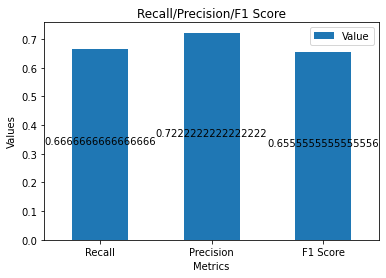

<Figure size 432x288 with 0 Axes>

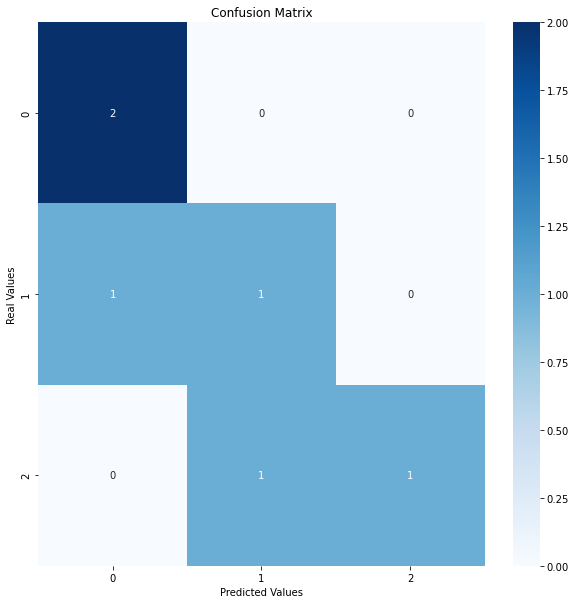

In [20]:
real = [0, 1, 2, 0, 1, 2]
pred = [0, 1, 2, 0, 0, 1]
metricas_fim = metricas(real, pred)
vis_geral(metricas_fim)

<h1> Exercicio 2 </h1>
<p> Dataset Iris </p>

In [21]:
iris = datasets.load_iris()
X_i = iris.data
y_i = iris.target

<p> Algoritmo KNN </p>

In [22]:
def knn(X,y,kn):
    neigh = KNeighborsClassifier(n_neighbors=kn)
    neigh.fit(X, y)
    return neigh

<p>2.1.1 Train-Only </p>

In [23]:
def train_test(X,y):
    result = knn(X,y,1)
    pred = result.predict(X)
    metricas_result = metricas(y,pred)
    vis_geral(metricas_result)

Metrics  Value
0     Recall    1.0
1  Precision    1.0
2   F1 Score    1.0

<Figure size 432x288 with 0 Axes>

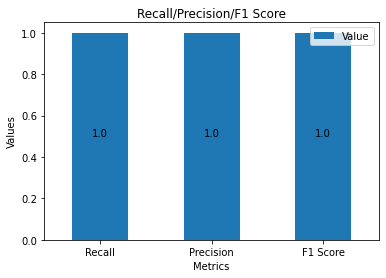

<Figure size 432x288 with 0 Axes>

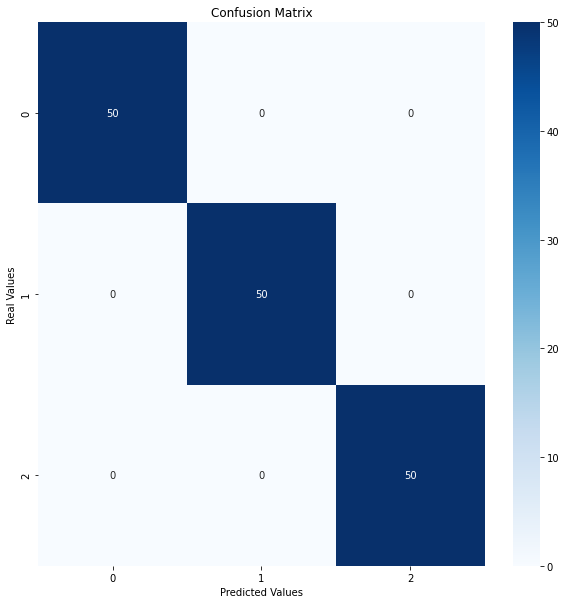

In [24]:
train_test(X_i,y_i)

<p> 2.1.1- Train Test(70/30) </p>

In [25]:
def TT_70_30(X,y):
    iris_train,iris_test = Train_Test(X,y,0.3)
    result = knn(iris_train[0],iris_train[1],1)
    pred = result.predict(iris_test[0])
    metricas_result = metricas(iris_test[1],pred)
    vis_geral(metricas_result)
    
    result = knn(iris_train[0],iris_train[1],1)
    pred = result.predict(iris_train[0])
    metricas_result = metricas(iris_train[1],pred)
    vis_geral(metricas_result)

Metrics     Value
0     Recall  0.977778
1  Precision  0.979487
2   F1 Score  0.977839

Metrics  Value
0     Recall    1.0
1  Precision    1.0
2   F1 Score    1.0

<Figure size 432x288 with 0 Axes>

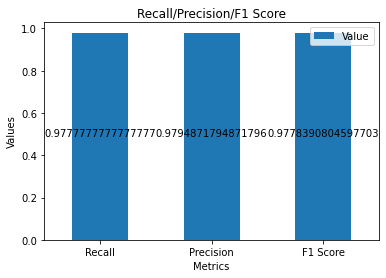

<Figure size 432x288 with 0 Axes>

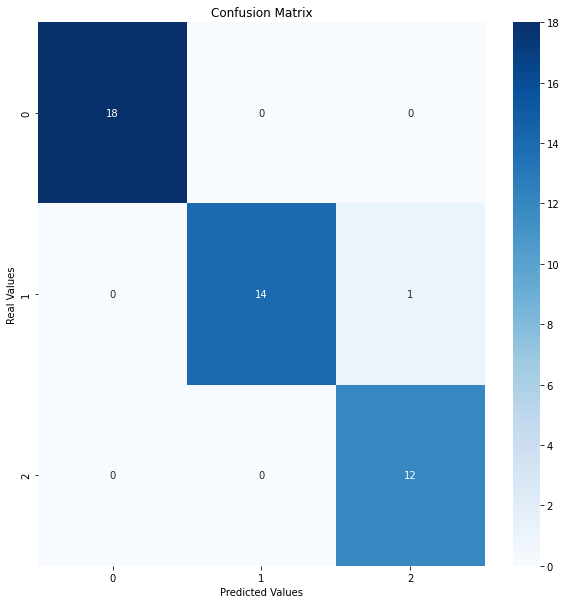

<Figure size 432x288 with 0 Axes>

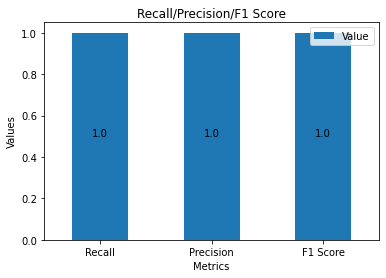

<Figure size 432x288 with 0 Axes>

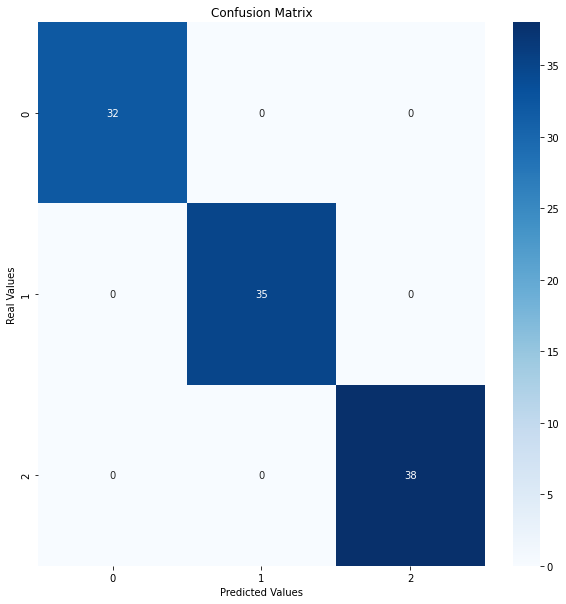

In [26]:
TT_70_30(X_i,y_i)

<p> 2.1.1 - 10 Fold Cross Validation </p>

In [27]:
def CV_10(X,y):
    train = []
    test = []
    train_folds,test_folds = K_Fold(X, y, 10)
    train.append(train_folds)
    test.append(test_folds)
    metricas_geral = {}
    metricas_fold = []
    metricas_recall =[]
    metricas_pre = []
    metricas_f1 = []
    
    metricas_geral_train = {}
    metricas_fold_train = []
    metricas_recall_train =[]
    metricas_pre_train = []
    metricas_f1_train = []
    
    for i in range(len(train)):
        all_train = train[i]
        all_test = test[i]
        for j in range(len(all_test)):
            fold = "[Fold" + str(j) + "]"
            train = all_train[j]
            test = all_test[j]
            model = knn(train[0],train[1],1)
            pred = model.predict(test[0])
            metricas_result = metricas(test[1], pred)
            metricas_fold.append(fold)
            metricas_recall.append(metricas_result["Recall"])
            metricas_pre.append(metricas_result["Precision"])
            metricas_f1.append(metricas_result["F1 Score"])
            vis_cf(metricas_result["Confusion Matrix"],fold)
            
            model_train = knn(train[0],train[1],1)
            pred_train = model_train.predict(train[0])
            metricas_result_train = metricas(train[1], pred_train)
            metricas_fold_train.append(fold)
            metricas_recall_train.append(metricas_result_train["Recall"])
            metricas_pre_train.append(metricas_result_train["Precision"])
            metricas_f1_train.append(metricas_result_train["F1 Score"])
            vis_cf(metricas_result_train["Confusion Matrix"],fold)
            
            
    metricas_geral["Folds"]=metricas_fold
    metricas_geral["Recall"]=metricas_recall
    metricas_geral["Precision"]=metricas_pre
    metricas_geral["F1 Score"]=metricas_f1
    metricas_end = pd.DataFrame(metricas_geral)
    display(metricas_end)
    
    metricas_geral_train["Folds"]=metricas_fold
    metricas_geral_train["Recall"]=metricas_recall_train
    metricas_geral_train["Precision"]=metricas_pre_train
    metricas_geral_train["F1 Score"]=metricas_f1_train
    metricas_end_train = pd.DataFrame(metricas_geral_train)
    display(metricas_end_train)

Folds    Recall  Precision  F1 Score
0  [Fold0]  0.933333   0.966667  0.942222
1  [Fold1]  0.933333   0.944444  0.929697
2  [Fold2]  0.866667   0.896296  0.858333
3  [Fold3]  0.933333   0.944444  0.933800
4  [Fold4]  0.933333   0.950000  0.935065
5  [Fold5]  0.933333   0.946667  0.933333
6  [Fold6]  1.000000   1.000000  1.000000
7  [Fold7]  1.000000   1.000000  1.000000
8  [Fold8]  1.000000   1.000000  1.000000
9  [Fold9]  1.000000   1.000000  1.000000

Folds  Recall  Precision  F1 Score
0  [Fold0]     1.0        1.0       1.0
1  [Fold1]     1.0        1.0       1.0
2  [Fold2]     1.0        1.0       1.0
3  [Fold3]     1.0        1.0       1.0
4  [Fold4]     1.0        1.0       1.0
5  [Fold5]     1.0        1.0       1.0
6  [Fold6]     1.0        1.0       1.0
7  [Fold7]     1.0        1.0       1.0
8  [Fold8]     1.0        1.0       1.0
9  [Fold9]     1.0        1.0       1.0

<Figure size 432x288 with 0 Axes>

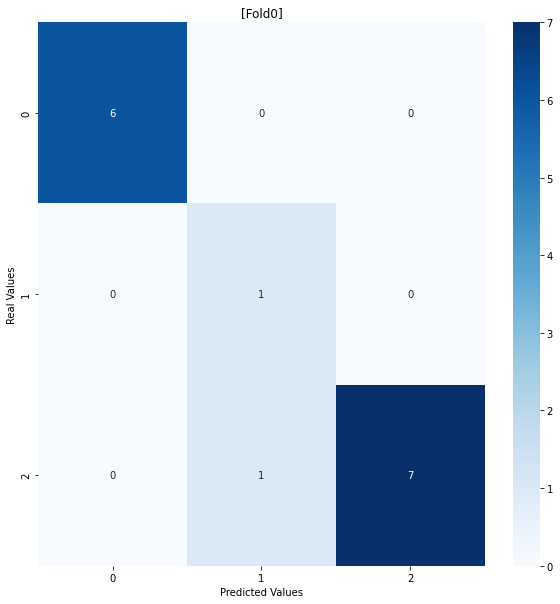

<Figure size 432x288 with 0 Axes>

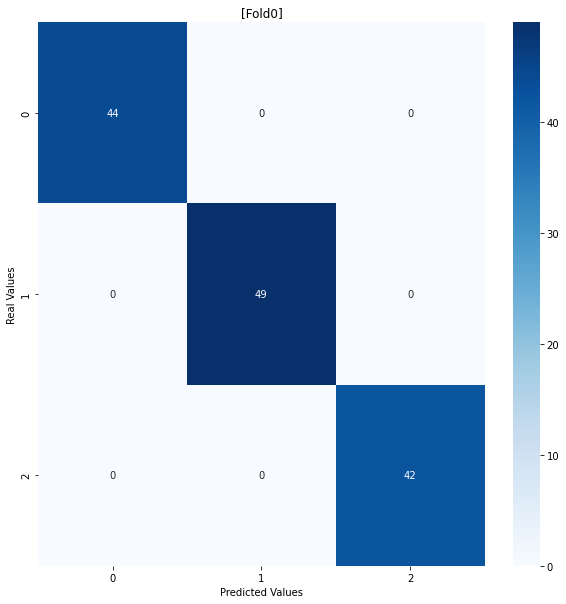

<Figure size 432x288 with 0 Axes>

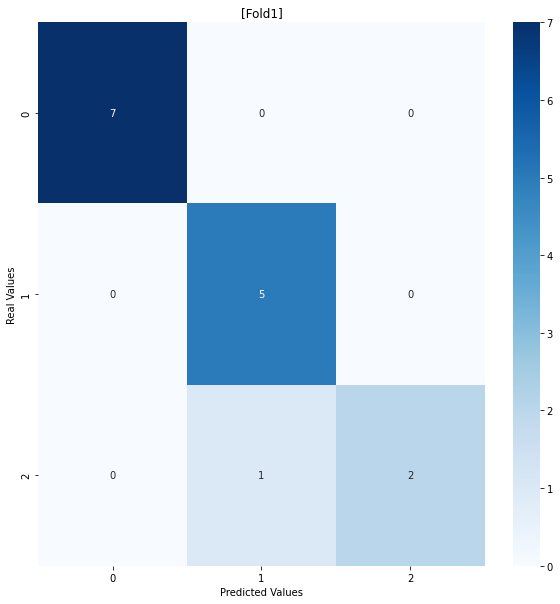

<Figure size 432x288 with 0 Axes>

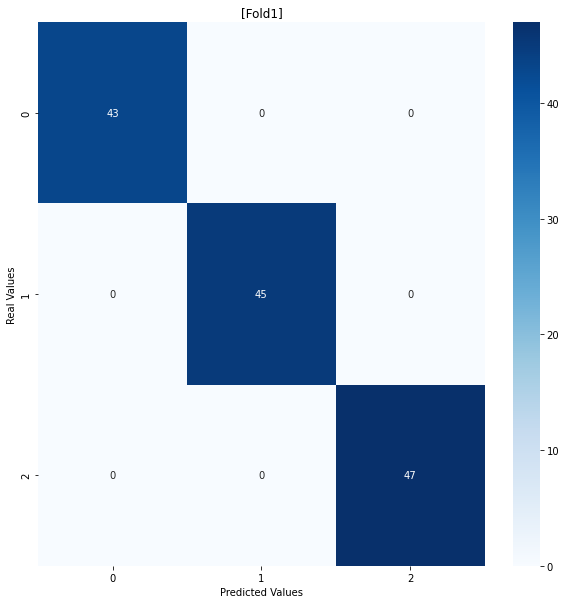

<Figure size 432x288 with 0 Axes>

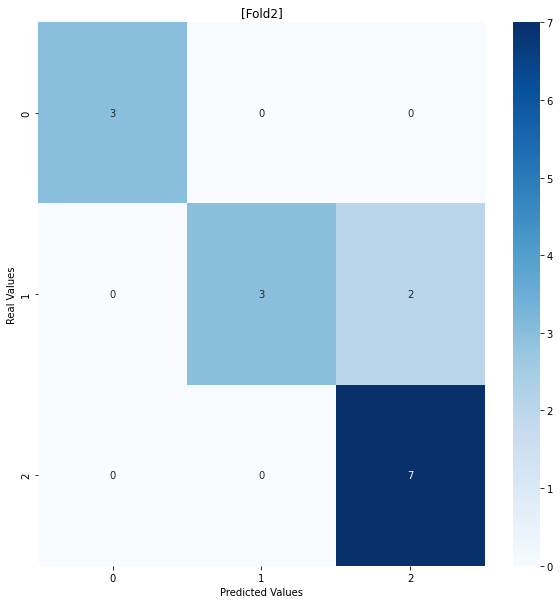

<Figure size 432x288 with 0 Axes>

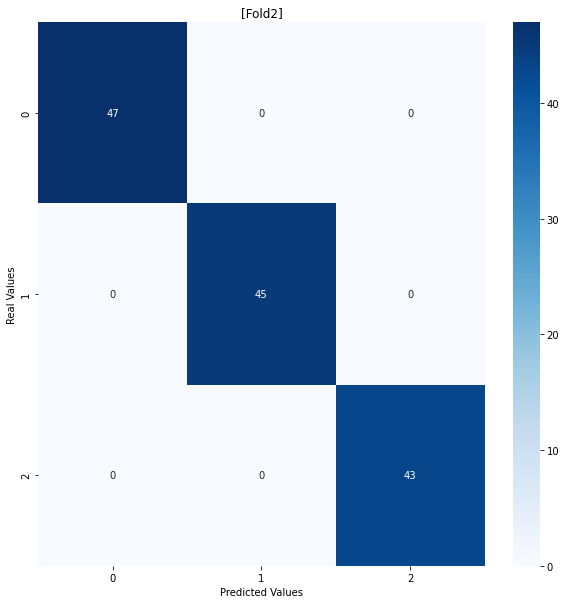

<Figure size 432x288 with 0 Axes>

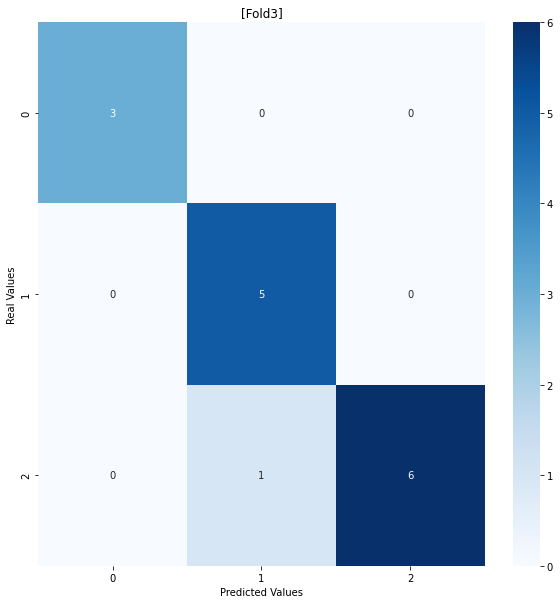

<Figure size 432x288 with 0 Axes>

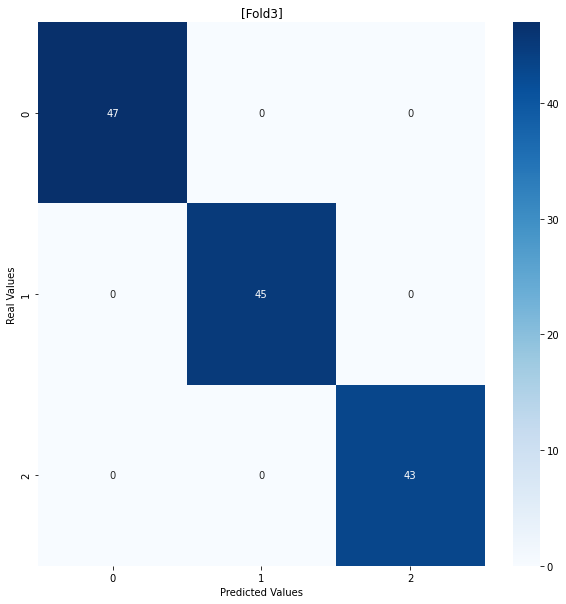

<Figure size 432x288 with 0 Axes>

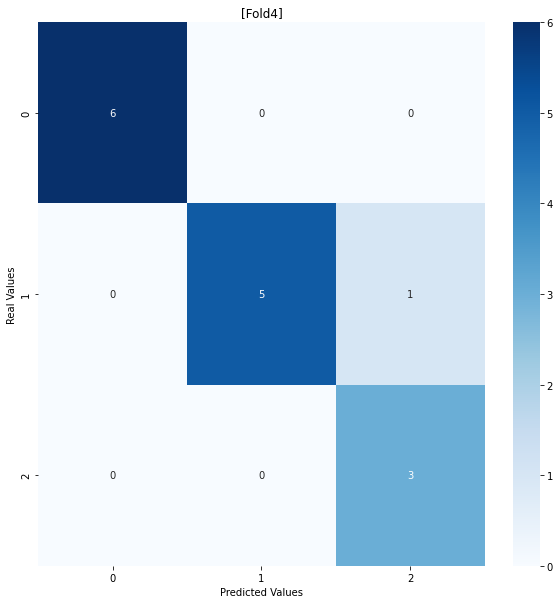

<Figure size 432x288 with 0 Axes>

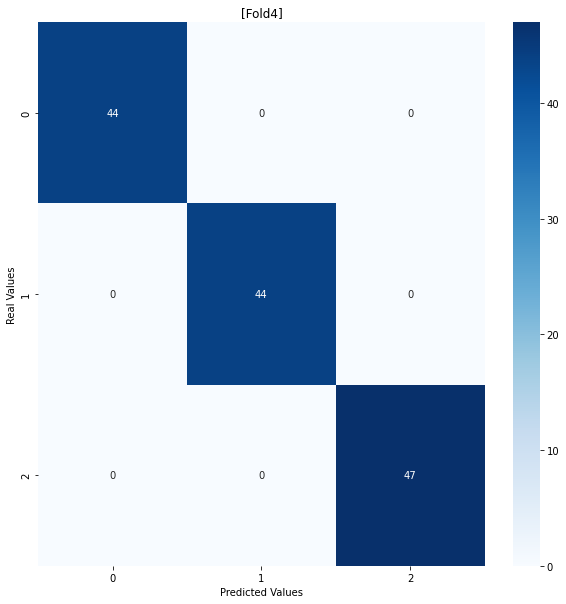

<Figure size 432x288 with 0 Axes>

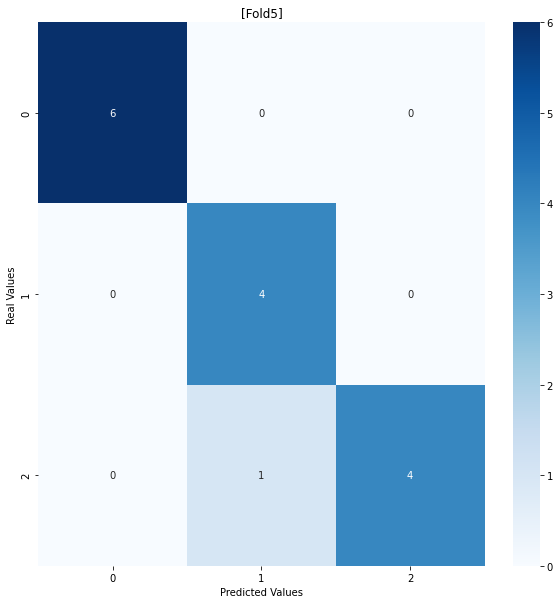

<Figure size 432x288 with 0 Axes>

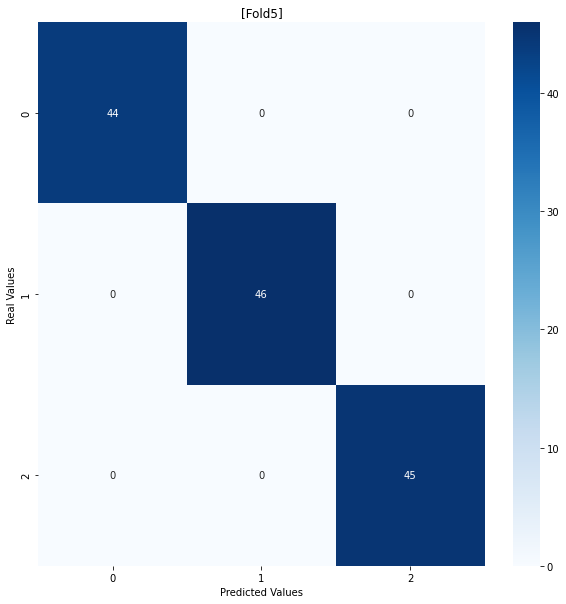

<Figure size 432x288 with 0 Axes>

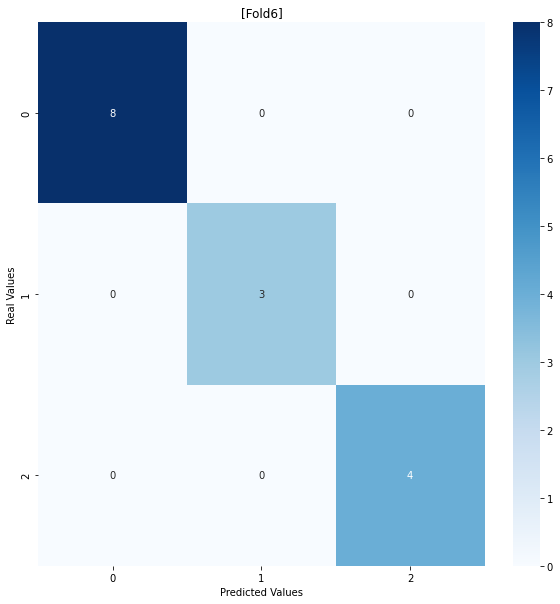

<Figure size 432x288 with 0 Axes>

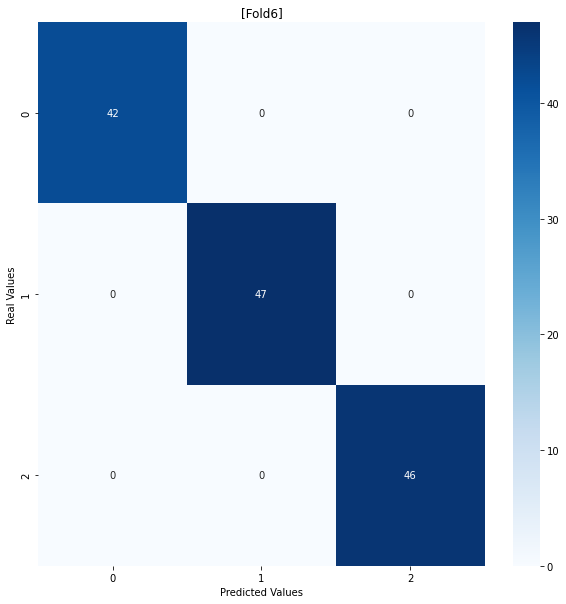

<Figure size 432x288 with 0 Axes>

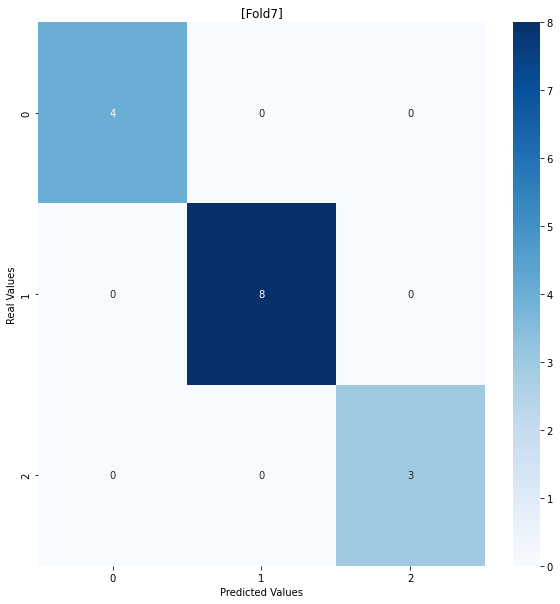

<Figure size 432x288 with 0 Axes>

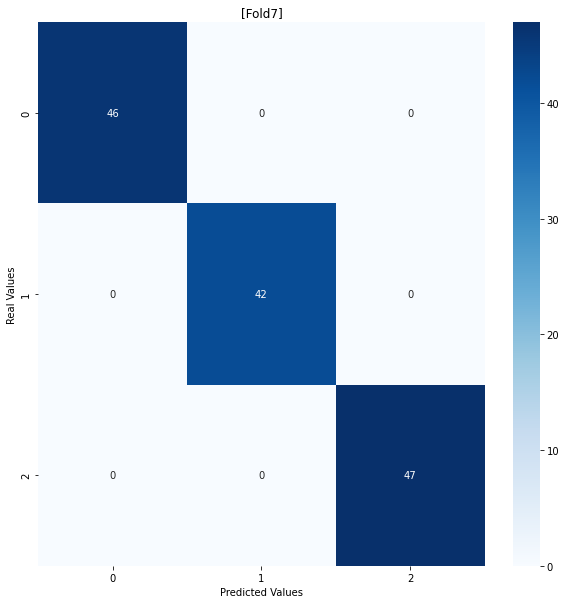

<Figure size 432x288 with 0 Axes>

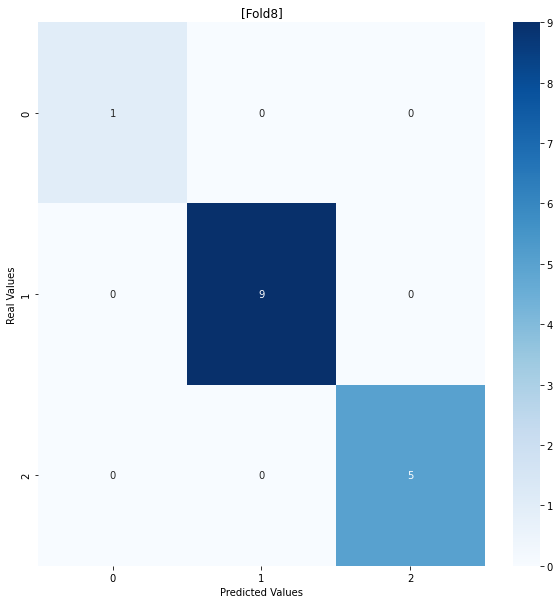

<Figure size 432x288 with 0 Axes>

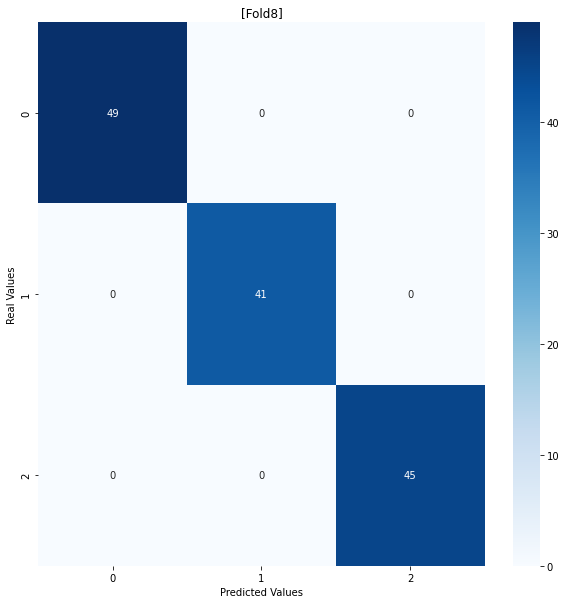

<Figure size 432x288 with 0 Axes>

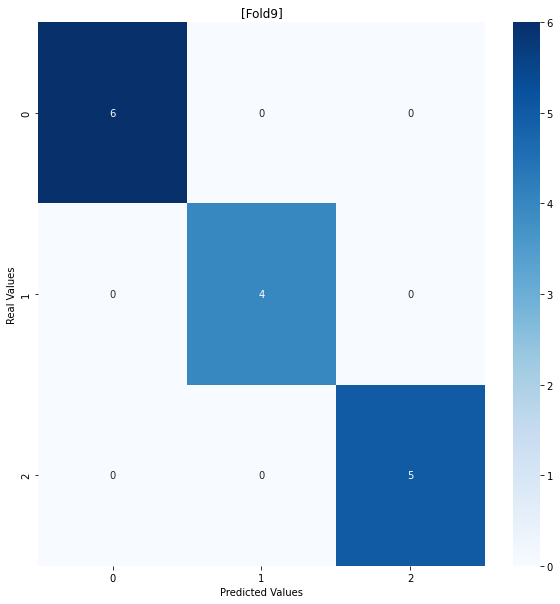

<Figure size 432x288 with 0 Axes>

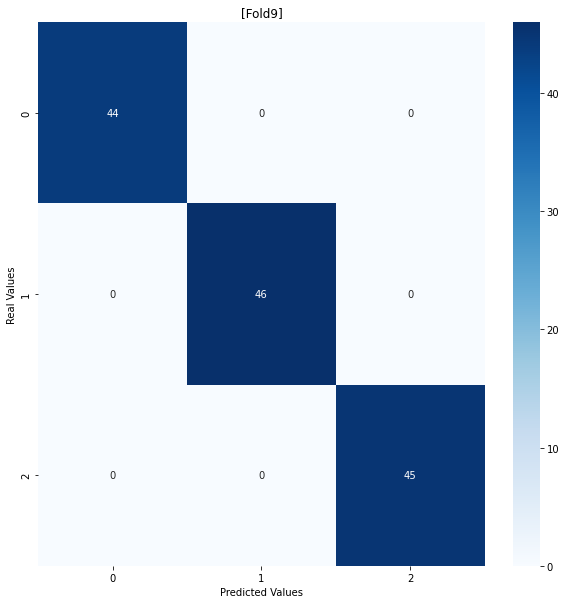

In [28]:
CV_10(X_i,y_i)

<p> Exercicio 2.1.2 - TT - K variavel </p> 

K value    Recall  Precision  F1 Score
0   [K = 1]  1.000000   1.000000  1.000000
1   [K = 3]  0.960000   0.960000  0.960000
2   [K = 5]  0.966667   0.966787  0.966663
3   [K = 7]  0.973333   0.973825  0.973323
4   [K = 9]  0.980000   0.980125  0.979998
5  [K = 11]  0.973333   0.973333  0.973333
6  [K = 13]  0.980000   0.980125  0.979998
7  [K = 15]  0.986667   0.986667  0.986667

<Figure size 432x288 with 0 Axes>

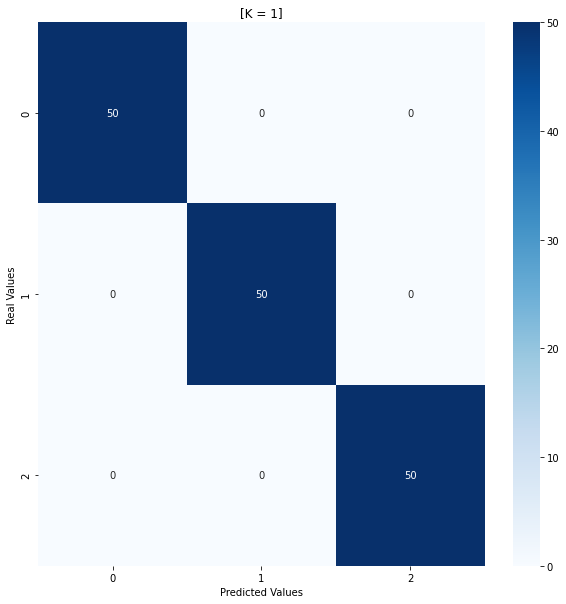

<Figure size 432x288 with 0 Axes>

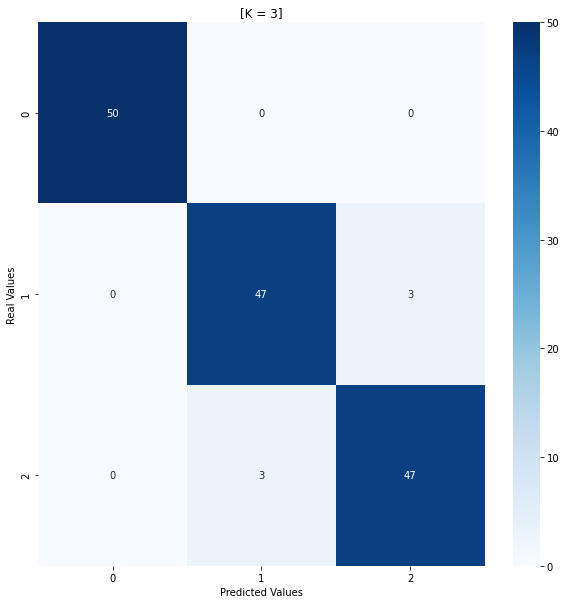

<Figure size 432x288 with 0 Axes>

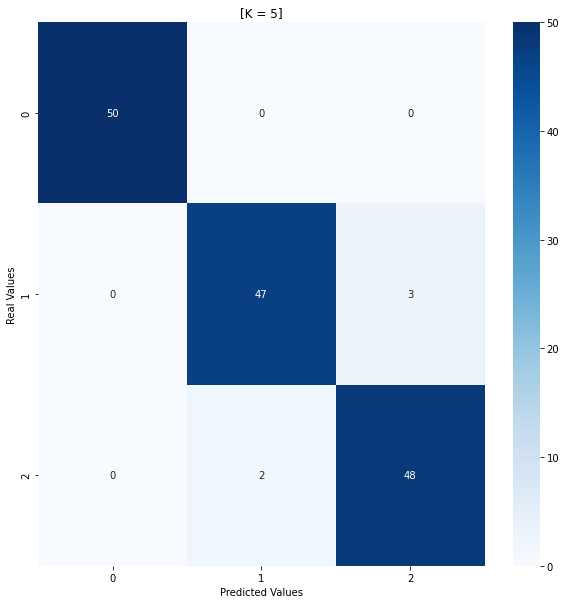

<Figure size 432x288 with 0 Axes>

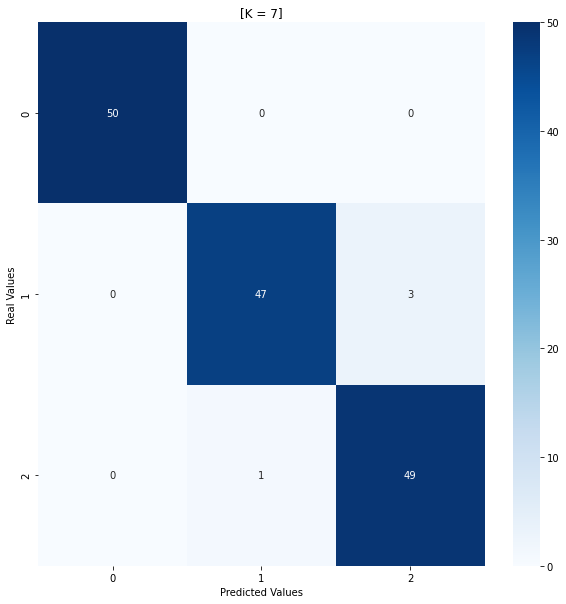

<Figure size 432x288 with 0 Axes>

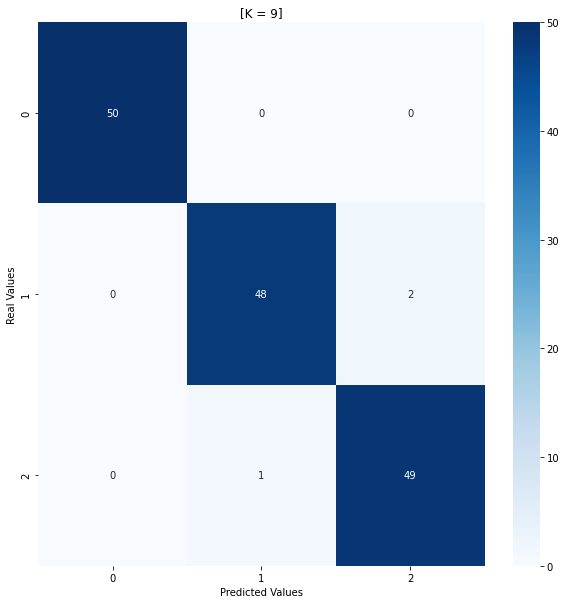

<Figure size 432x288 with 0 Axes>

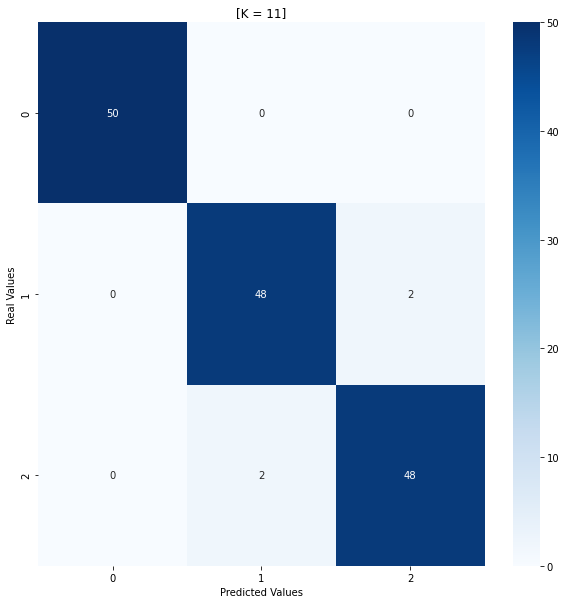

<Figure size 432x288 with 0 Axes>

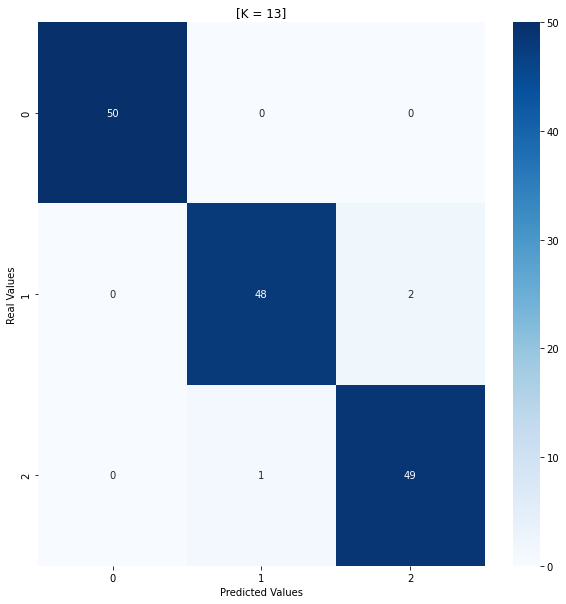

<Figure size 432x288 with 0 Axes>

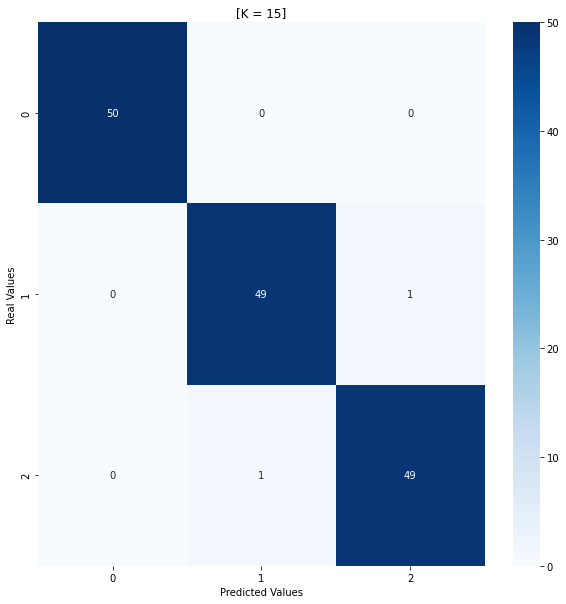

In [29]:
def train_test_2(X,y):
    metricas_geral_2 = {}
    metricas_k = []
    metricas_recall_2 =[]
    metricas_pre_2 = []
    metricas_f1_2 = []
    for k in range(1,16,2):
        kvalue = "[K = " + str(k) + "]"
        result = knn(X,y,k)
        pred = result.predict(X)
        metricas_result_2 = metricas(y,pred)
        metricas_k.append(kvalue)
        metricas_recall_2.append(metricas_result_2["Recall"])
        metricas_pre_2.append(metricas_result_2["Precision"])
        metricas_f1_2.append(metricas_result_2["F1 Score"])
        vis_cf(metricas_result_2["Confusion Matrix"],kvalue)
    metricas_geral_2["K value"]=metricas_k
    metricas_geral_2["Recall"]=metricas_recall_2
    metricas_geral_2["Precision"]=metricas_pre_2
    metricas_geral_2["F1 Score"]=metricas_f1_2
    metricas_end_2 = pd.DataFrame(metricas_geral_2)
    display(metricas_end_2)
        
train_test_2(X_i,y_i)

<p> Exercicio 2.1.2 - TVT 40-30-30 - K variavel </p>

K value    Recall  Precision  F1 Score
0   [K = 1]  0.977778   0.978947  0.977595
1   [K = 3]  1.000000   1.000000  1.000000
2   [K = 5]  1.000000   1.000000  1.000000
3   [K = 7]  1.000000   1.000000  1.000000
4   [K = 9]  0.977778   0.978947  0.977595
5  [K = 11]  0.977778   0.978947  0.977595
6  [K = 13]  0.977778   0.979487  0.977905
7  [K = 15]  0.977778   0.978947  0.977595

Recall  Precision  F1 Score
0  0.933333   0.934259  0.933075
1  0.955556   0.960784  0.955093
2  0.955556   0.960784  0.955093
3  0.977778   0.979167  0.977692
4  0.977778   0.979167  0.977692
5  1.000000   1.000000  1.000000
6  1.000000   1.000000  1.000000
7  0.977778   0.979365  0.977806

<Figure size 432x288 with 0 Axes>

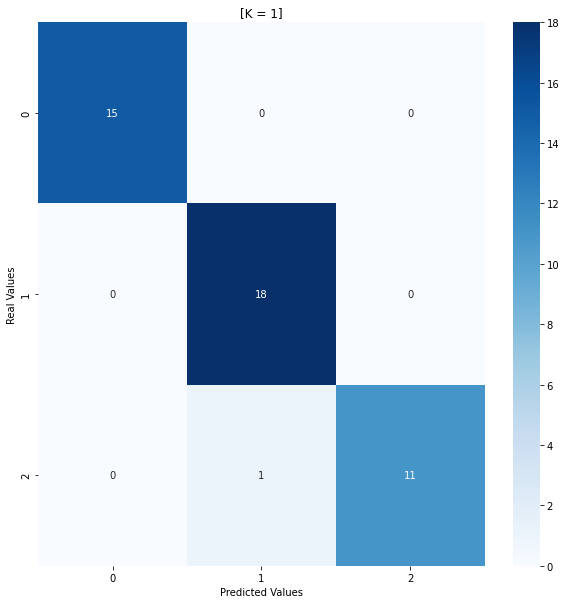

<Figure size 432x288 with 0 Axes>

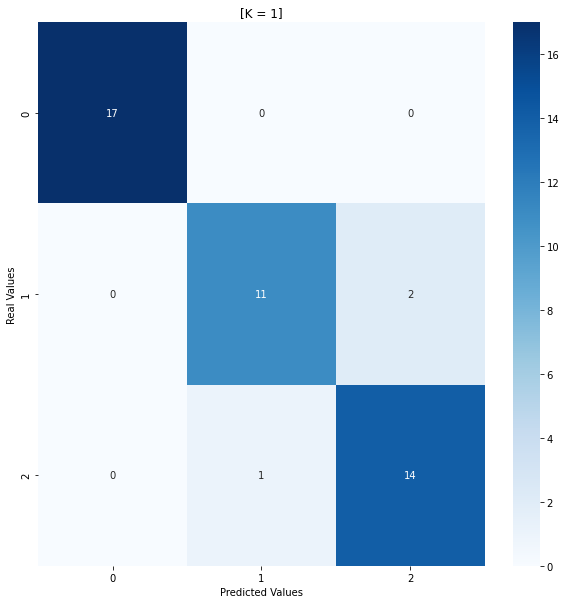

<Figure size 432x288 with 0 Axes>

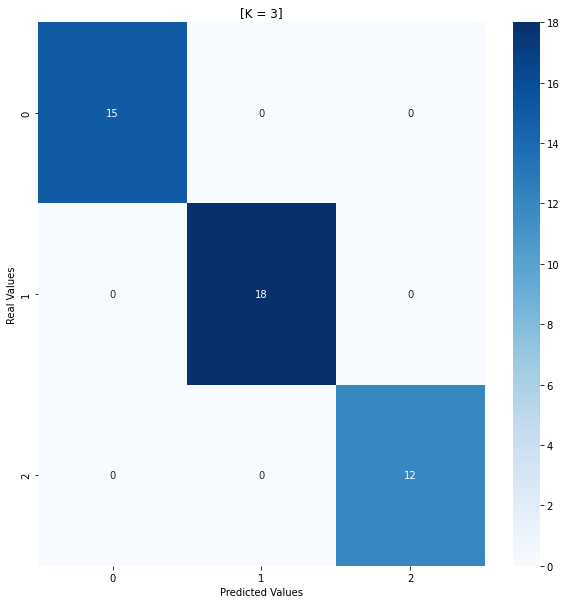

<Figure size 432x288 with 0 Axes>

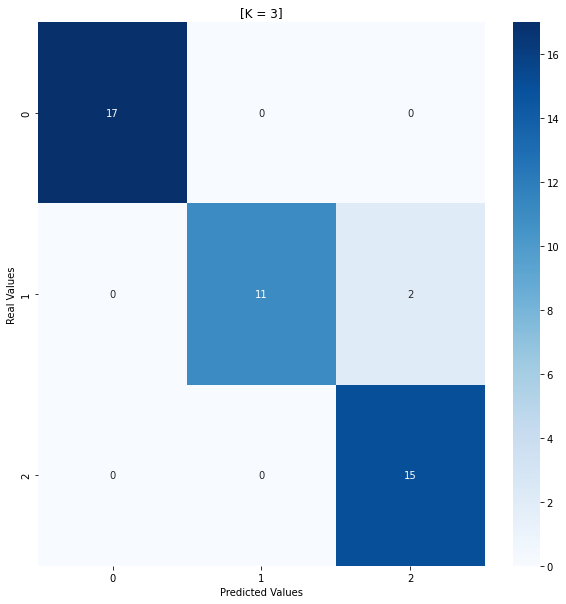

<Figure size 432x288 with 0 Axes>

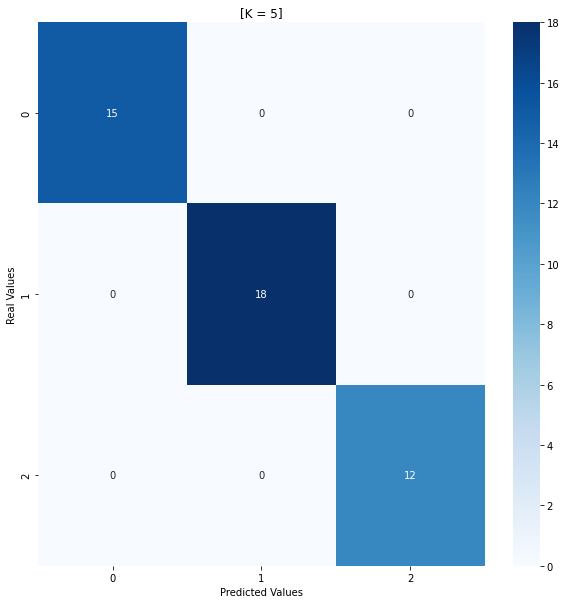

<Figure size 432x288 with 0 Axes>

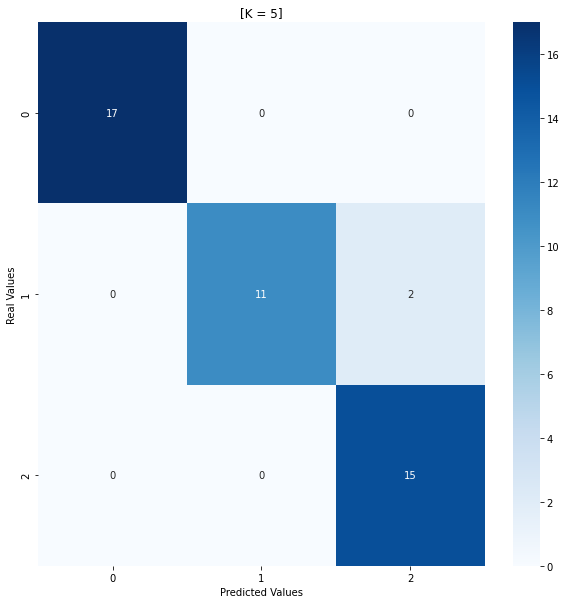

<Figure size 432x288 with 0 Axes>

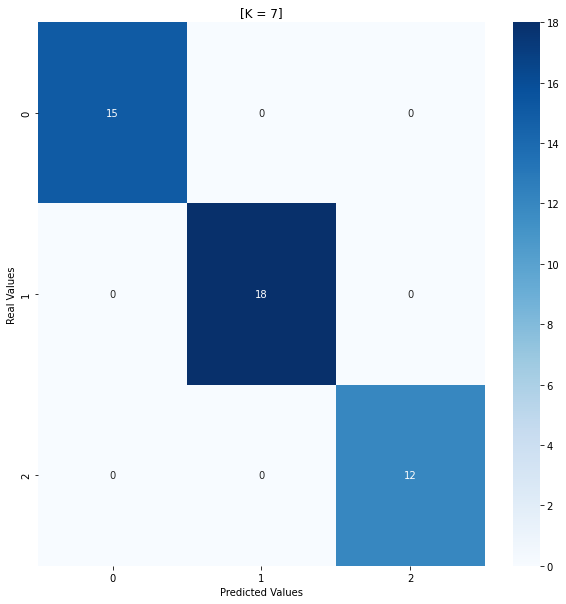

<Figure size 432x288 with 0 Axes>

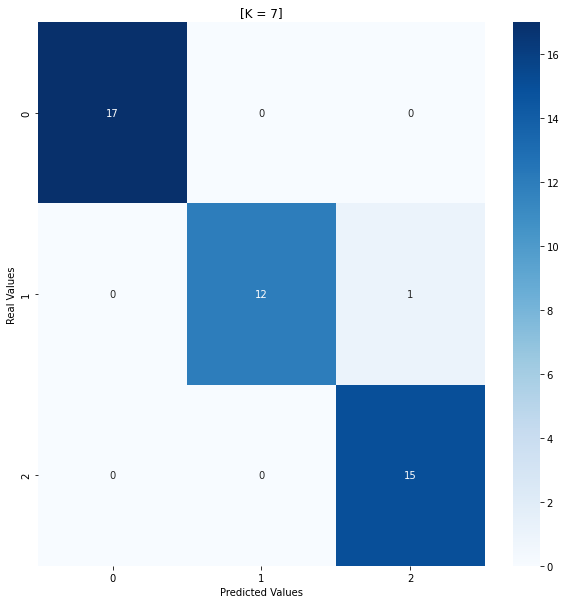

<Figure size 432x288 with 0 Axes>

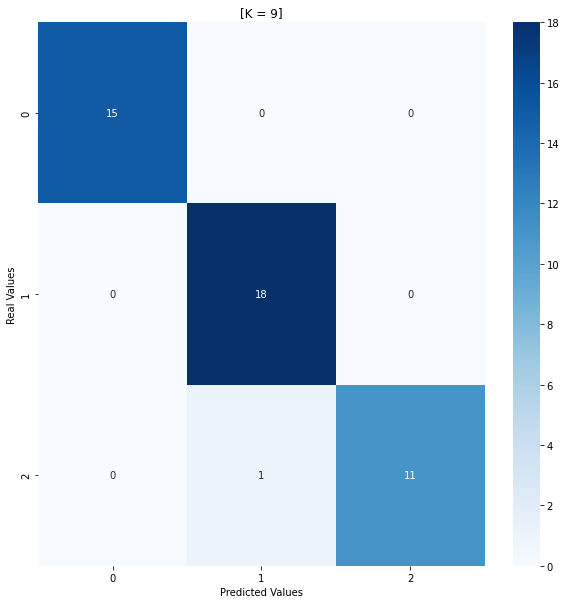

<Figure size 432x288 with 0 Axes>

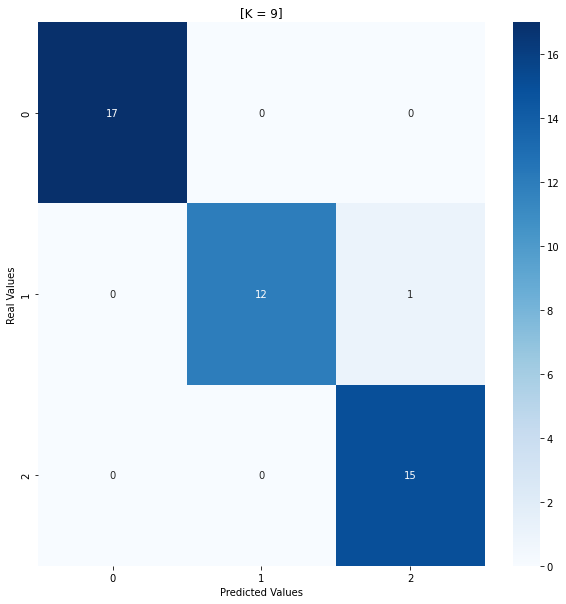

<Figure size 432x288 with 0 Axes>

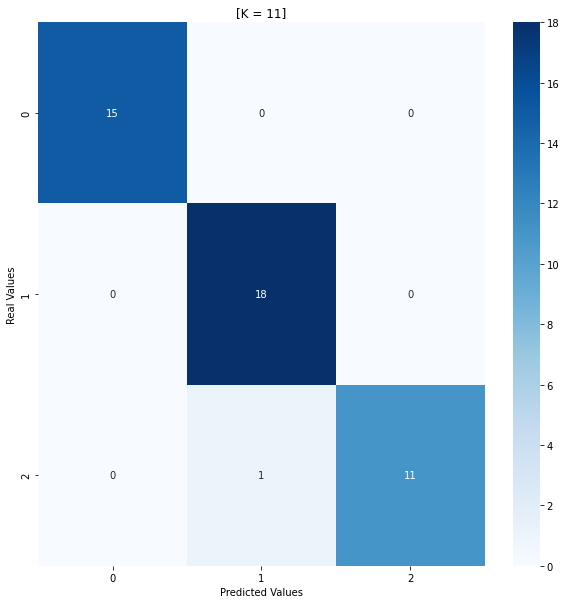

<Figure size 432x288 with 0 Axes>

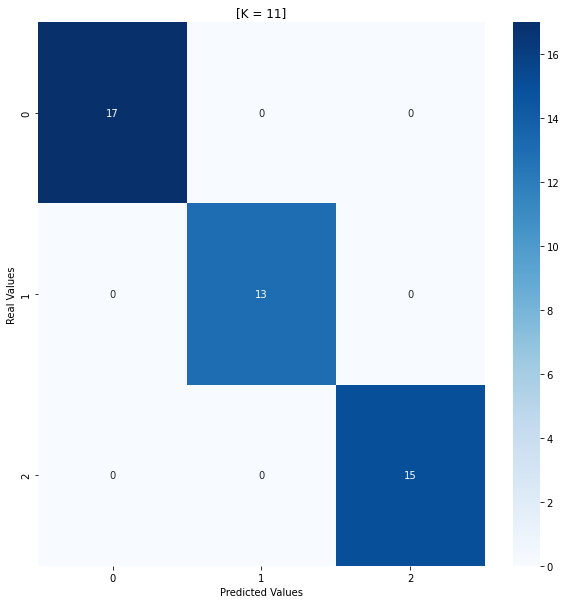

<Figure size 432x288 with 0 Axes>

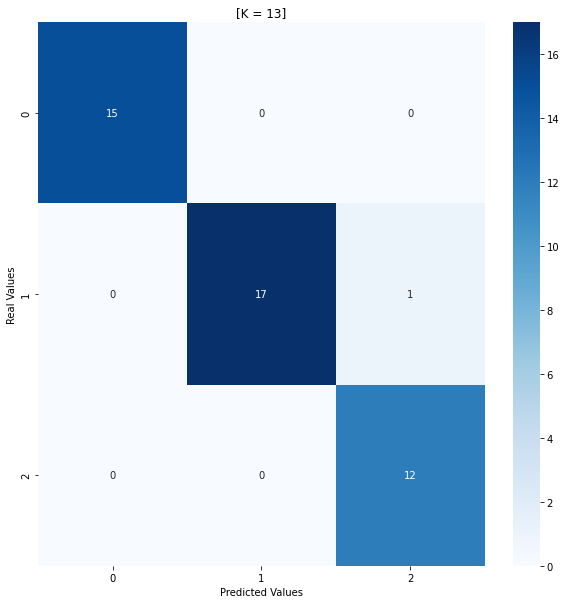

<Figure size 432x288 with 0 Axes>

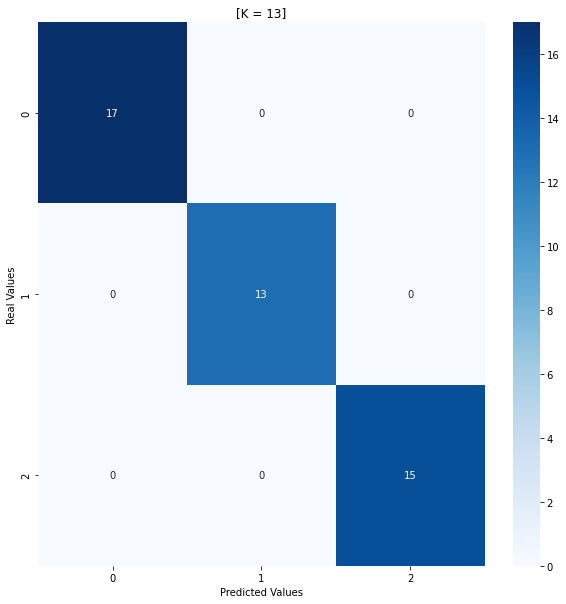

<Figure size 432x288 with 0 Axes>

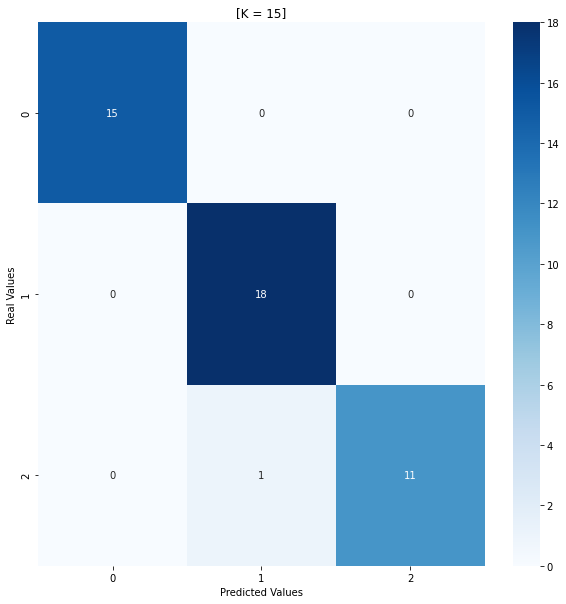

<Figure size 432x288 with 0 Axes>

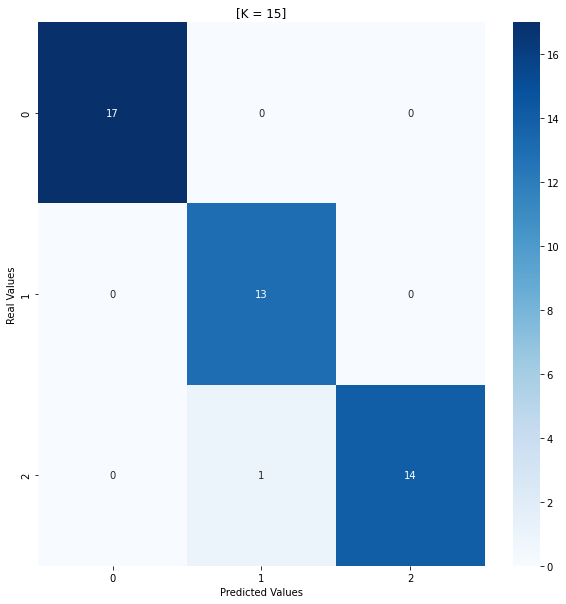

In [30]:
def TVT_40_30_30(X,y):
    train,validation,test = Train_Validation_Test(X, y, 0.3, 0.3)
    metricas_geral_3 = {}
    metricas_geral_3_test = {}
    metricas_k_3 = []
    metricas_recall_3 =[]
    metricas_pre_3 = []
    metricas_f1_3 = []
    metricas_recall_3_test =[]
    metricas_pre_3_test = []
    metricas_f1_3_test = []
    for k in range(1,16,2):
        kvalue = "[K = " + str(k) + "]"
        result = knn(train[0],train[1],k)
        pred = result.predict(validation[0])
        metricas_result_3 = metricas(validation[1],pred)
        
        result_test = knn(train[0],train[1],k)
        pred_test = result.predict(test[0])
        metricas_result_3_test = metricas(test[1],pred_test)
        
        metricas_k_3.append(kvalue)
        metricas_recall_3.append(metricas_result_3["Recall"])
        metricas_pre_3.append(metricas_result_3["Precision"])
        metricas_f1_3.append(metricas_result_3["F1 Score"])
        vis_cf(metricas_result_3["Confusion Matrix"],kvalue)
        
        metricas_recall_3_test.append(metricas_result_3_test["Recall"])
        metricas_pre_3_test.append(metricas_result_3_test["Precision"])
        metricas_f1_3_test.append(metricas_result_3_test["F1 Score"])
        vis_cf(metricas_result_3_test["Confusion Matrix"],kvalue)
        
    metricas_geral_3["K value"]=metricas_k_3
    metricas_geral_3["Recall"]=metricas_recall_3
    metricas_geral_3["Precision"]=metricas_pre_3
    metricas_geral_3["F1 Score"]=metricas_f1_3
    
    metricas_geral_3["K value"]=metricas_k_3
    metricas_geral_3_test["Recall"]=metricas_recall_3_test
    metricas_geral_3_test["Precision"]=metricas_pre_3_test
    metricas_geral_3_test["F1 Score"]=metricas_f1_3_test
    
    metricas_end_TVT_40 = pd.DataFrame(metricas_geral_3)
    metricas_end_TVT_40_test = pd.DataFrame(metricas_geral_3_test)
    display(metricas_end_TVT_40)
    display(metricas_end_TVT_40_test)
    
TVT_40_30_30(X_i,y_i)

In [31]:
def calc_supp(X,y,X_test,y_test,fold):
    metricas_geral = {}
    metricas_k_10 = []
    metricas_recall =[]
    metricas_pre = []
    metricas_f1 = []
    metricas_precise = {}
    metricas_precise_col = []
    metricas_fold = []
    for k in range(1,16,2):
        kvalue_3 = "[K = " + str(k) + "]" + fold
        k_fim = "K = " + str(k)
        model = knn(X,y,k)
        pred = model.predict(X_test)
        metricas_result = metricas(y_test, pred)
        metricas_k_10.append(kvalue_3)
        metricas_precise_col.append(k_fim)
        metricas_fold = fold
        metricas_recall.append(metricas_result["Recall"])
        metricas_pre.append(metricas_result["Precision"])
        metricas_f1.append(metricas_result["F1 Score"])
        vis_cf(metricas_result["Confusion Matrix"],kvalue_3)
    metricas_geral["K Value"]=metricas_k_10
    metricas_geral["Recall"]=metricas_recall
    metricas_geral["Precision"]=metricas_pre
    metricas_geral["F1 Score"]=metricas_f1
    #for teste in range(len(metricas_precise_col)):
    metricas_precise["K"] = metricas_precise_col
    metricas_precise[metricas_fold] = metricas_f1
    metricas_end = pd.DataFrame(metricas_geral)
    metricas_teste = pd.DataFrame(metricas_precise)
    #display(metricas_teste)
    return metricas_teste, metricas_teste[metricas_fold],metricas_fold

[Fold0]
[Fold1]
[Fold2]
[Fold3]
[Fold4]
[Fold5]
[Fold6]
[Fold7]
[Fold8]
[Fold9]


K   [Fold0]   [Fold1]   [Fold2]  [Fold3]  [Fold4]  [Fold5]   [Fold6]  \
0   K = 1  0.933333  0.933333  0.866667      1.0      1.0      1.0  0.859524   
1   K = 3  0.933333  0.933333  0.866667      1.0      1.0      1.0  0.859524   
2   K = 5  0.933333  1.000000  0.866667      1.0      1.0      1.0  0.859524   
3   K = 7  1.000000  1.000000  0.866667      1.0      1.0      1.0  0.859524   
4   K = 9  1.000000  1.000000  0.931602      1.0      1.0      1.0  0.932194   
5  K = 11  1.000000  1.000000  0.931602      1.0      1.0      1.0  0.932194   
6  K = 13  1.000000  1.000000  0.931602      1.0      1.0      1.0  0.859524   
7  K = 15  1.000000  1.000000  0.931602      1.0      1.0      1.0  0.859524   

    [Fold7]   [Fold8]  [Fold9]  
0  1.000000  1.000000      1.0  
1  1.000000  1.000000      1.0  
2  1.000000  1.000000      1.0  
3  0.932867  1.000000      1.0  
4  0.932867  0.936296      1.0  
5  0.932867  0.936296      1.0  
6  0.932867  1.000000      1.0  
7  0.932867  1.000000      1.0

K   [Fold0]   [Fold1]   [Fold2]   [Fold3]   [Fold4]   [Fold5]  \
0   K = 1  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   K = 3  0.962963  0.962963  0.977772  0.955556  0.955556  0.955556   
2   K = 5  0.970363  0.962963  0.985174  0.970356  0.962972  0.955492   
3   K = 7  0.970363  0.970363  0.992591  0.970356  0.970378  0.962871   
4   K = 9  0.985185  0.985185  0.985185  0.977775  0.977783  0.970328   
5  K = 11  0.985185  0.977778  0.977772  0.977775  0.985185  0.970370   
6  K = 13  0.985185  0.977778  0.992591  0.970370  0.985185  0.977765   
7  K = 15  0.985185  0.977778  0.985174  0.985185  0.985185  0.977765   

    [Fold6]   [Fold7]   [Fold8]   [Fold9]  
0  1.000000  1.000000  1.000000  1.000000  
1  0.977772  0.955556  0.955556  0.955556  
2  0.985185  0.970370  0.970370  0.962939  
3  0.985185  0.977775  0.977783  0.970324  
4  0.977778  0.970370  0.985185  0.962939  
5  0.985185  0.977775  0.970370  0.977763  
6  0.977778  0.977775  0.970370  0.970370  
7  0.985185  0.985185  0.977767  0.977763

<Figure size 432x288 with 0 Axes>

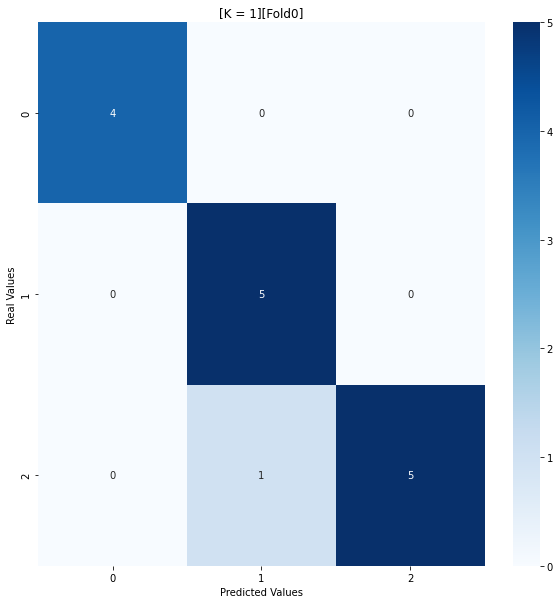

<Figure size 432x288 with 0 Axes>

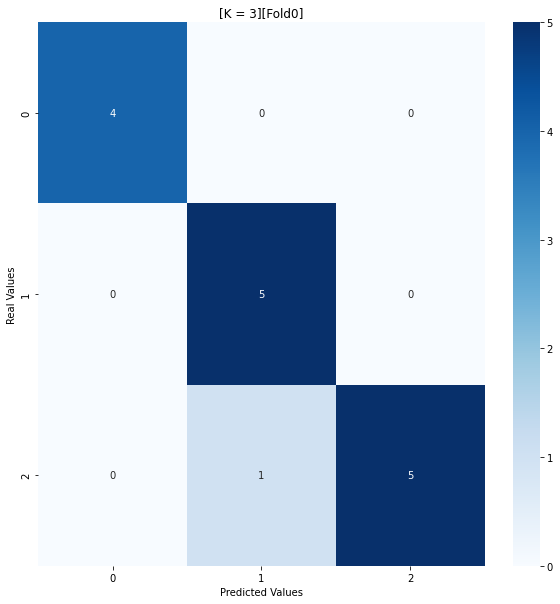

<Figure size 432x288 with 0 Axes>

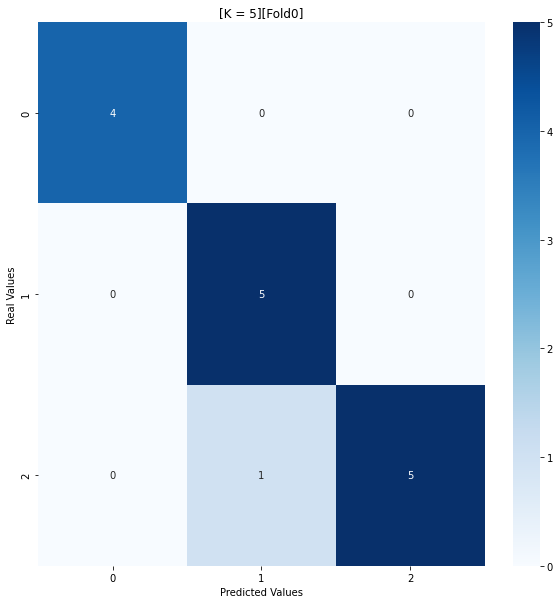

<Figure size 432x288 with 0 Axes>

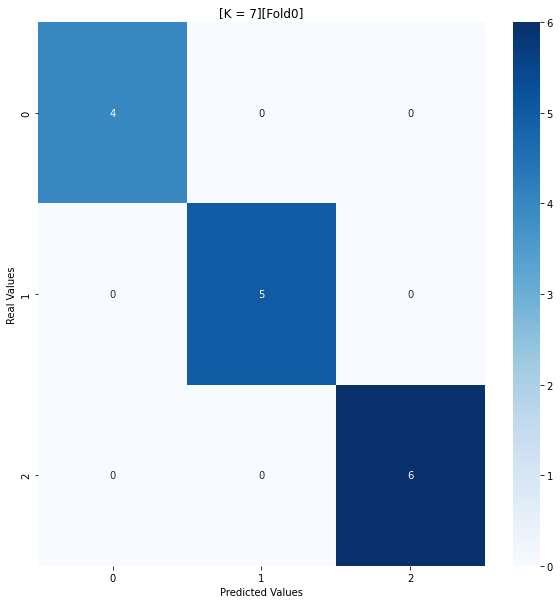

<Figure size 432x288 with 0 Axes>

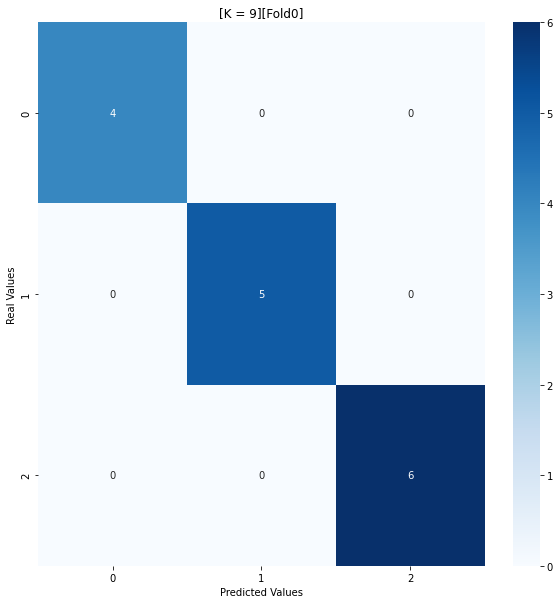

<Figure size 432x288 with 0 Axes>

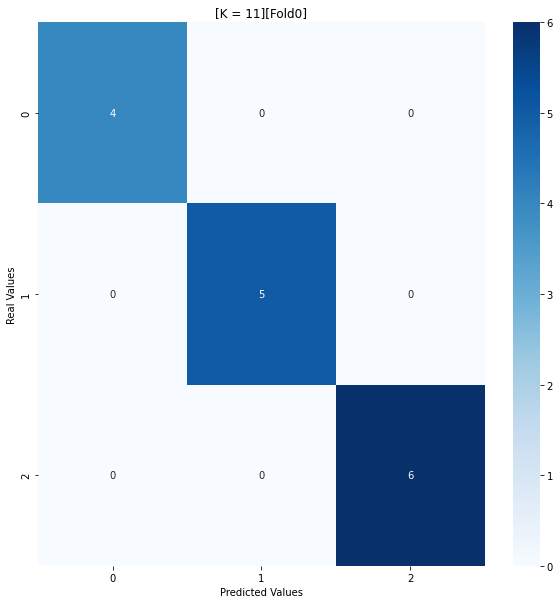

<Figure size 432x288 with 0 Axes>

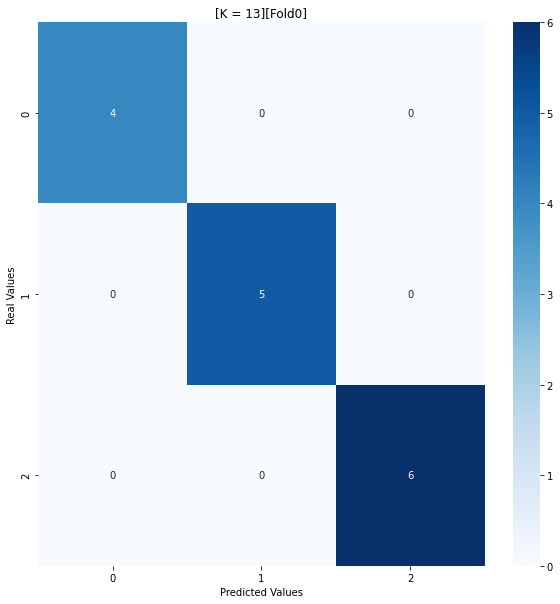

<Figure size 432x288 with 0 Axes>

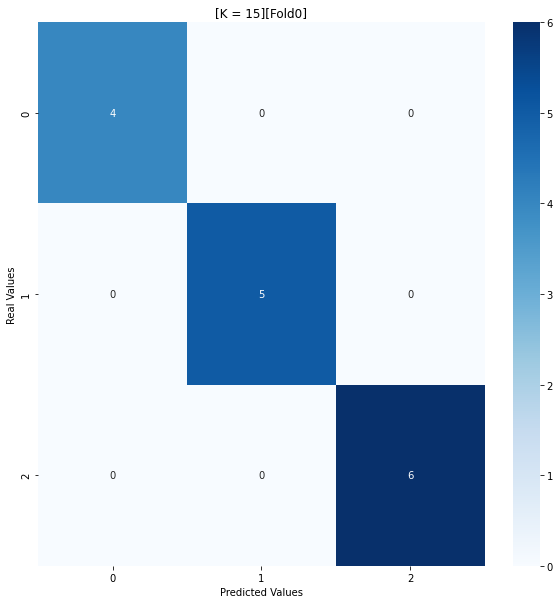

<Figure size 432x288 with 0 Axes>

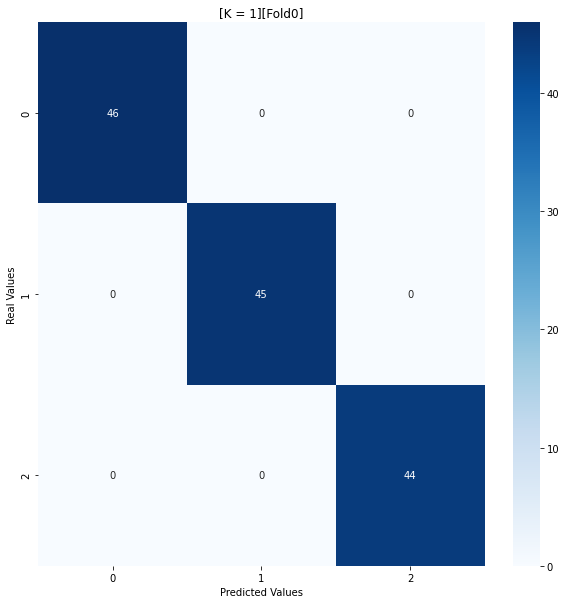

<Figure size 432x288 with 0 Axes>

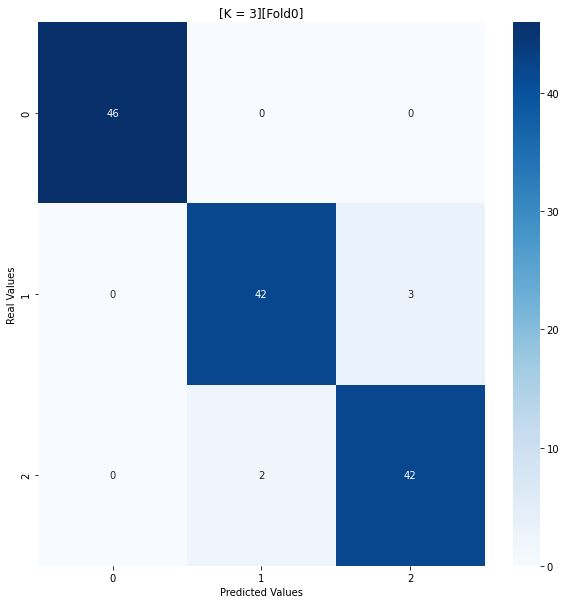

<Figure size 432x288 with 0 Axes>

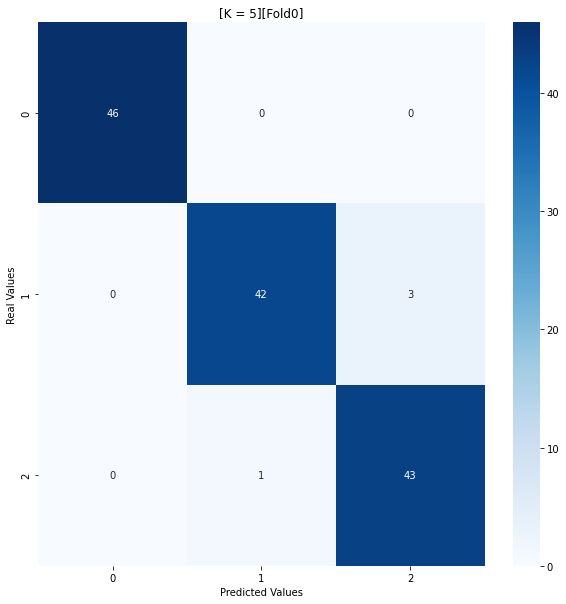

<Figure size 432x288 with 0 Axes>

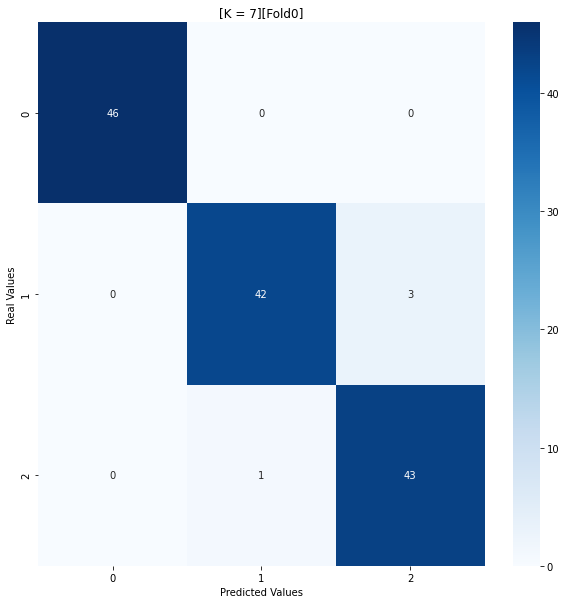

<Figure size 432x288 with 0 Axes>

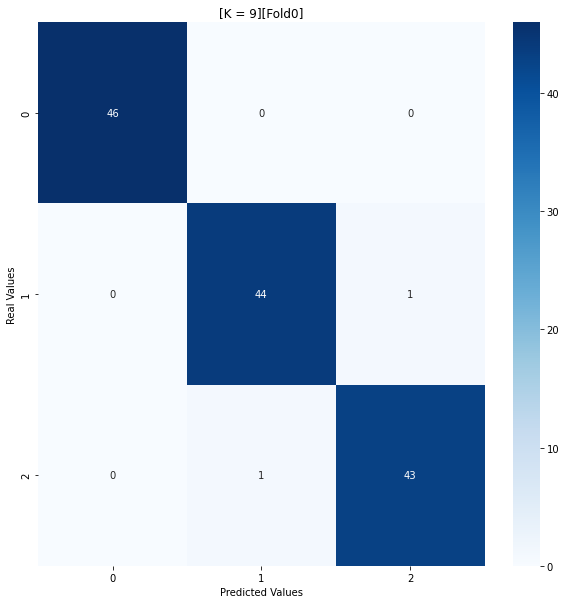

<Figure size 432x288 with 0 Axes>

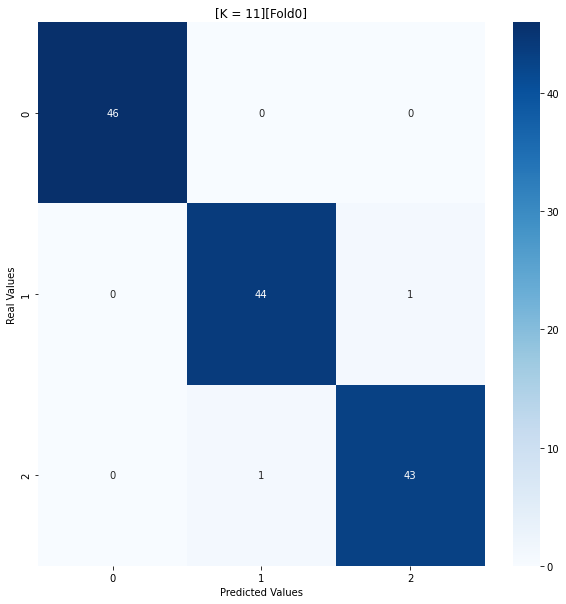

<Figure size 432x288 with 0 Axes>

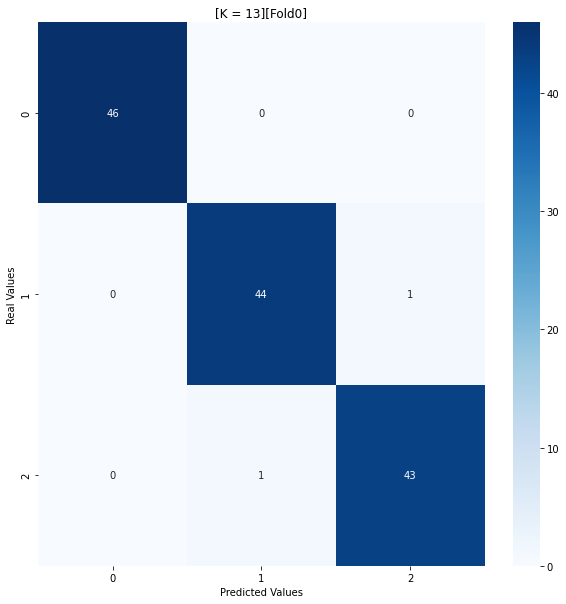

<Figure size 432x288 with 0 Axes>

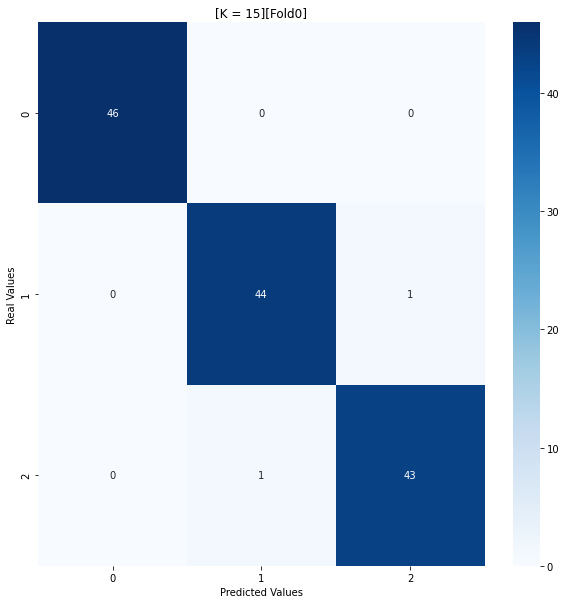

<Figure size 432x288 with 0 Axes>

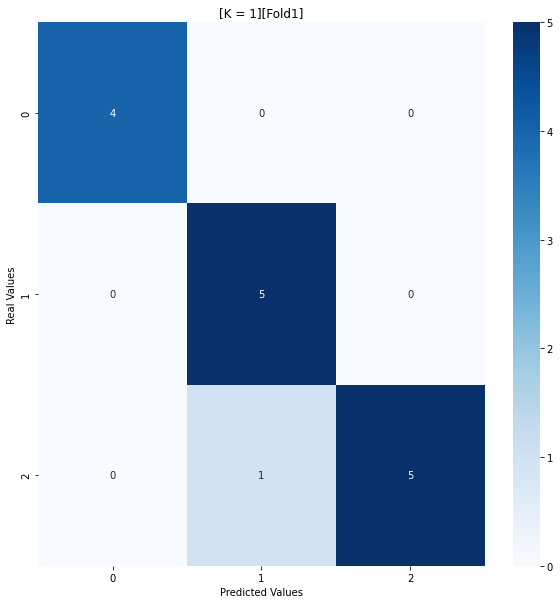

<Figure size 432x288 with 0 Axes>

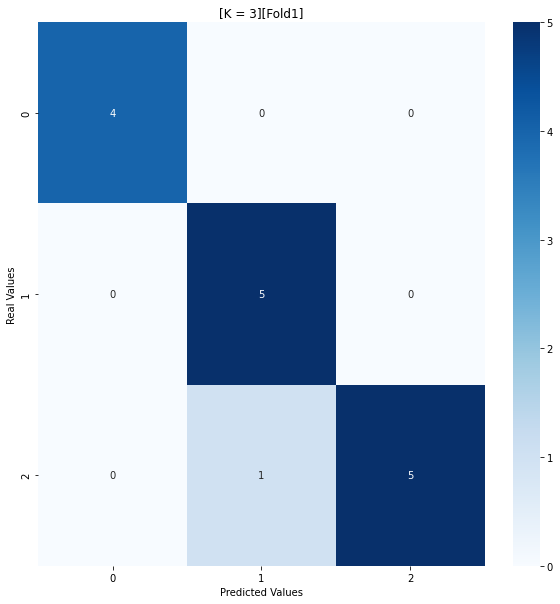

<Figure size 432x288 with 0 Axes>

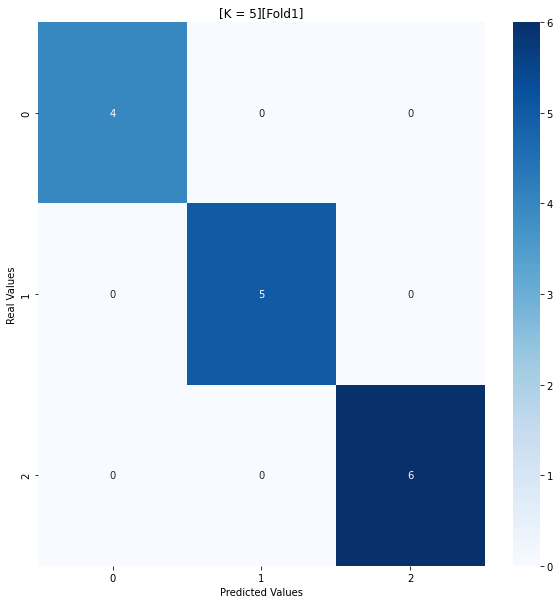

<Figure size 432x288 with 0 Axes>

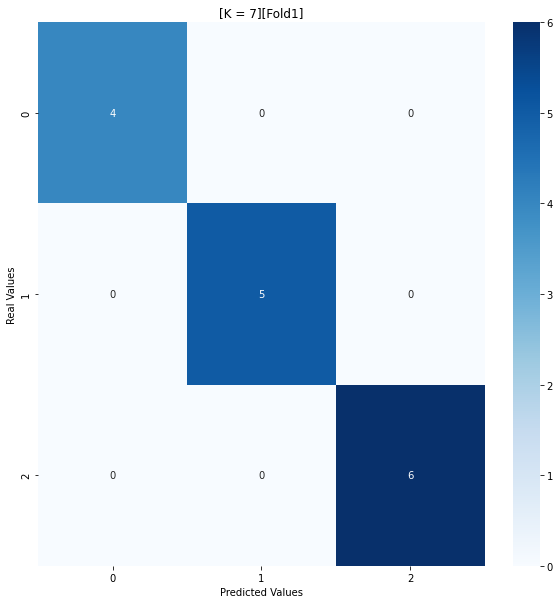

<Figure size 432x288 with 0 Axes>

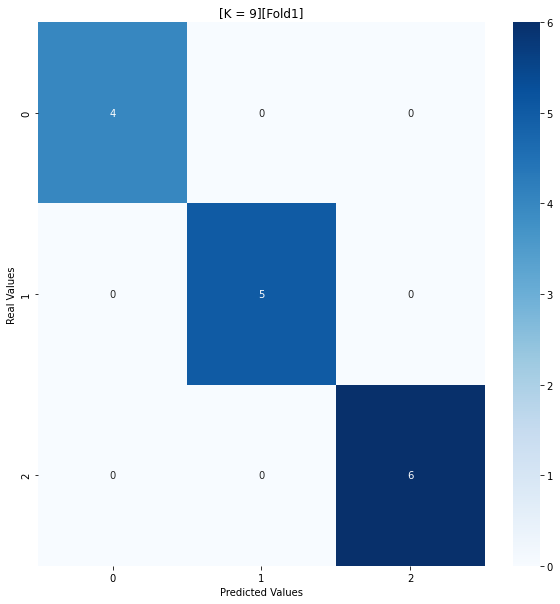

<Figure size 432x288 with 0 Axes>

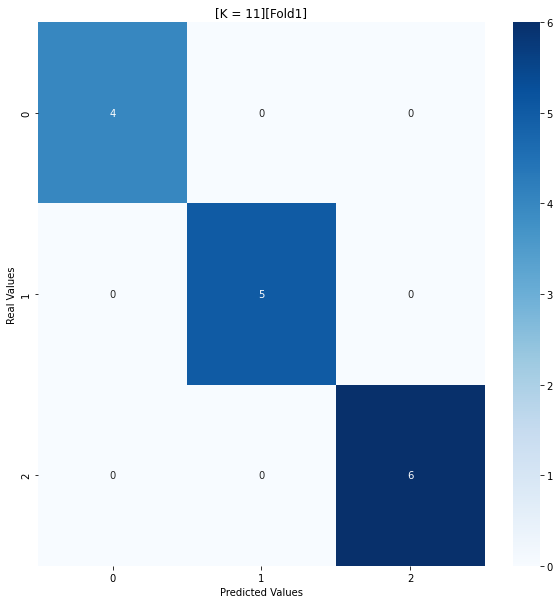

<Figure size 432x288 with 0 Axes>

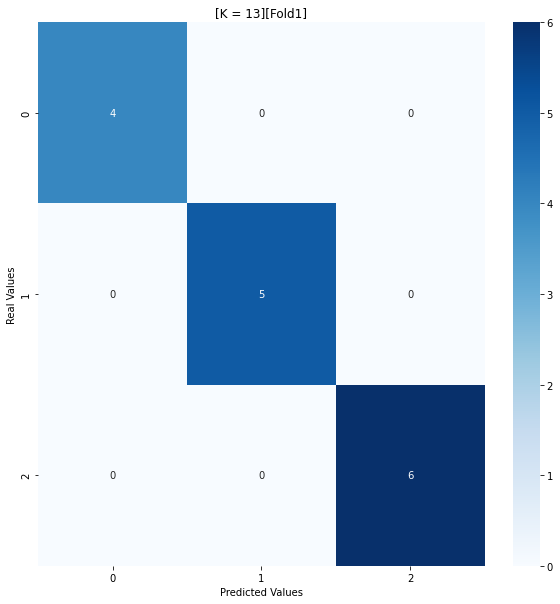

<Figure size 432x288 with 0 Axes>

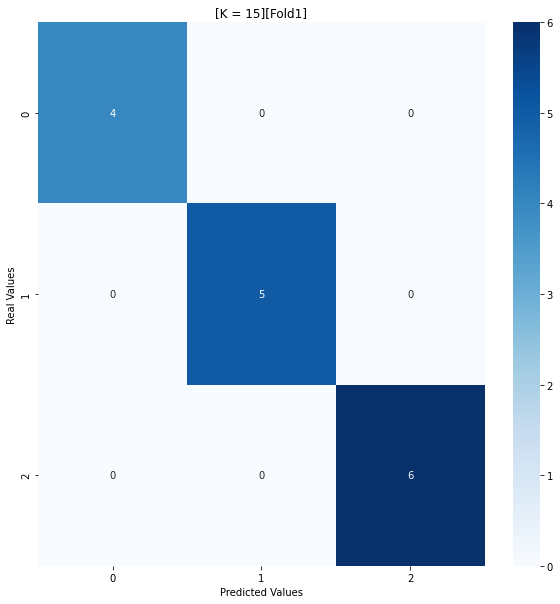

<Figure size 432x288 with 0 Axes>

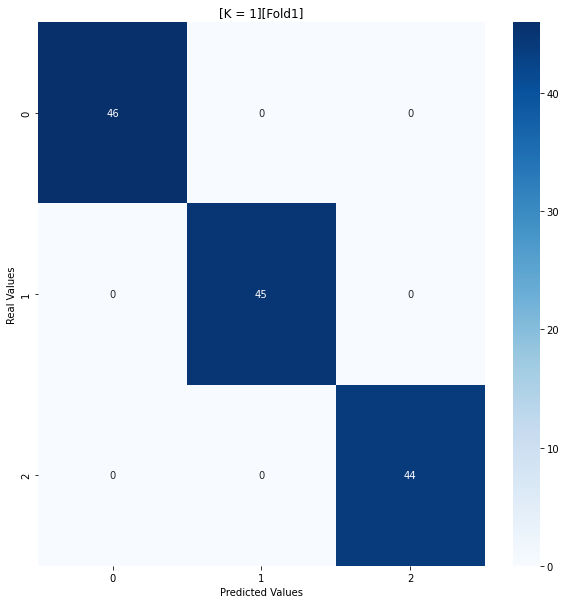

<Figure size 432x288 with 0 Axes>

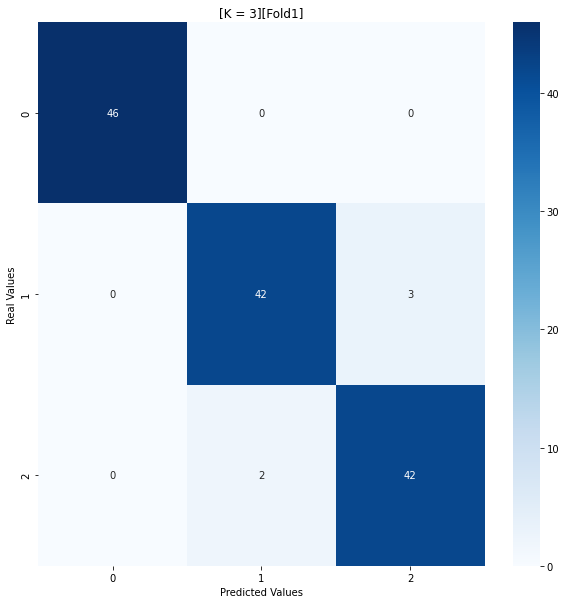

<Figure size 432x288 with 0 Axes>

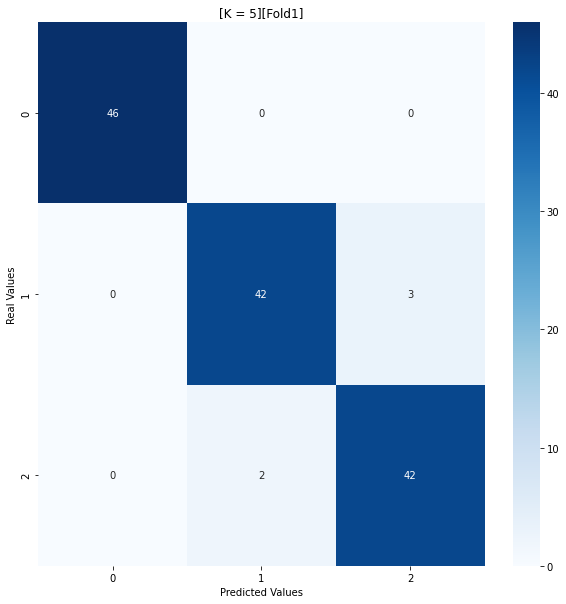

<Figure size 432x288 with 0 Axes>

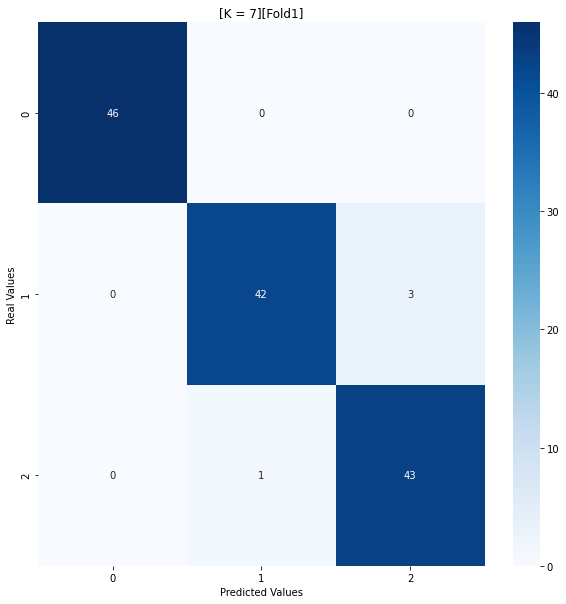

<Figure size 432x288 with 0 Axes>

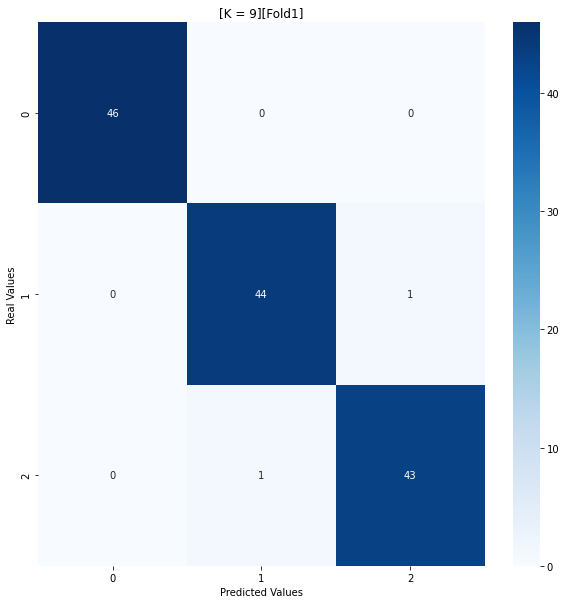

<Figure size 432x288 with 0 Axes>

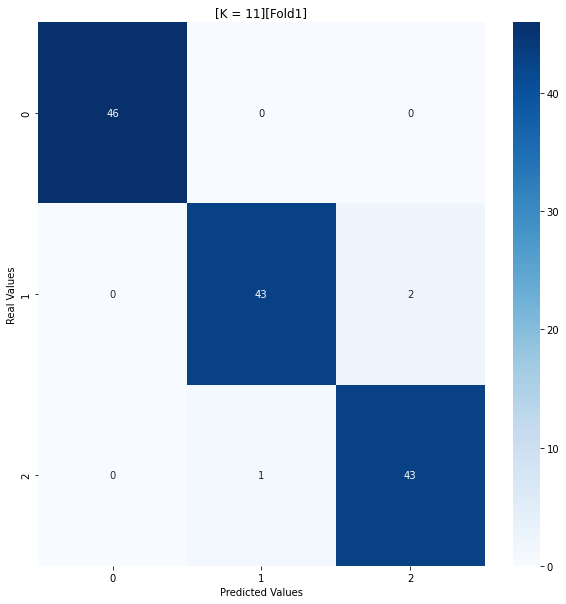

<Figure size 432x288 with 0 Axes>

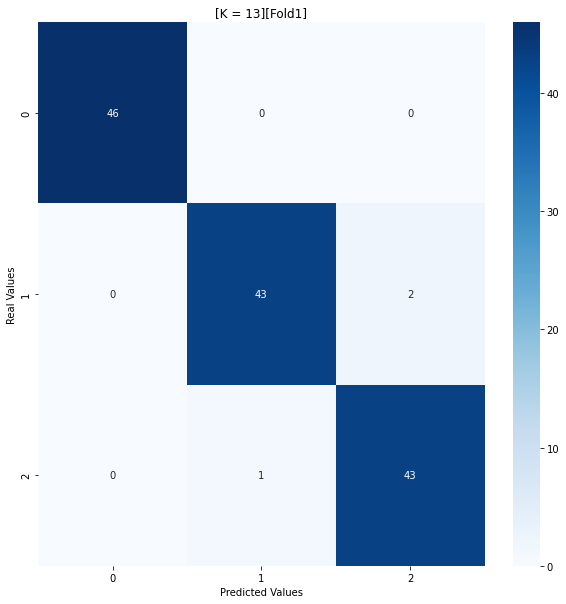

<Figure size 432x288 with 0 Axes>

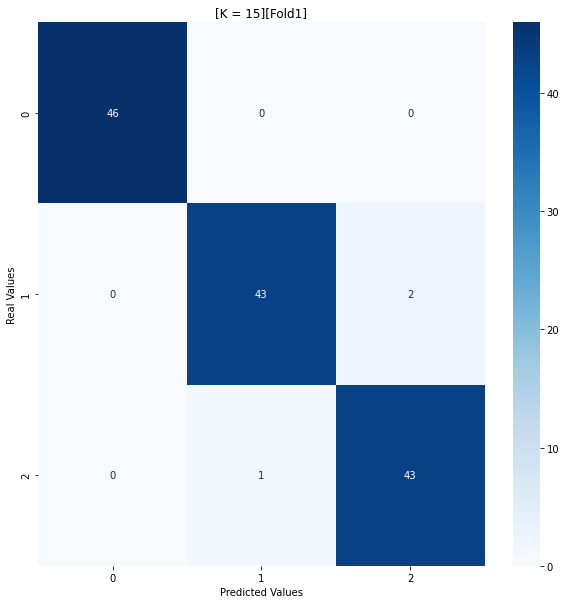

<Figure size 432x288 with 0 Axes>

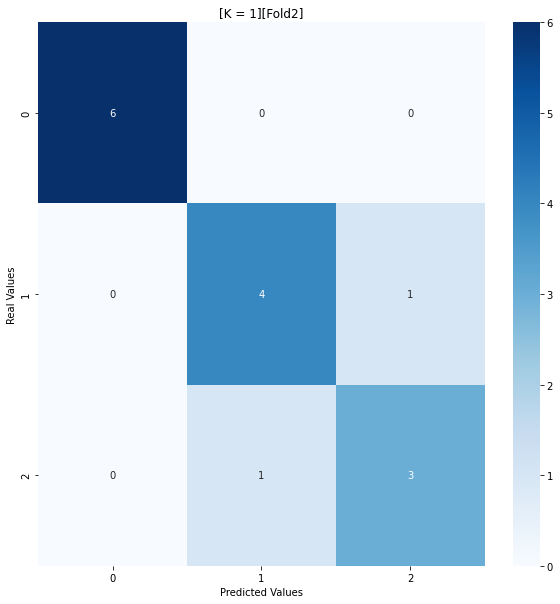

<Figure size 432x288 with 0 Axes>

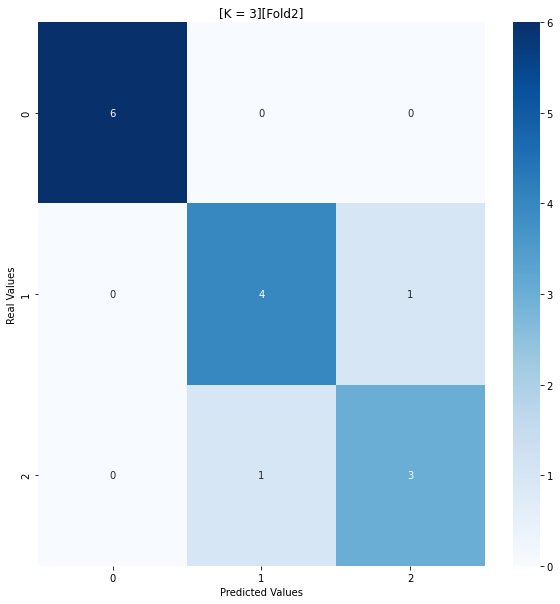

<Figure size 432x288 with 0 Axes>

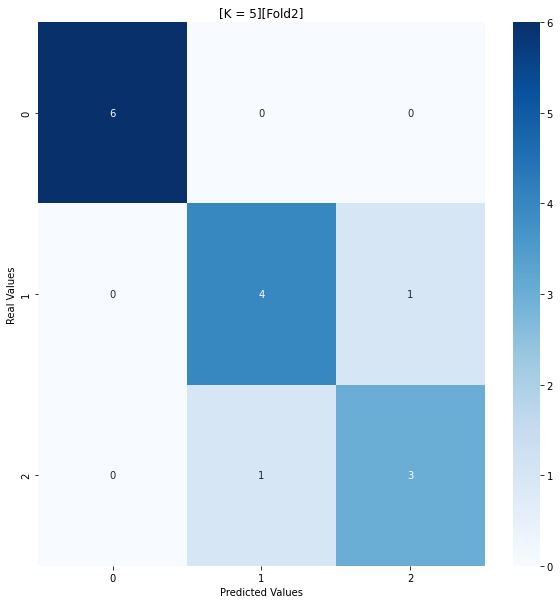

<Figure size 432x288 with 0 Axes>

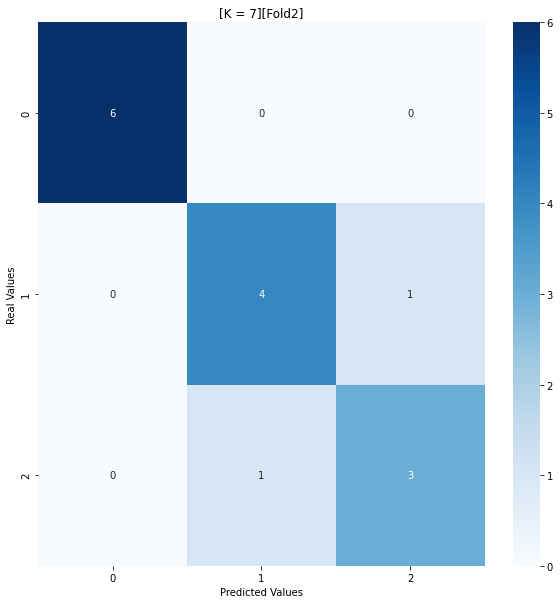

<Figure size 432x288 with 0 Axes>

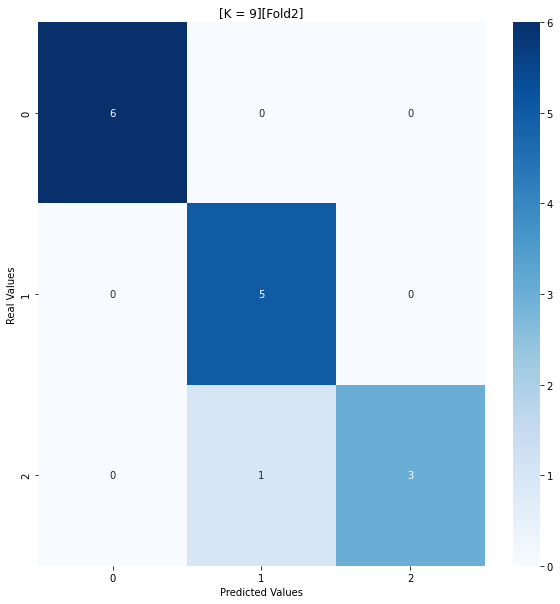

<Figure size 432x288 with 0 Axes>

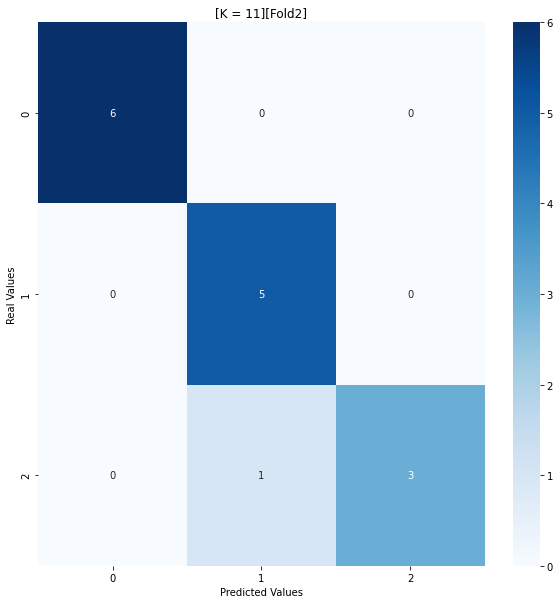

<Figure size 432x288 with 0 Axes>

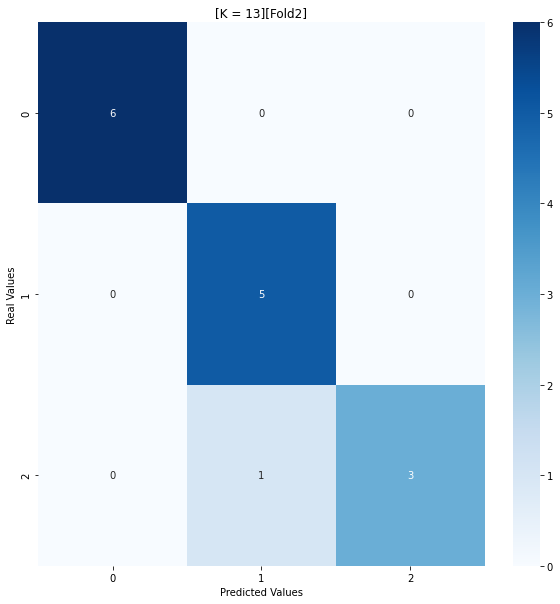

<Figure size 432x288 with 0 Axes>

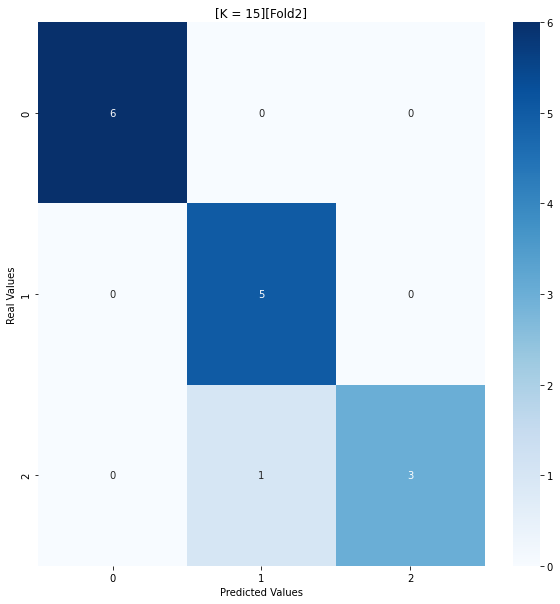

<Figure size 432x288 with 0 Axes>

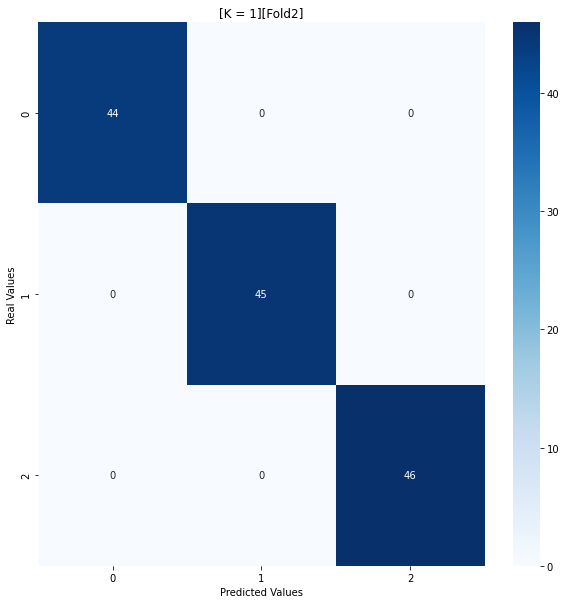

<Figure size 432x288 with 0 Axes>

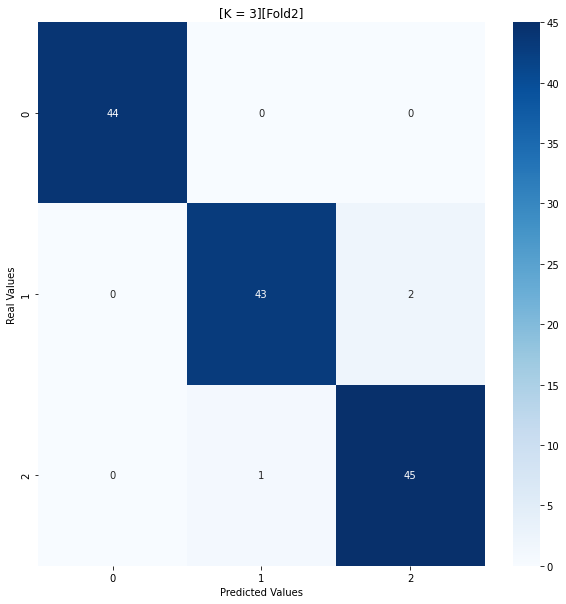

<Figure size 432x288 with 0 Axes>

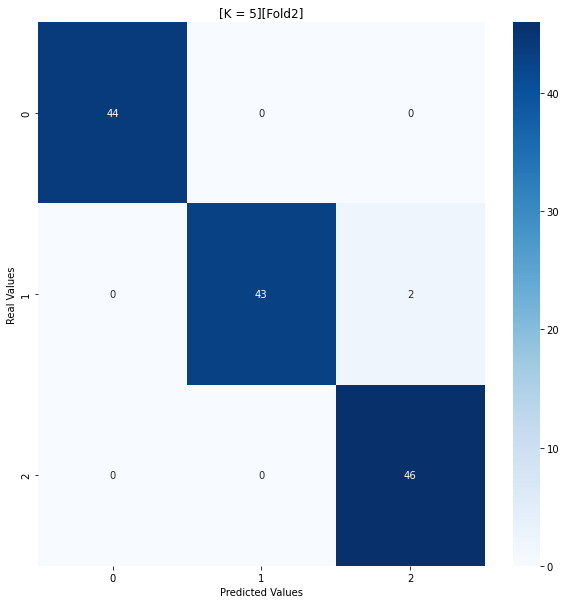

<Figure size 432x288 with 0 Axes>

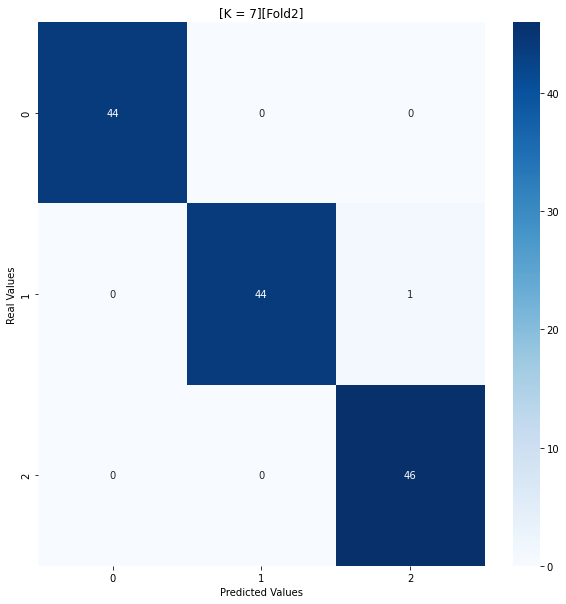

<Figure size 432x288 with 0 Axes>

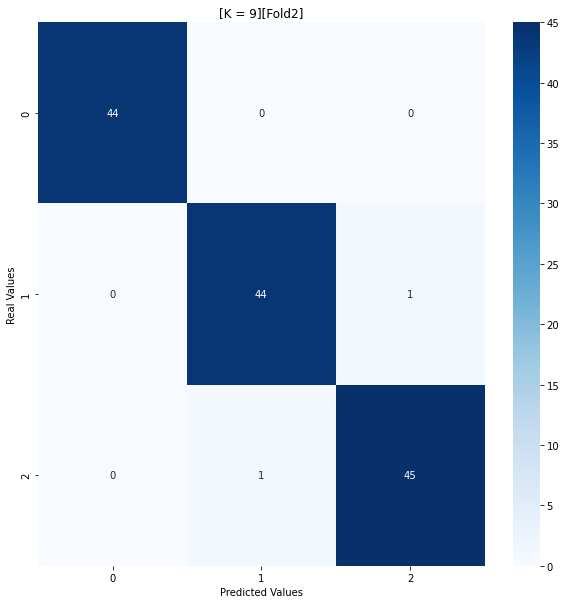

<Figure size 432x288 with 0 Axes>

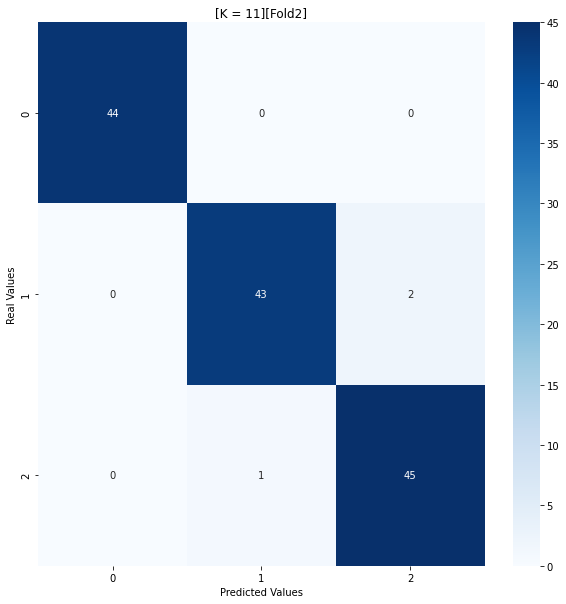

<Figure size 432x288 with 0 Axes>

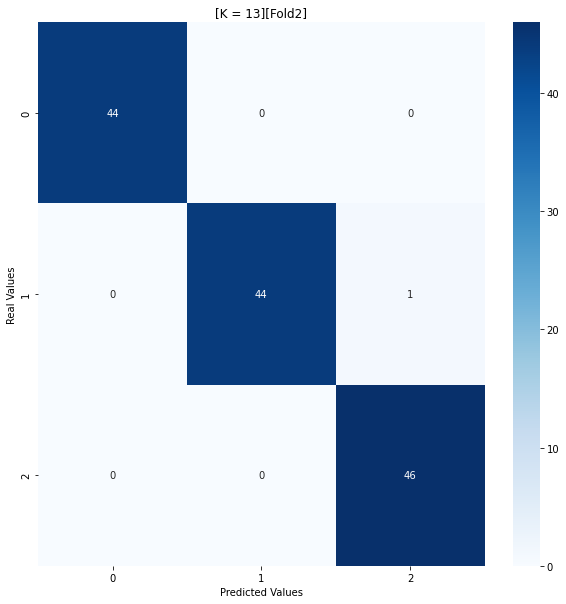

<Figure size 432x288 with 0 Axes>

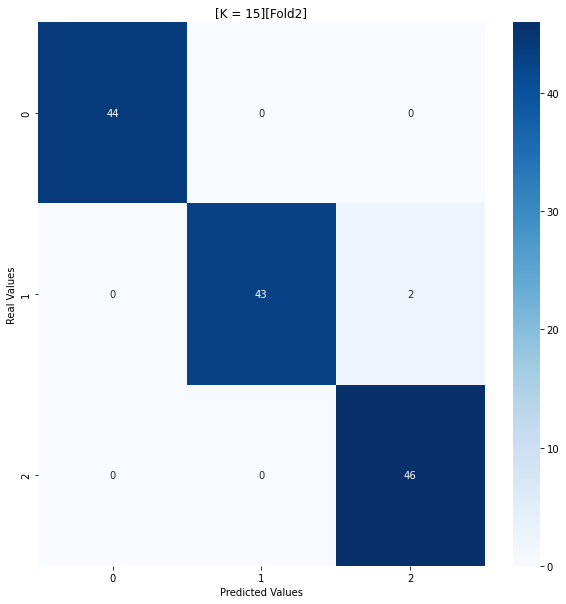

<Figure size 432x288 with 0 Axes>

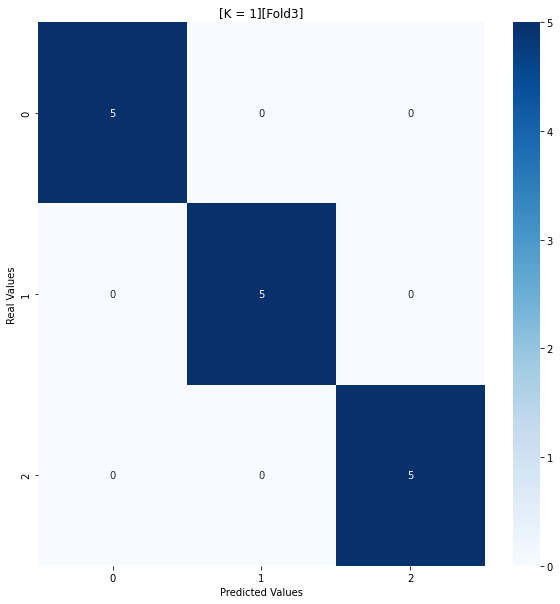

<Figure size 432x288 with 0 Axes>

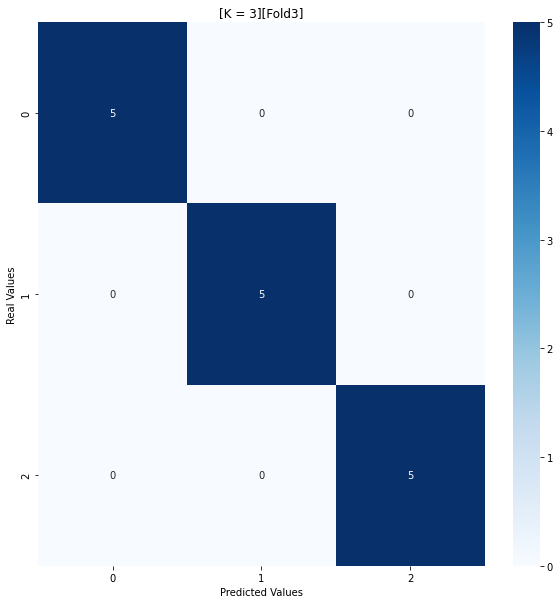

<Figure size 432x288 with 0 Axes>

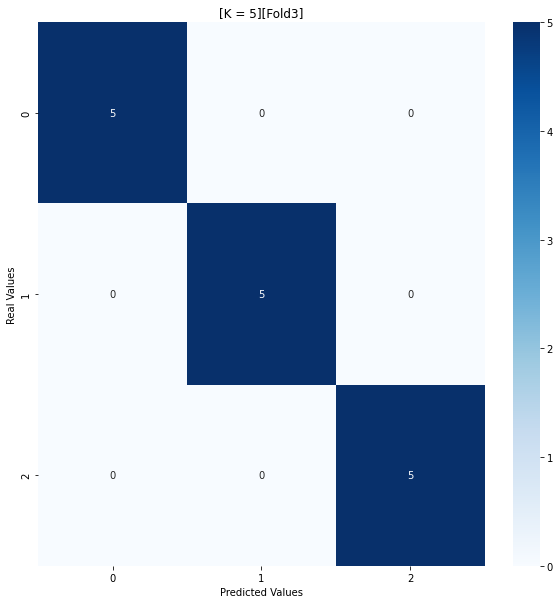

<Figure size 432x288 with 0 Axes>

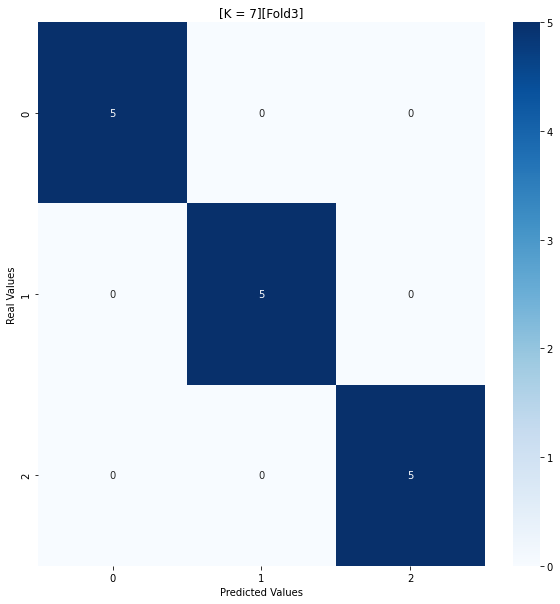

<Figure size 432x288 with 0 Axes>

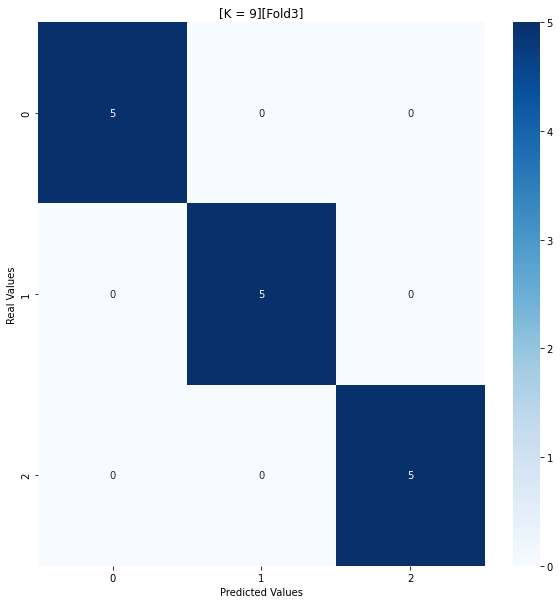

<Figure size 432x288 with 0 Axes>

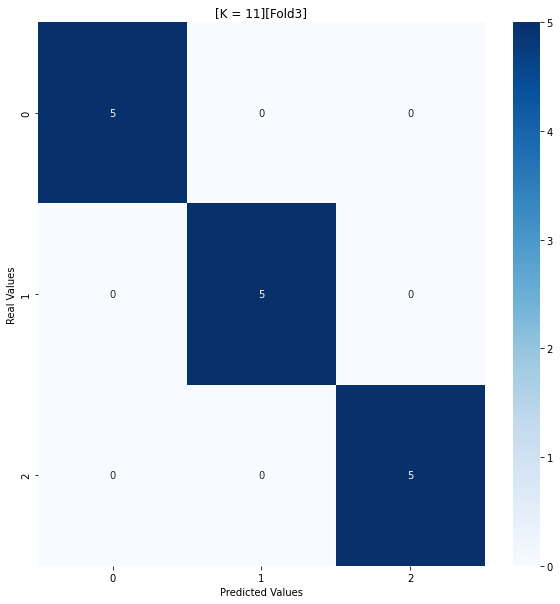

<Figure size 432x288 with 0 Axes>

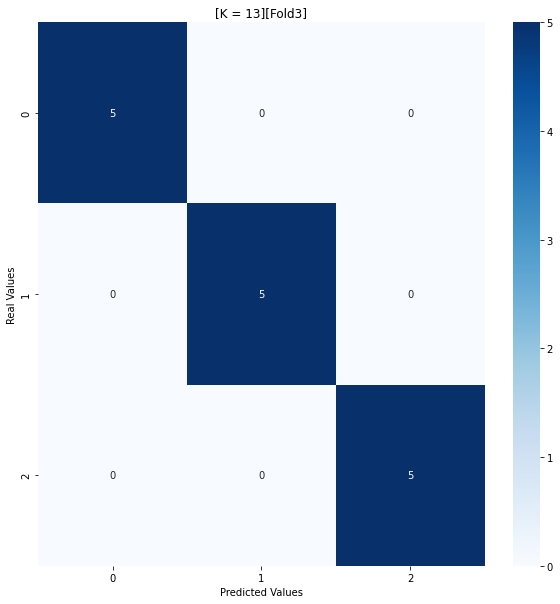

<Figure size 432x288 with 0 Axes>

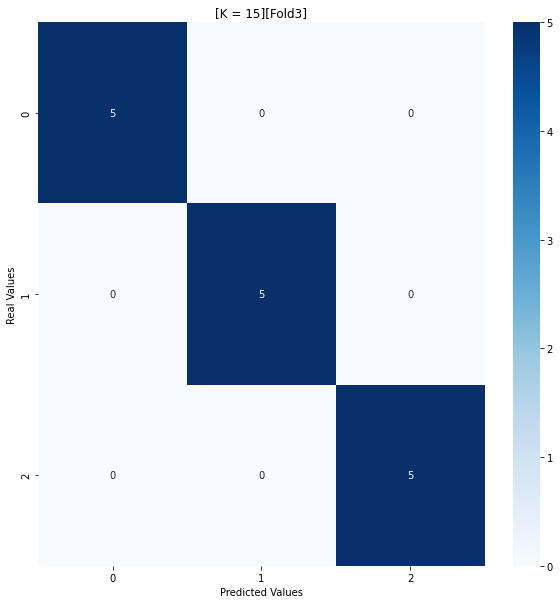

<Figure size 432x288 with 0 Axes>

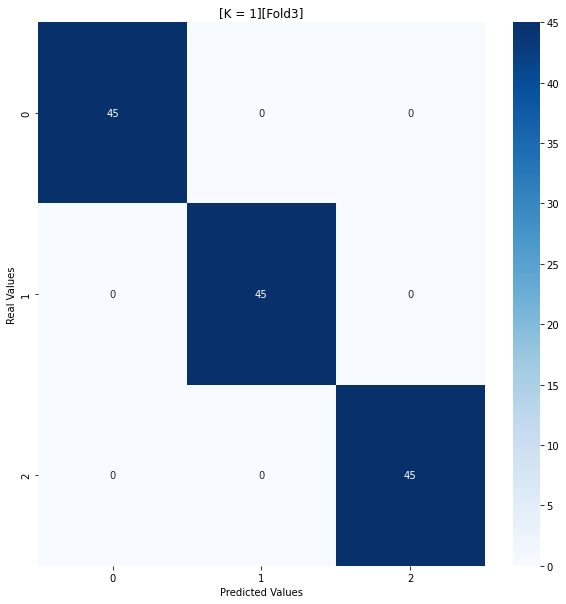

<Figure size 432x288 with 0 Axes>

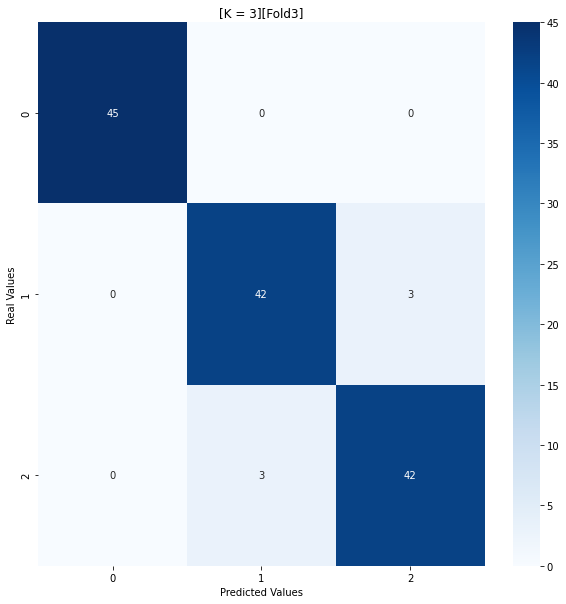

<Figure size 432x288 with 0 Axes>

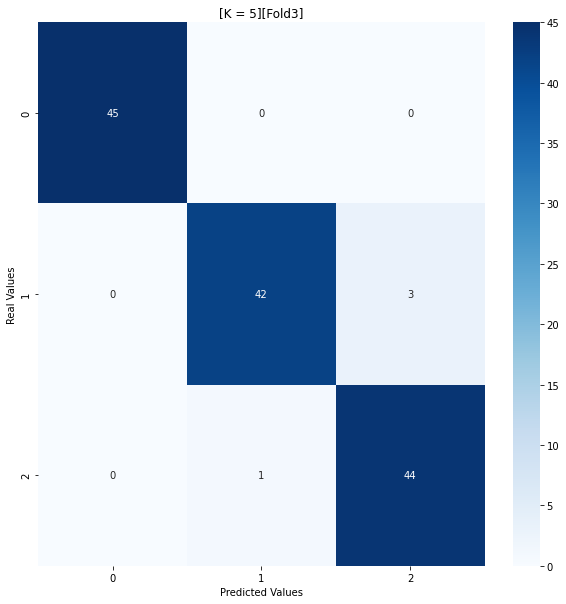

<Figure size 432x288 with 0 Axes>

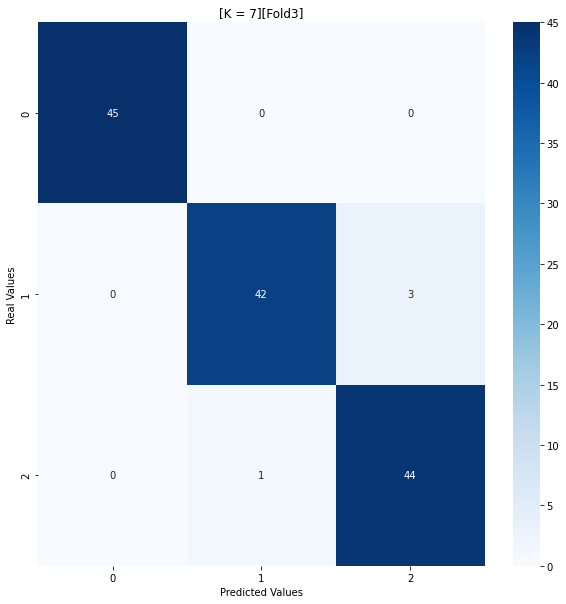

<Figure size 432x288 with 0 Axes>

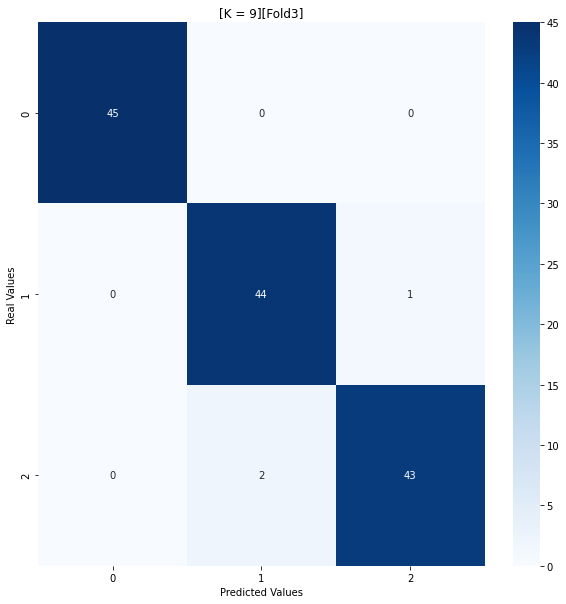

<Figure size 432x288 with 0 Axes>

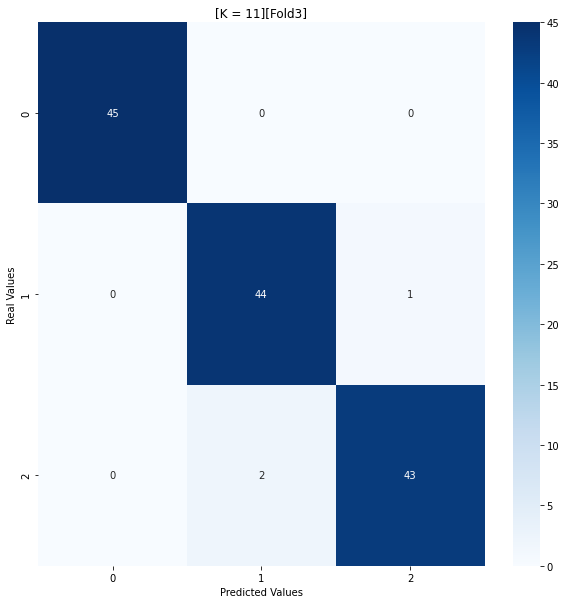

<Figure size 432x288 with 0 Axes>

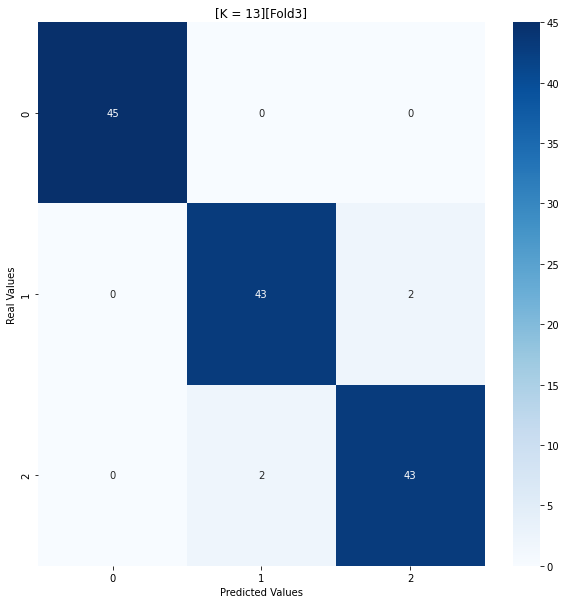

<Figure size 432x288 with 0 Axes>

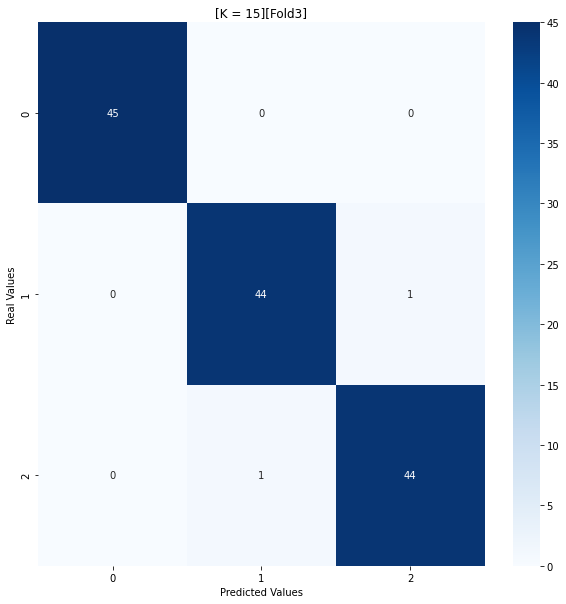

<Figure size 432x288 with 0 Axes>

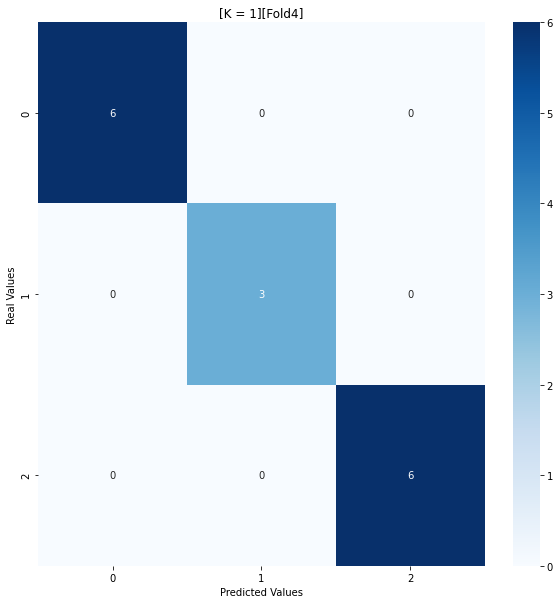

<Figure size 432x288 with 0 Axes>

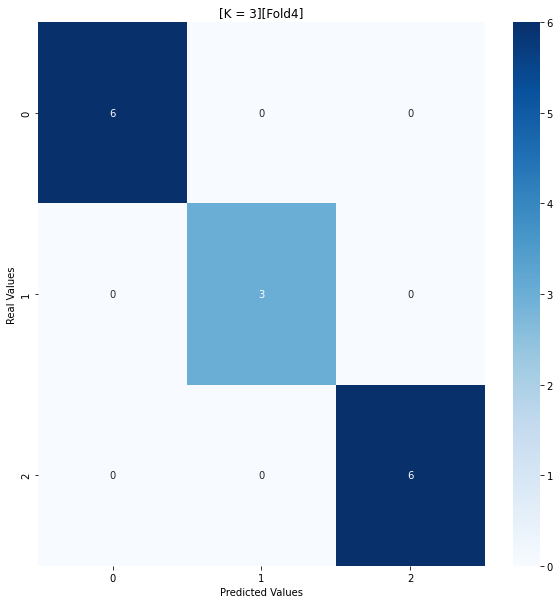

<Figure size 432x288 with 0 Axes>

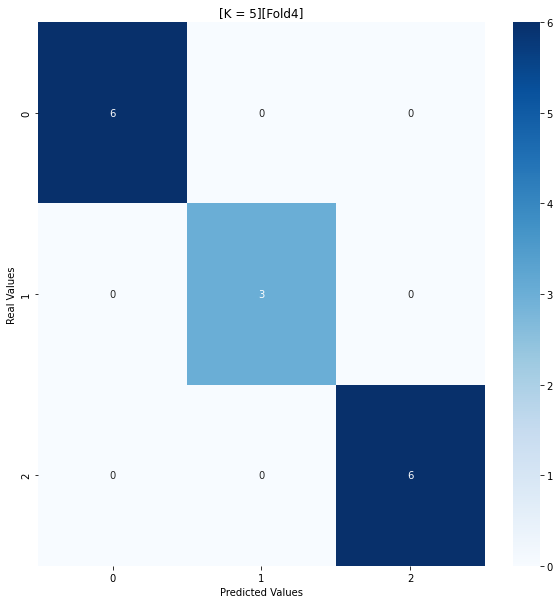

<Figure size 432x288 with 0 Axes>

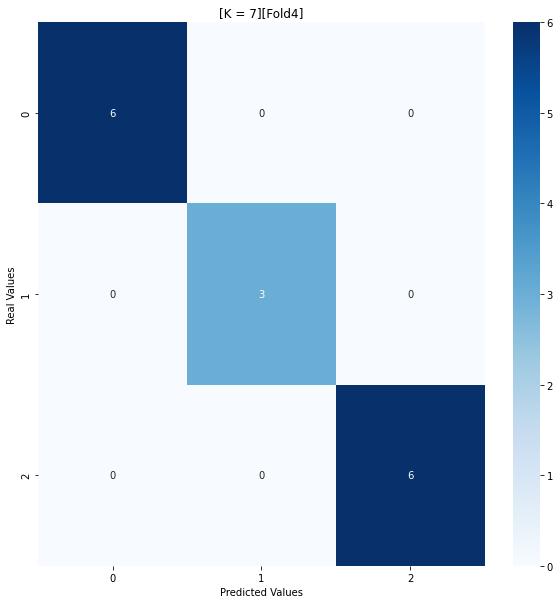

<Figure size 432x288 with 0 Axes>

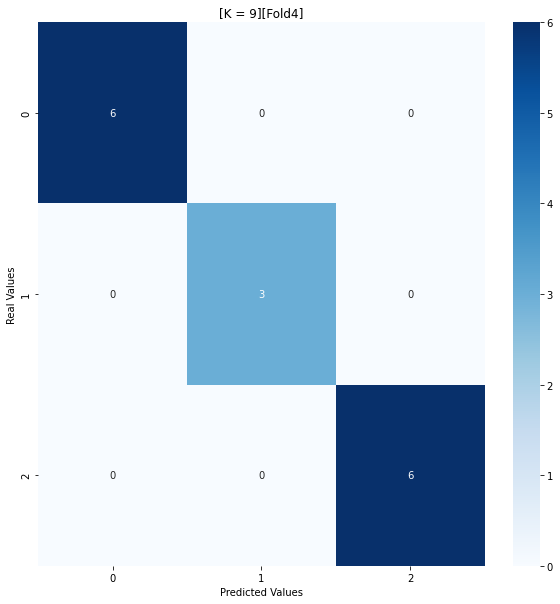

<Figure size 432x288 with 0 Axes>

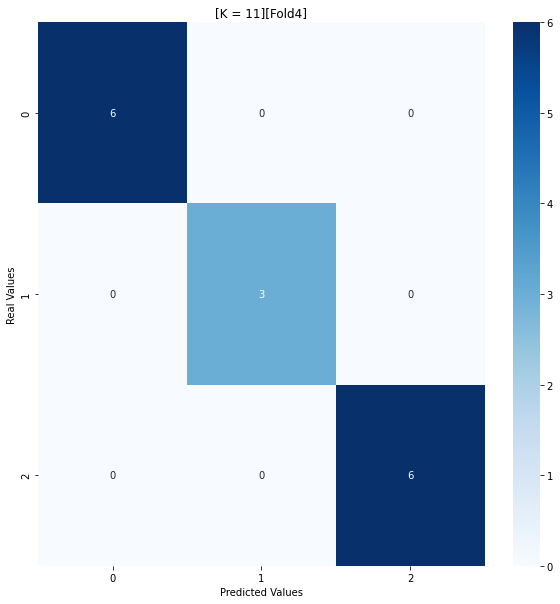

<Figure size 432x288 with 0 Axes>

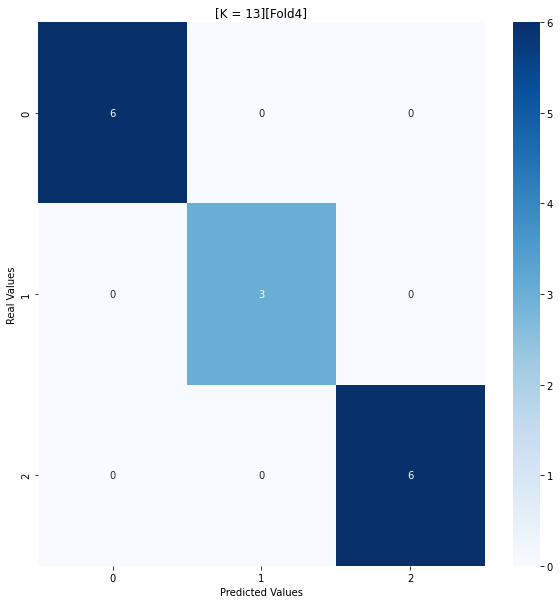

<Figure size 432x288 with 0 Axes>

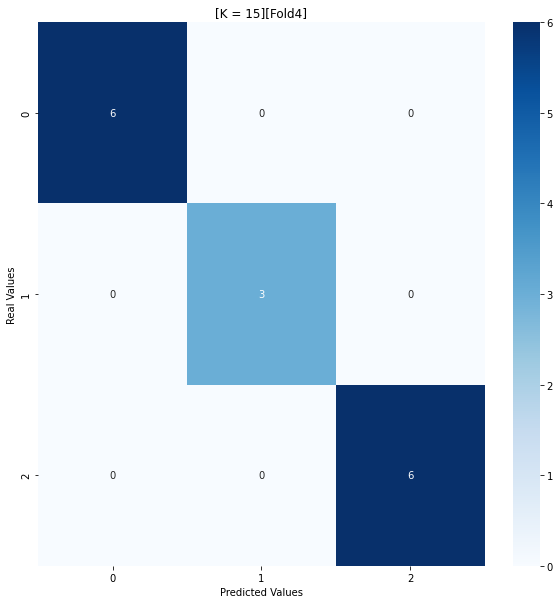

<Figure size 432x288 with 0 Axes>

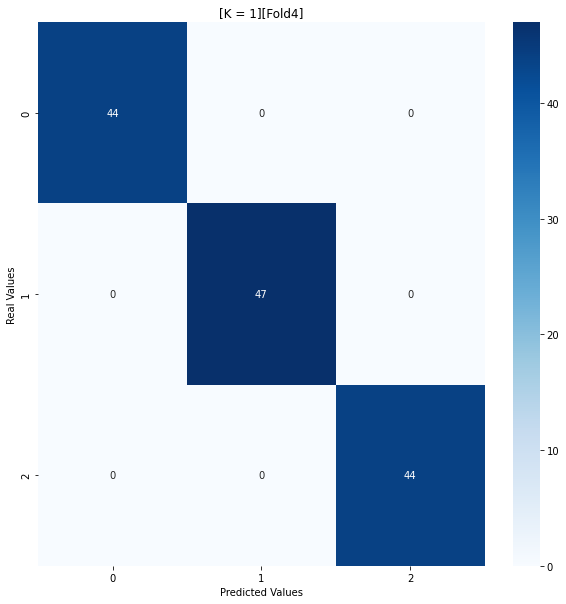

<Figure size 432x288 with 0 Axes>

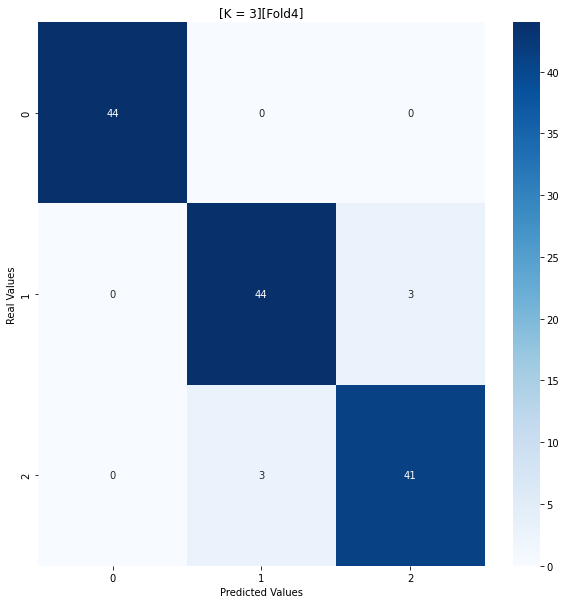

<Figure size 432x288 with 0 Axes>

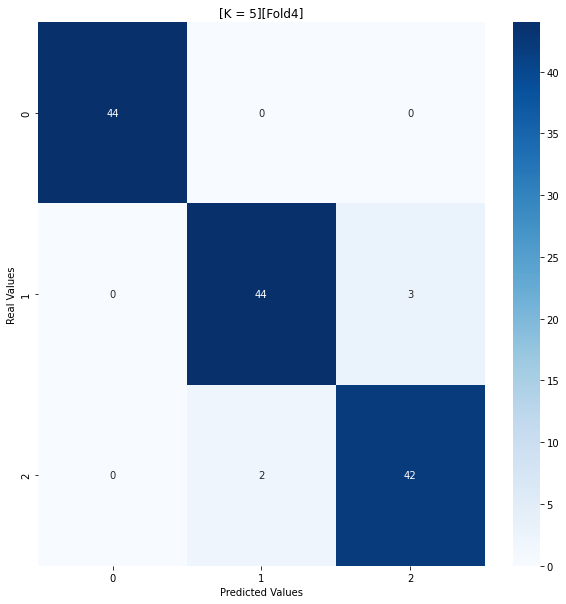

<Figure size 432x288 with 0 Axes>

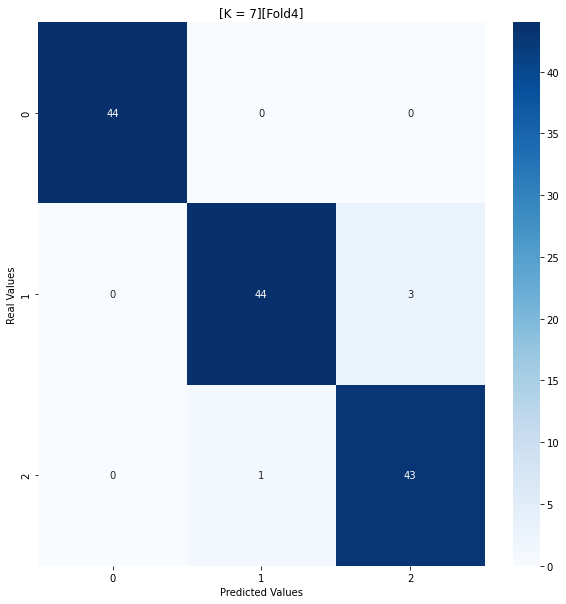

<Figure size 432x288 with 0 Axes>

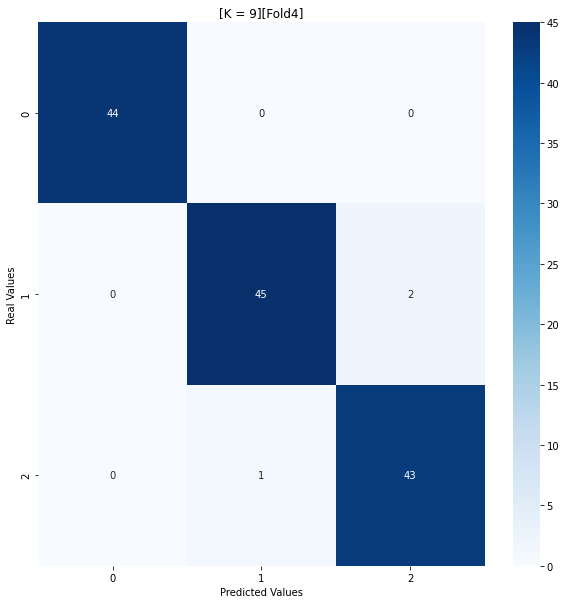

<Figure size 432x288 with 0 Axes>

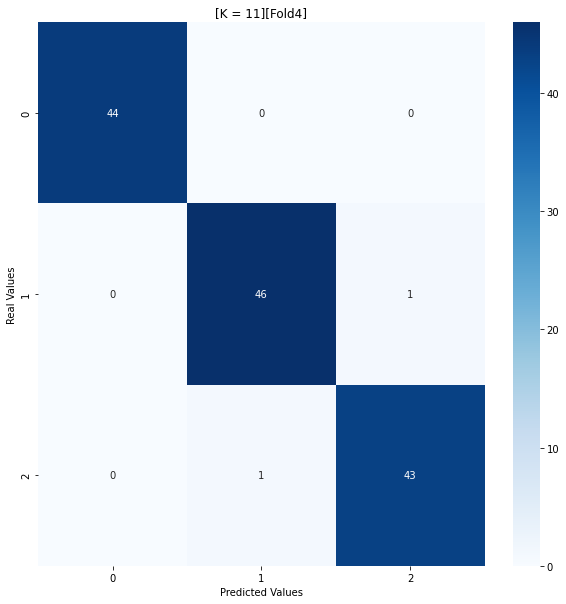

<Figure size 432x288 with 0 Axes>

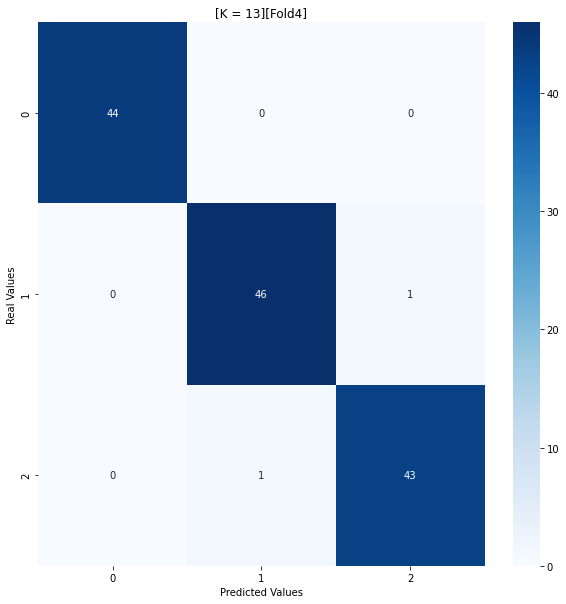

<Figure size 432x288 with 0 Axes>

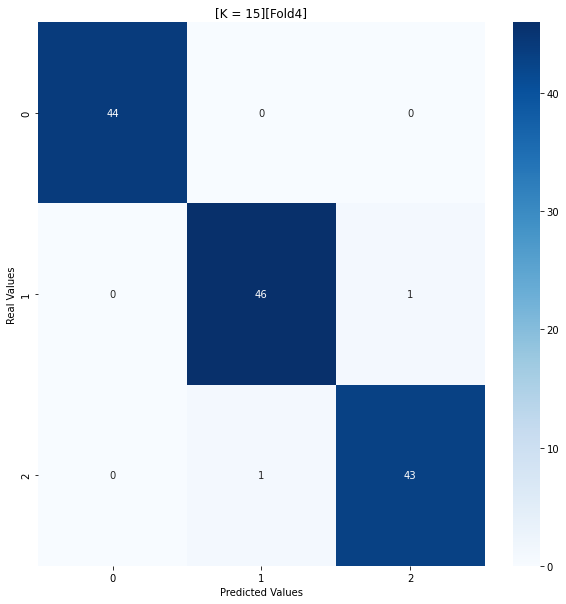

<Figure size 432x288 with 0 Axes>

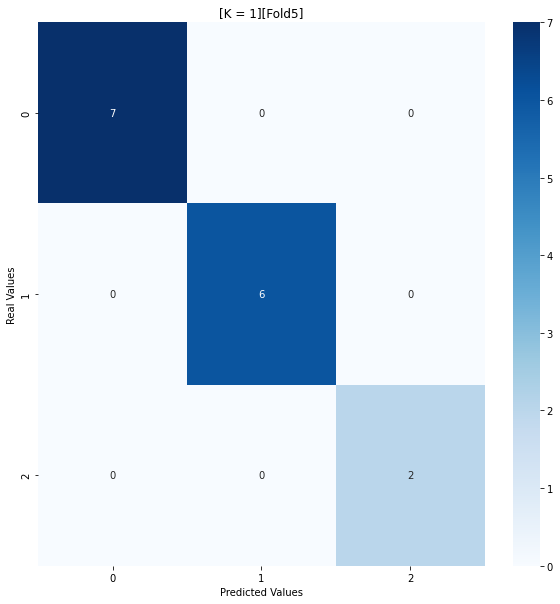

<Figure size 432x288 with 0 Axes>

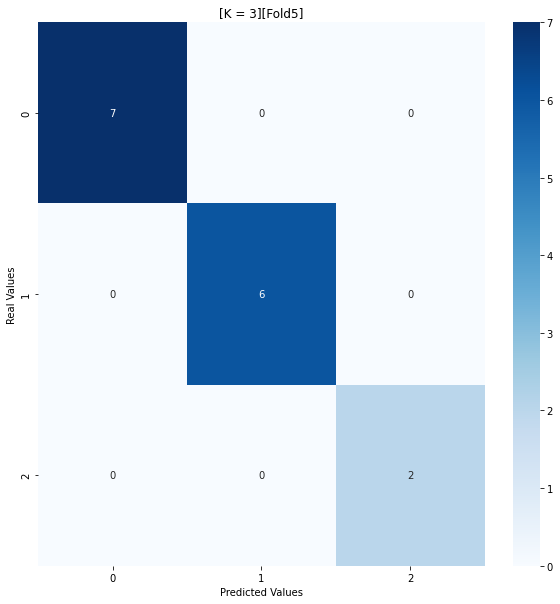

<Figure size 432x288 with 0 Axes>

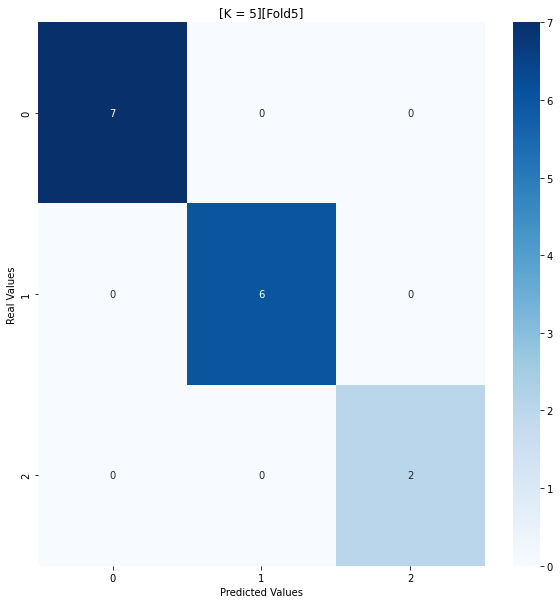

<Figure size 432x288 with 0 Axes>

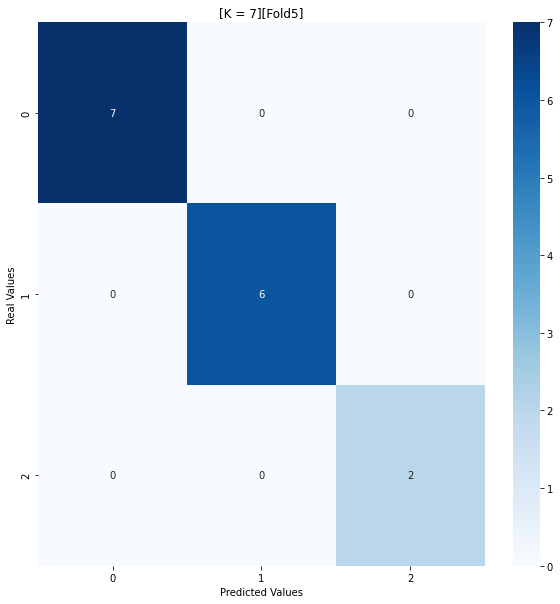

<Figure size 432x288 with 0 Axes>

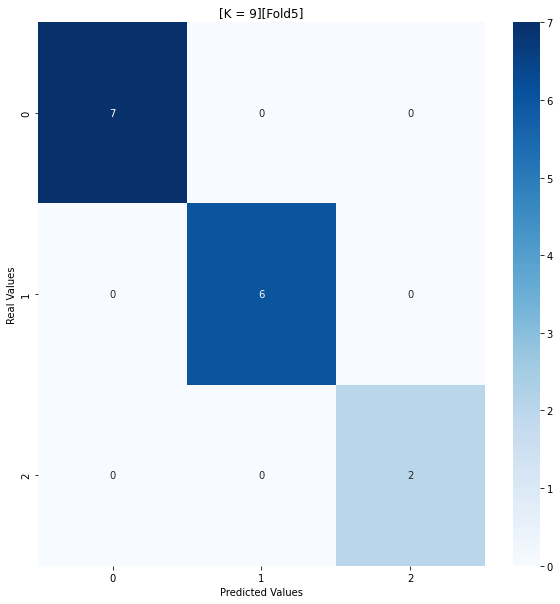

<Figure size 432x288 with 0 Axes>

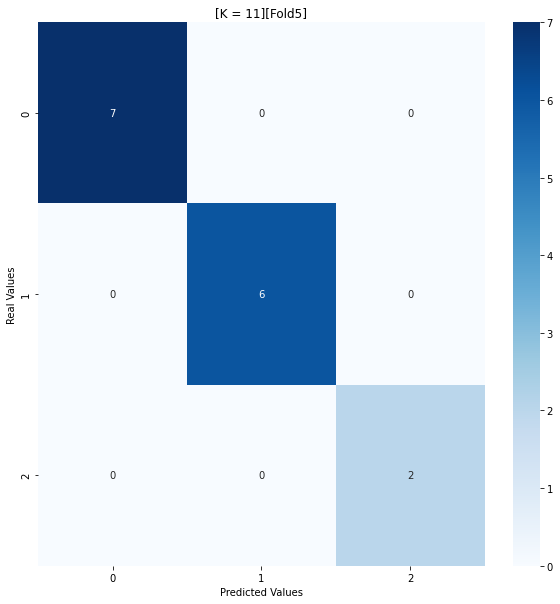

<Figure size 432x288 with 0 Axes>

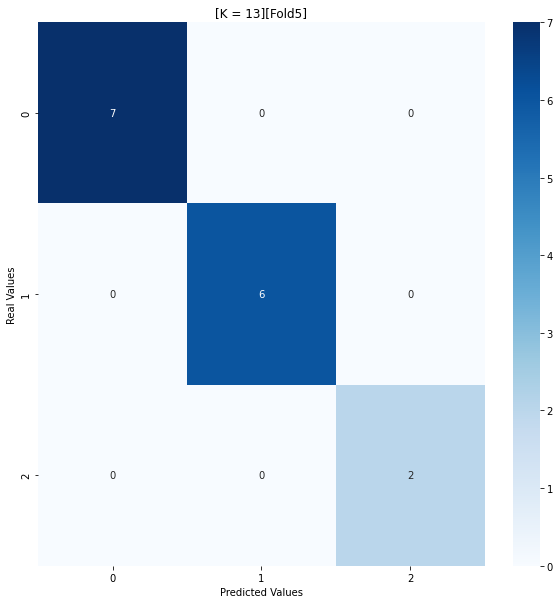

<Figure size 432x288 with 0 Axes>

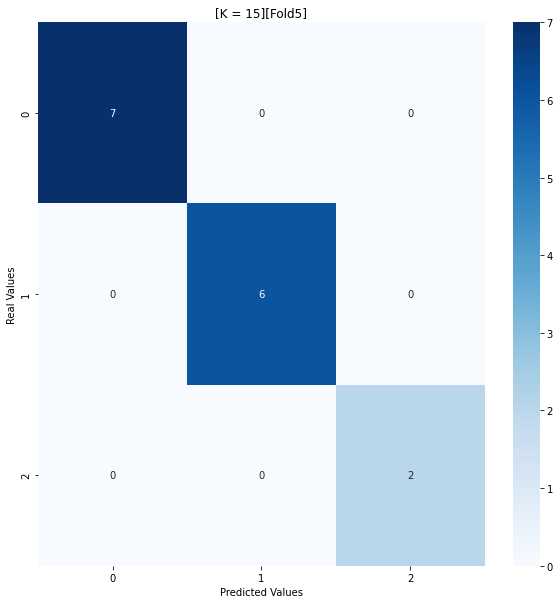

<Figure size 432x288 with 0 Axes>

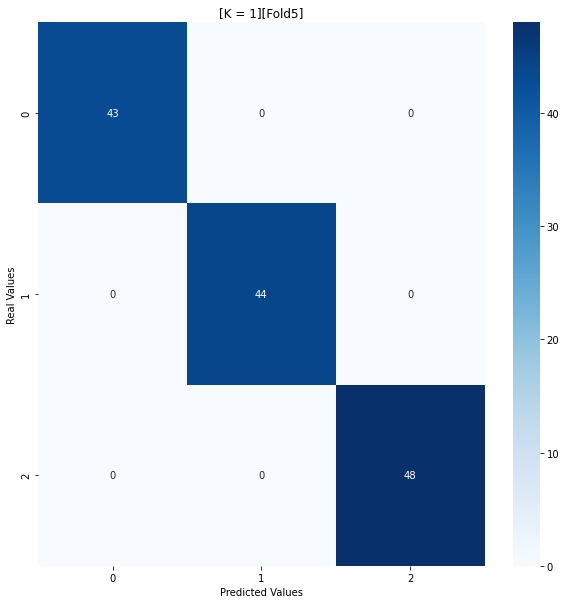

<Figure size 432x288 with 0 Axes>

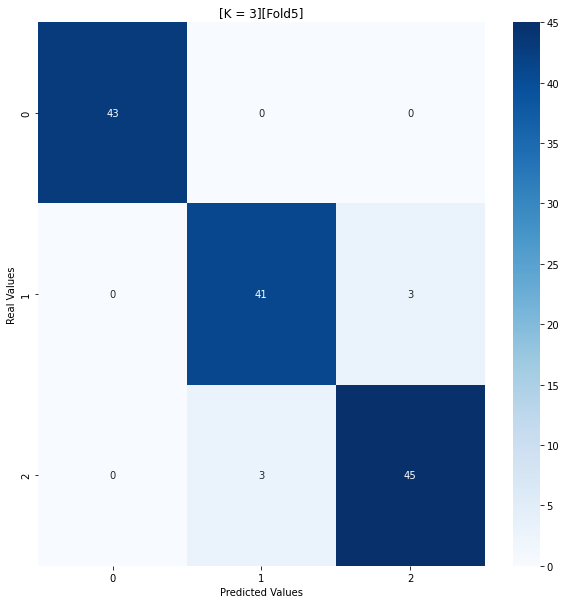

<Figure size 432x288 with 0 Axes>

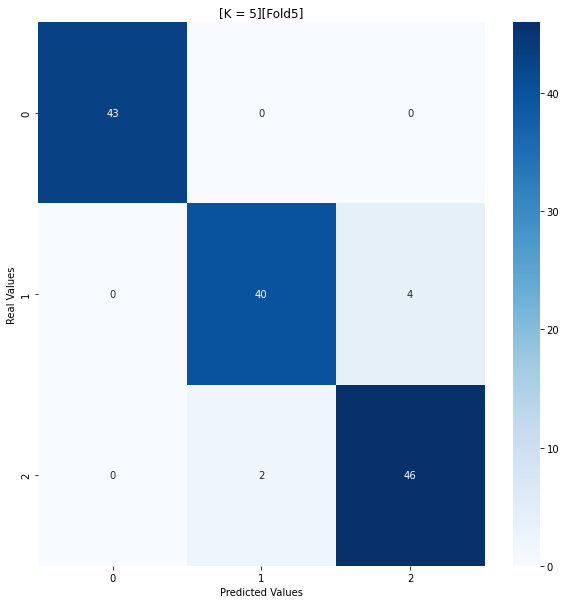

<Figure size 432x288 with 0 Axes>

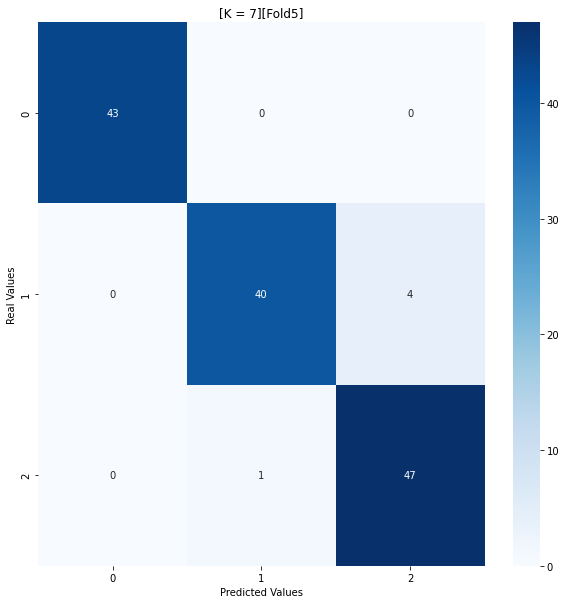

<Figure size 432x288 with 0 Axes>

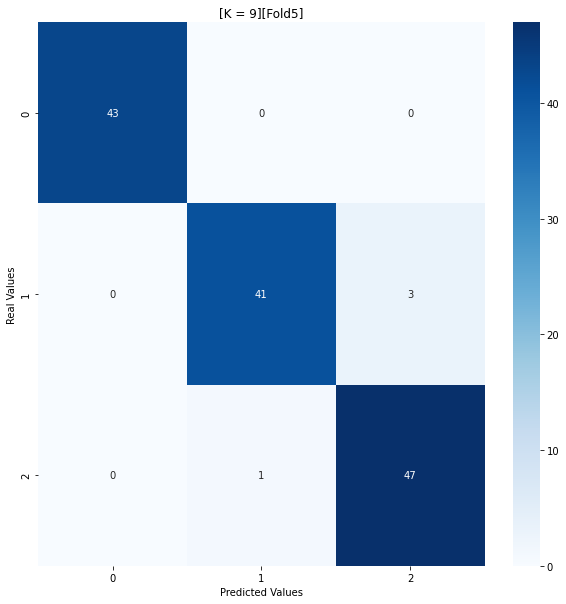

<Figure size 432x288 with 0 Axes>

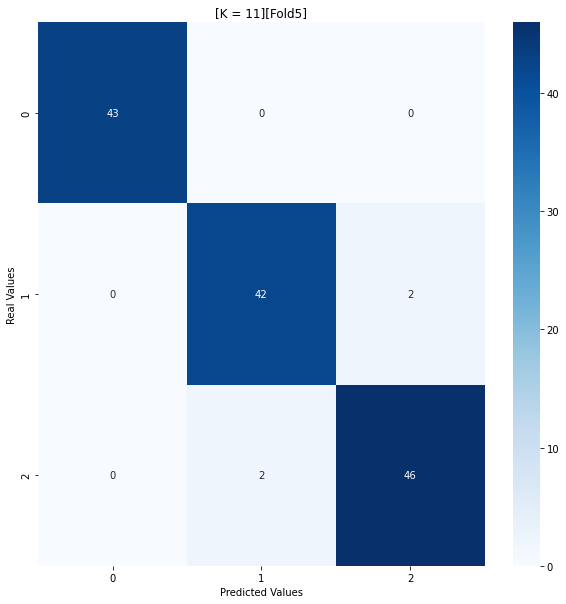

<Figure size 432x288 with 0 Axes>

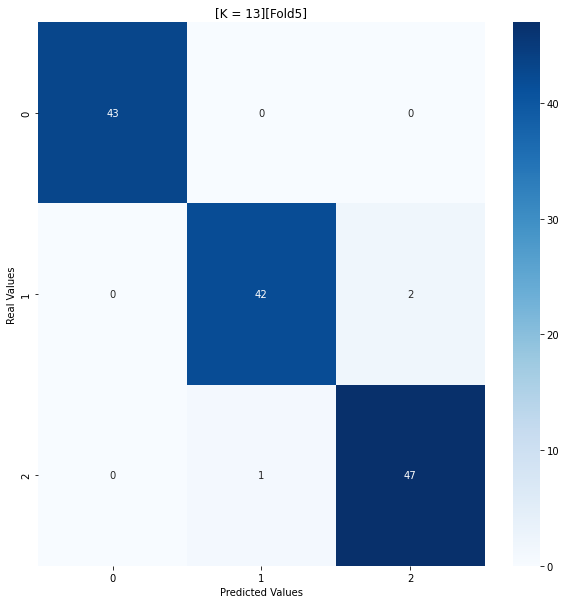

<Figure size 432x288 with 0 Axes>

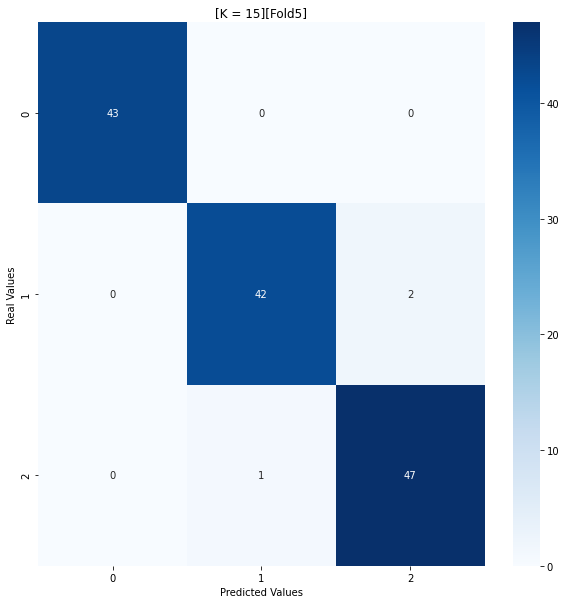

<Figure size 432x288 with 0 Axes>

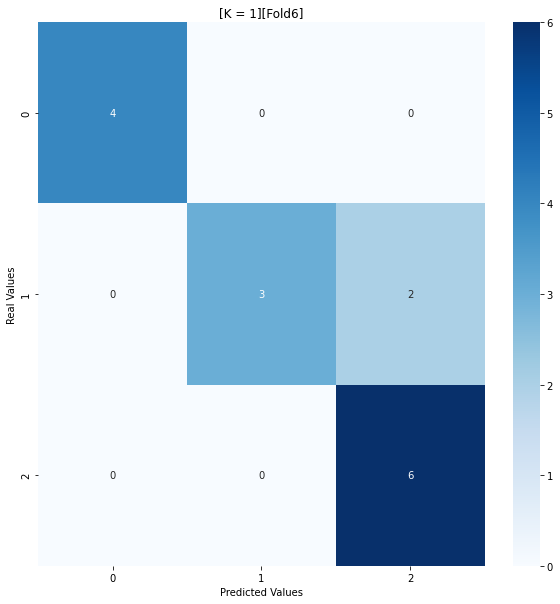

<Figure size 432x288 with 0 Axes>

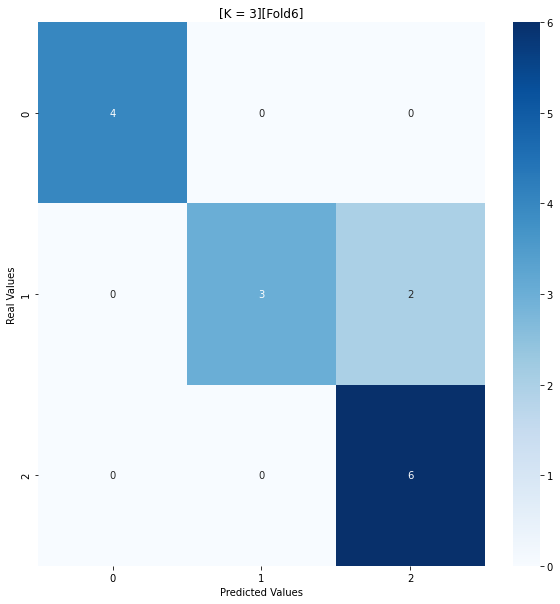

<Figure size 432x288 with 0 Axes>

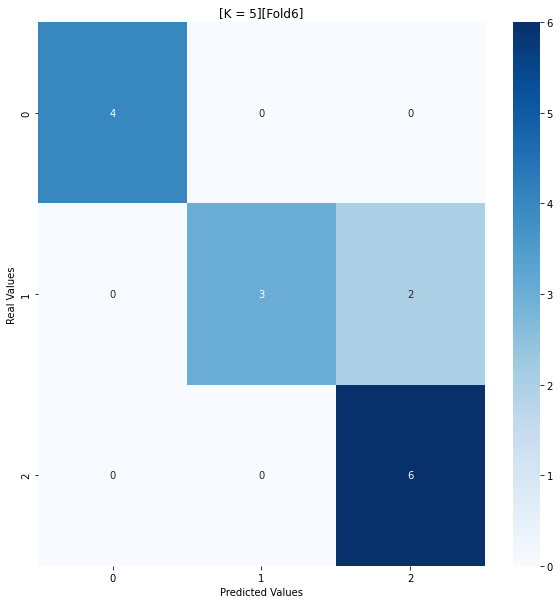

<Figure size 432x288 with 0 Axes>

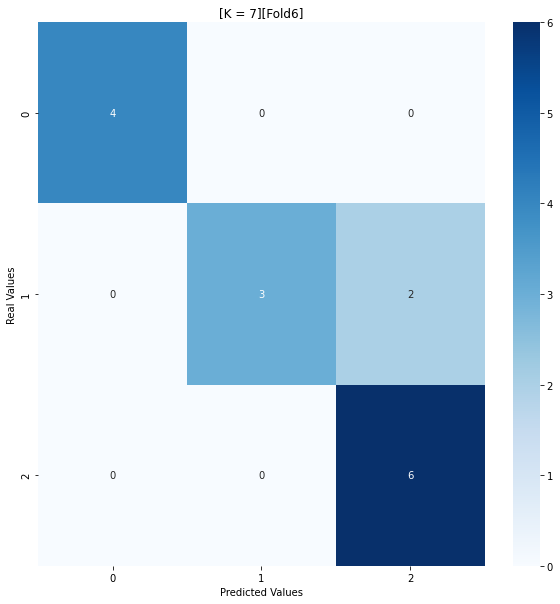

<Figure size 432x288 with 0 Axes>

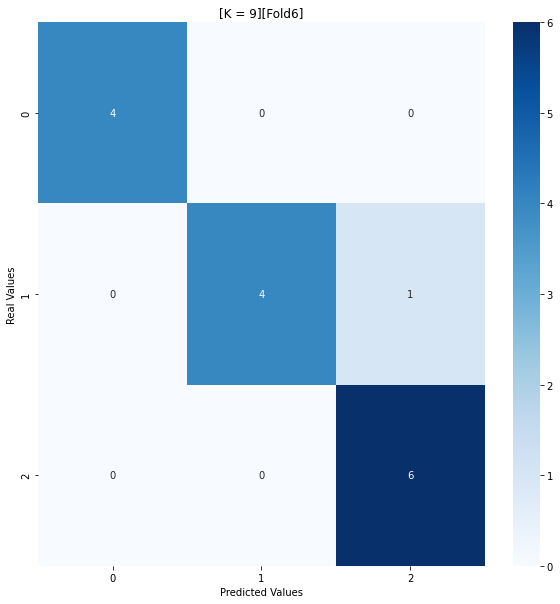

<Figure size 432x288 with 0 Axes>

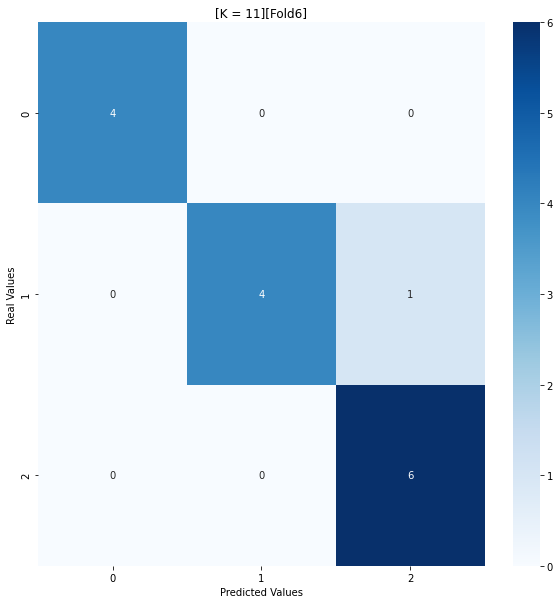

<Figure size 432x288 with 0 Axes>

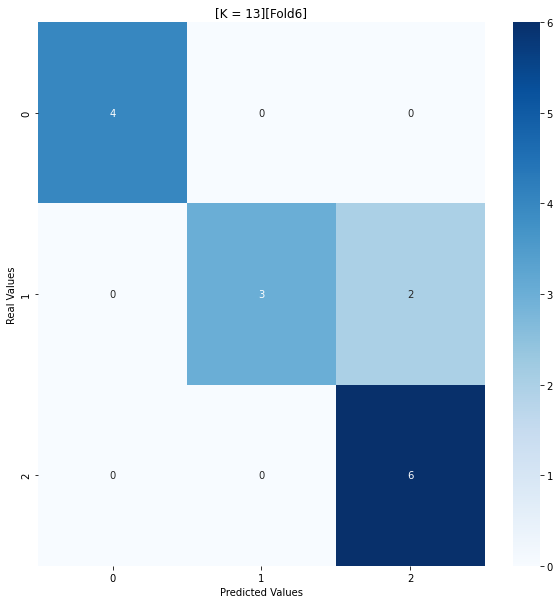

<Figure size 432x288 with 0 Axes>

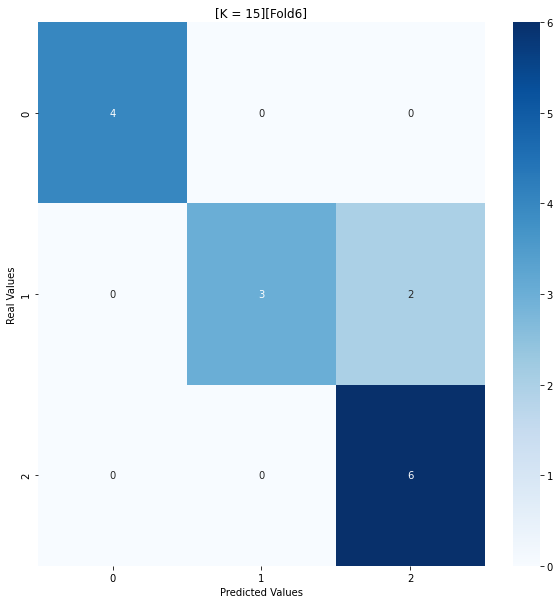

<Figure size 432x288 with 0 Axes>

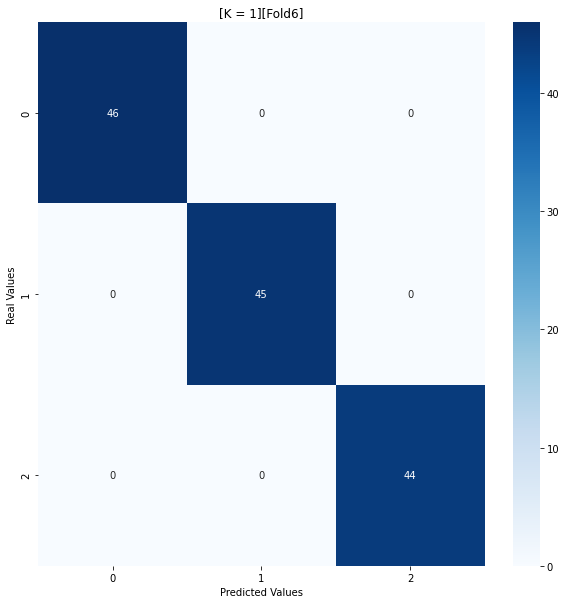

<Figure size 432x288 with 0 Axes>

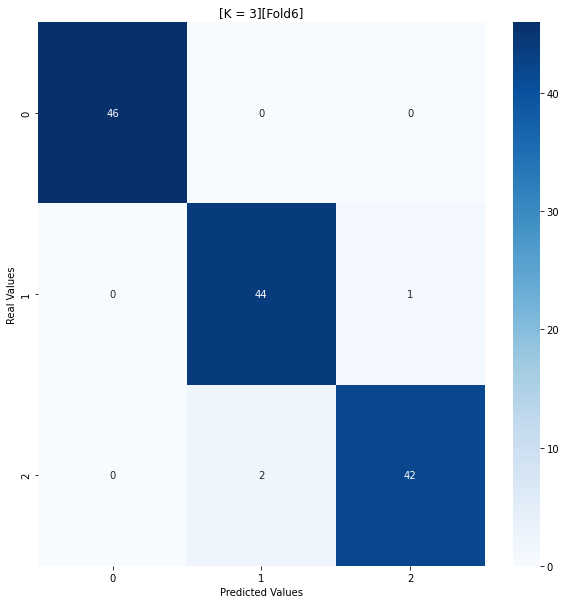

<Figure size 432x288 with 0 Axes>

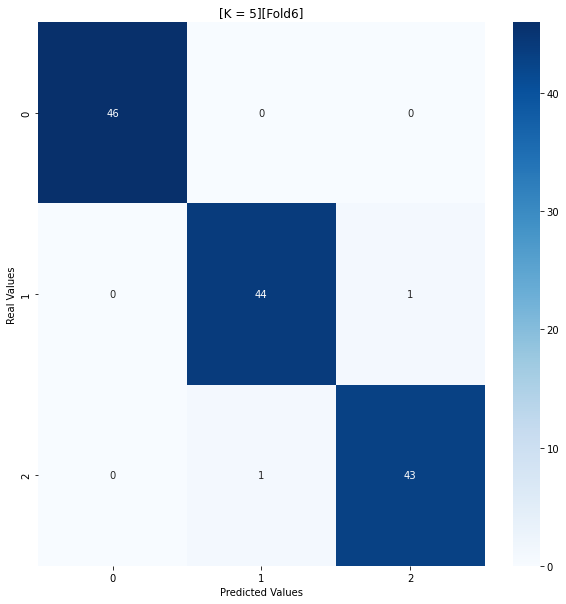

<Figure size 432x288 with 0 Axes>

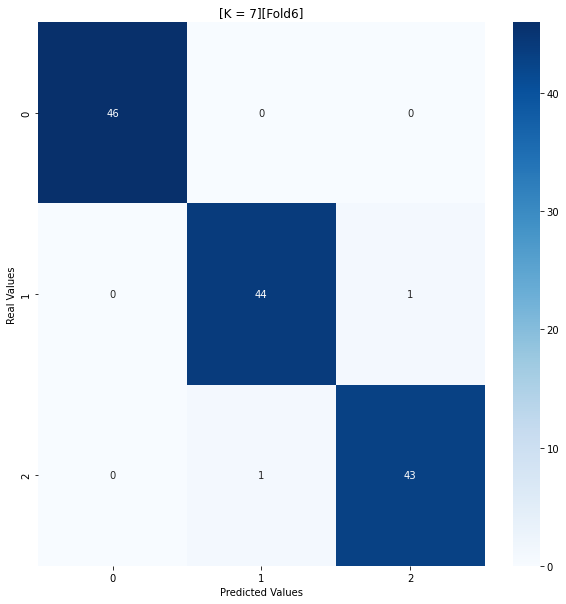

<Figure size 432x288 with 0 Axes>

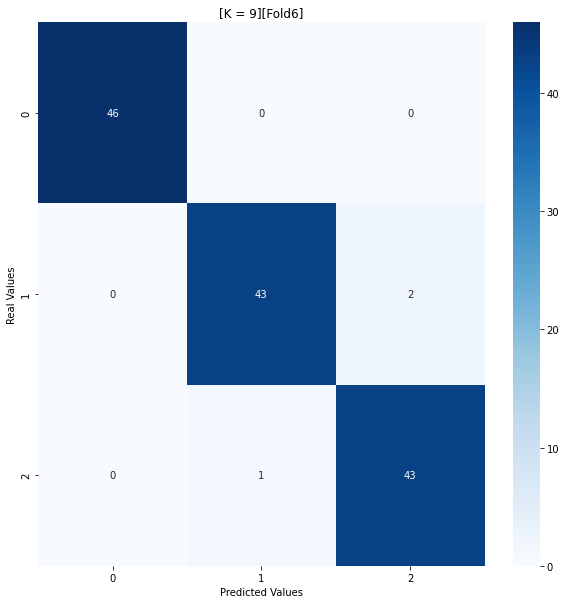

<Figure size 432x288 with 0 Axes>

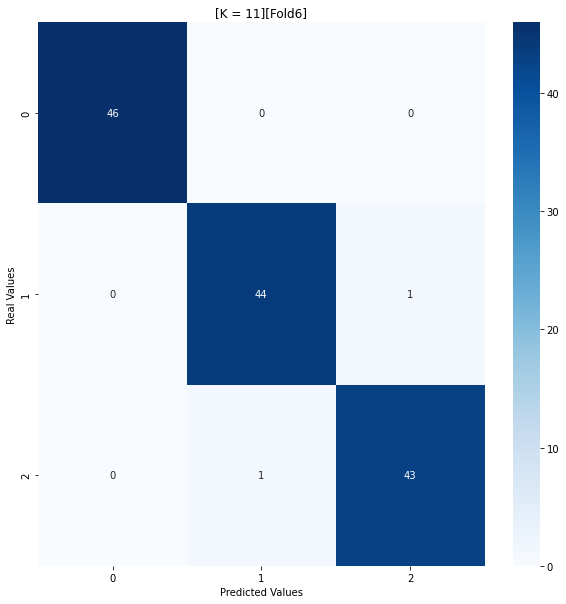

<Figure size 432x288 with 0 Axes>

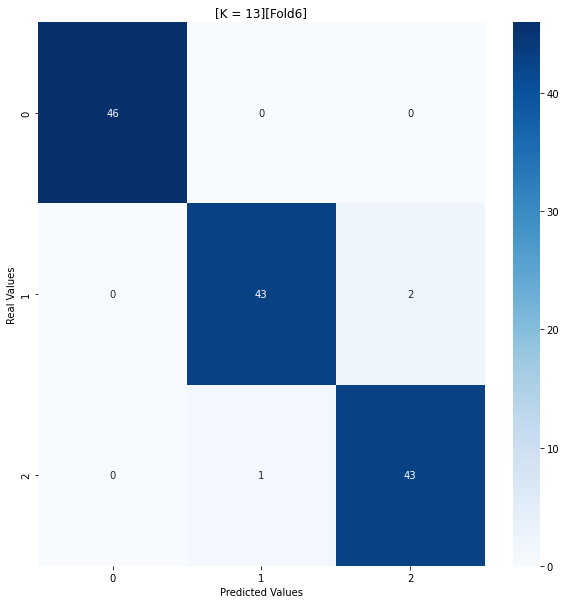

<Figure size 432x288 with 0 Axes>

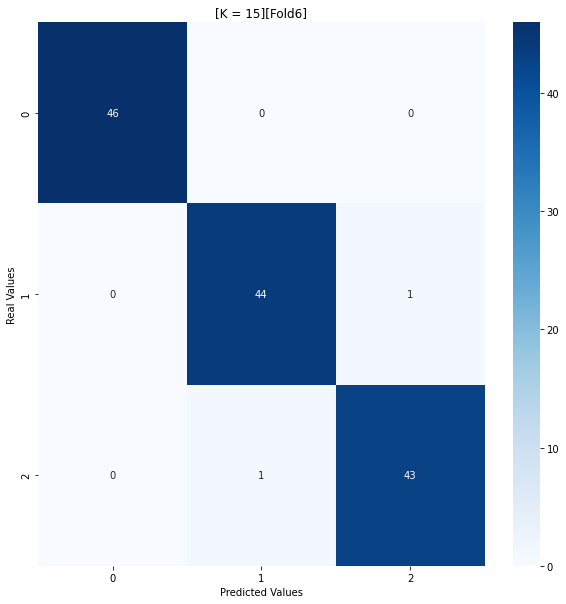

<Figure size 432x288 with 0 Axes>

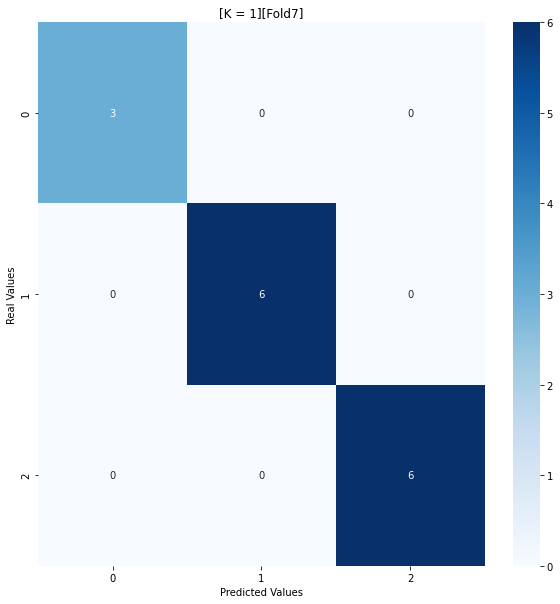

<Figure size 432x288 with 0 Axes>

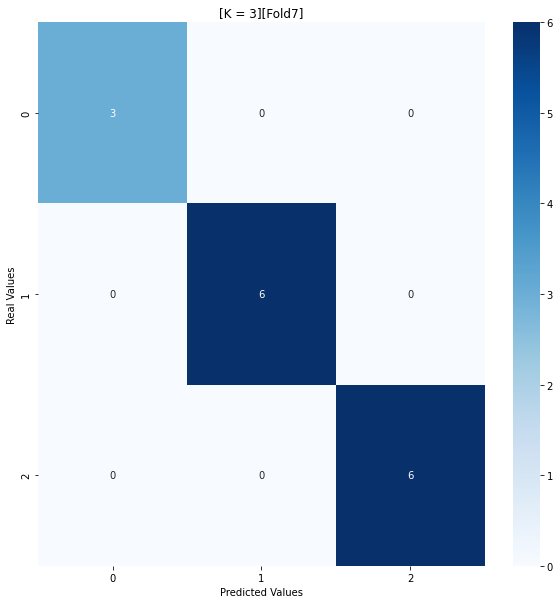

<Figure size 432x288 with 0 Axes>

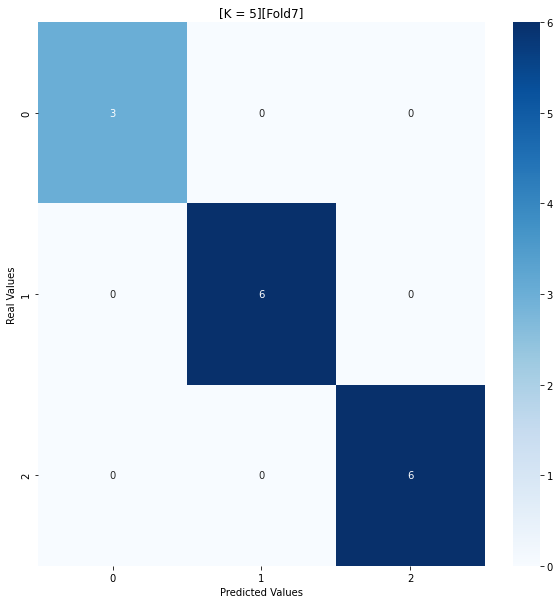

<Figure size 432x288 with 0 Axes>

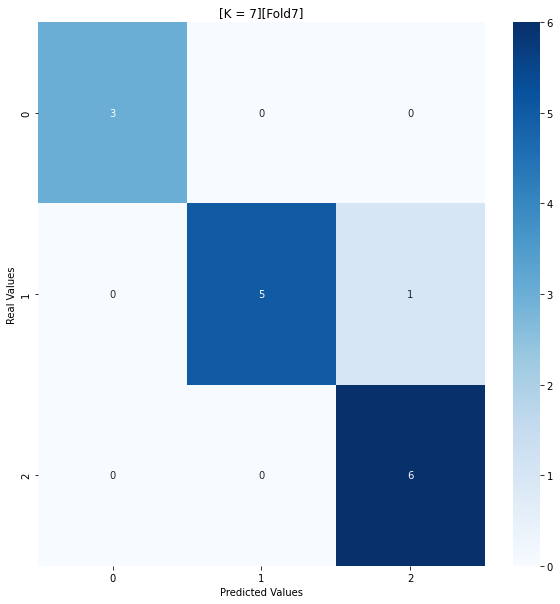

<Figure size 432x288 with 0 Axes>

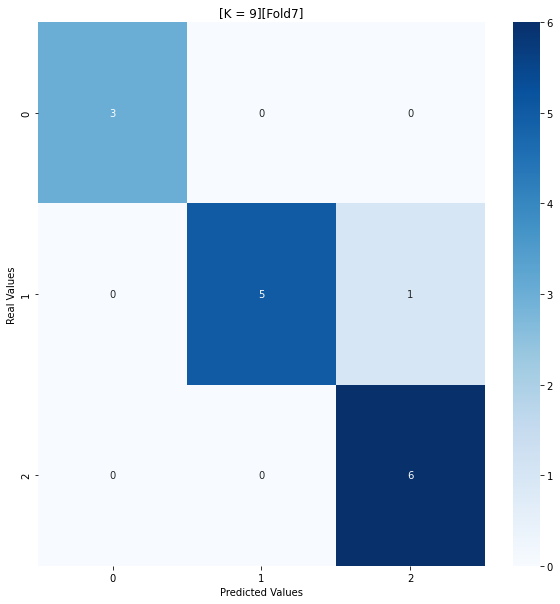

<Figure size 432x288 with 0 Axes>

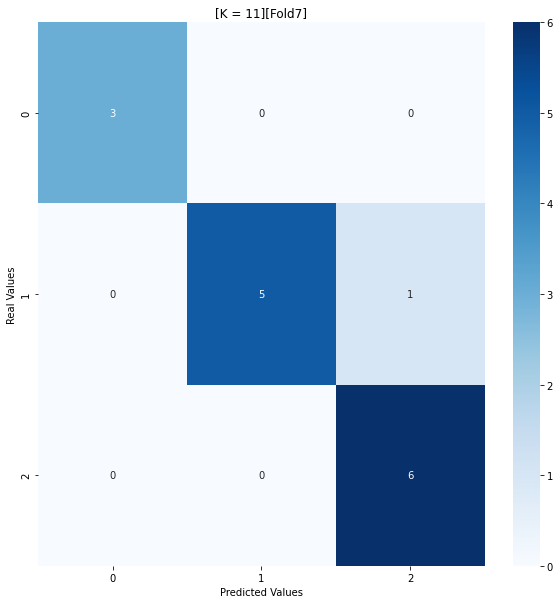

<Figure size 432x288 with 0 Axes>

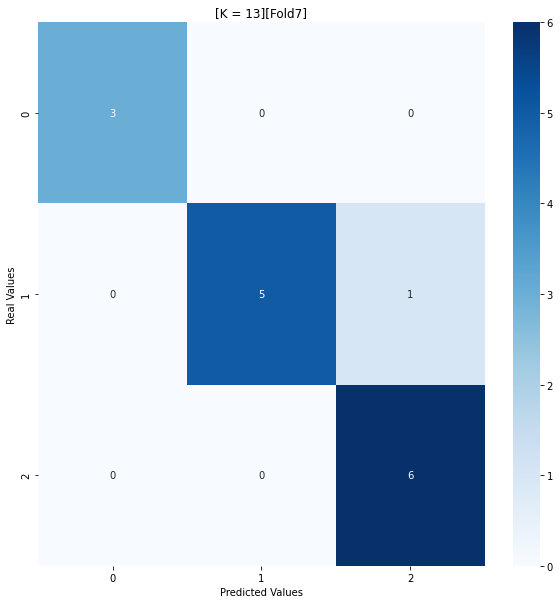

<Figure size 432x288 with 0 Axes>

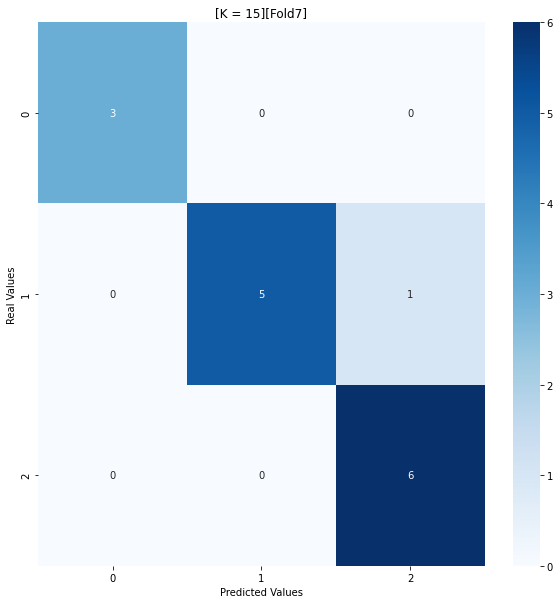

<Figure size 432x288 with 0 Axes>

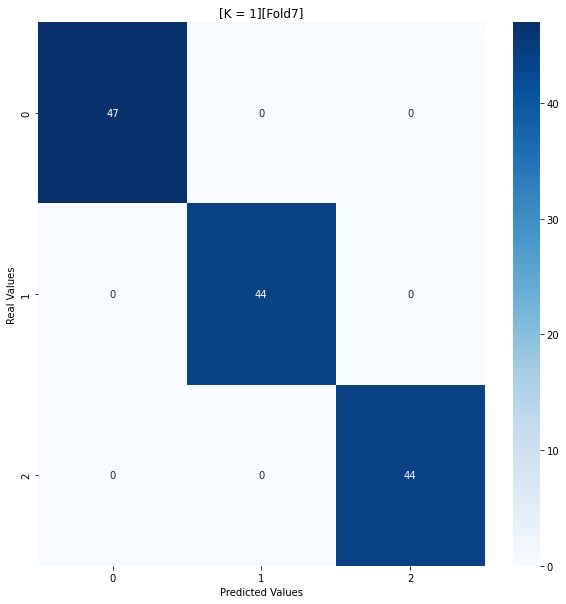

<Figure size 432x288 with 0 Axes>

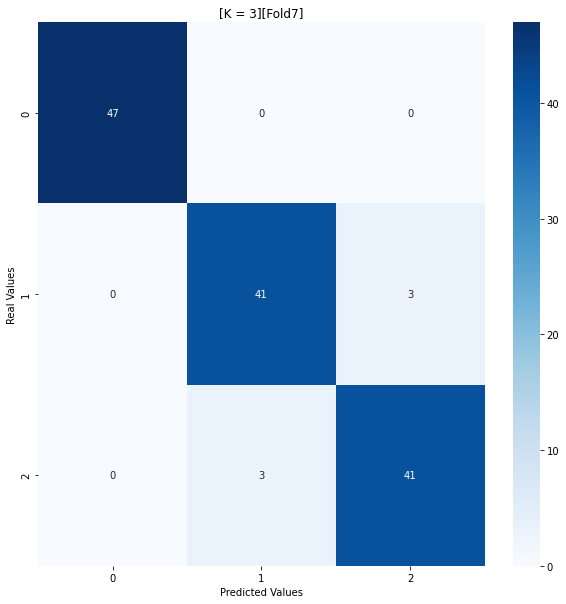

<Figure size 432x288 with 0 Axes>

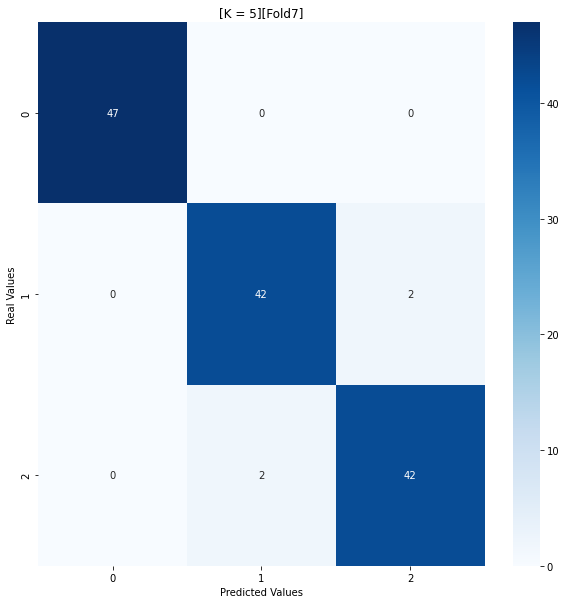

<Figure size 432x288 with 0 Axes>

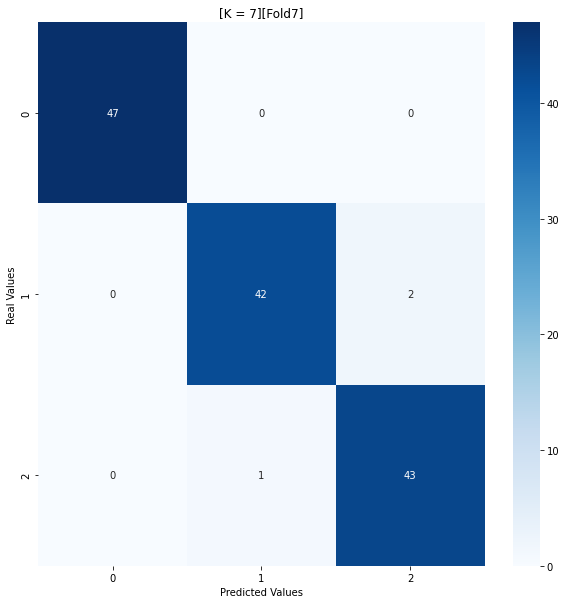

<Figure size 432x288 with 0 Axes>

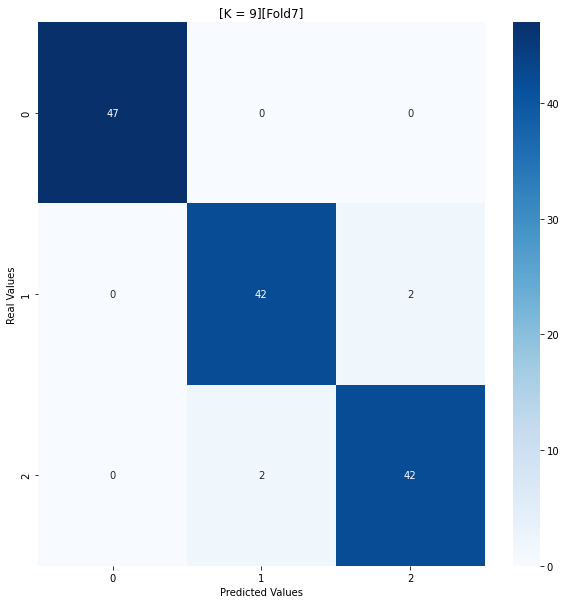

<Figure size 432x288 with 0 Axes>

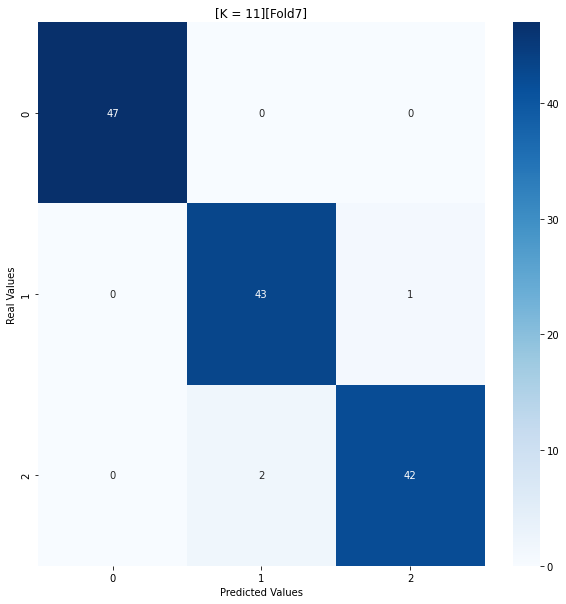

<Figure size 432x288 with 0 Axes>

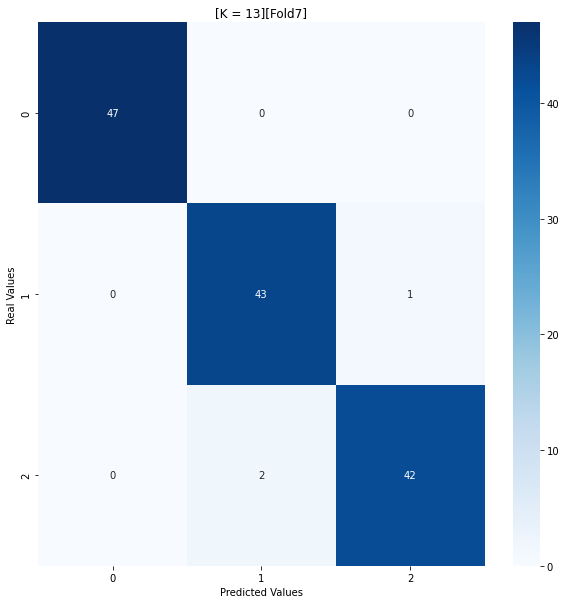

<Figure size 432x288 with 0 Axes>

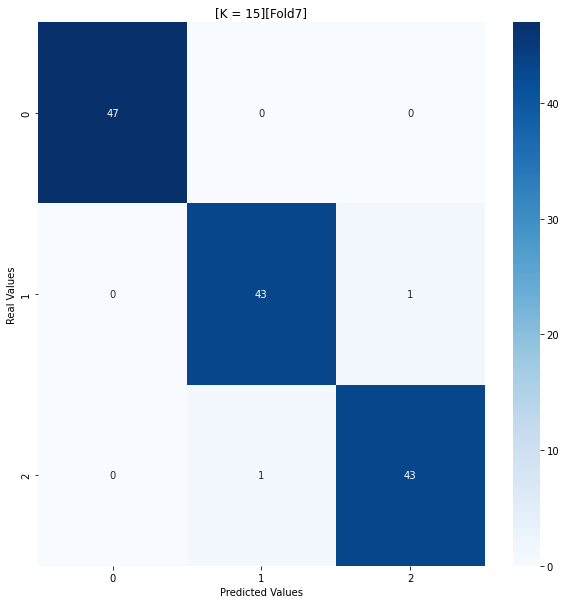

<Figure size 432x288 with 0 Axes>

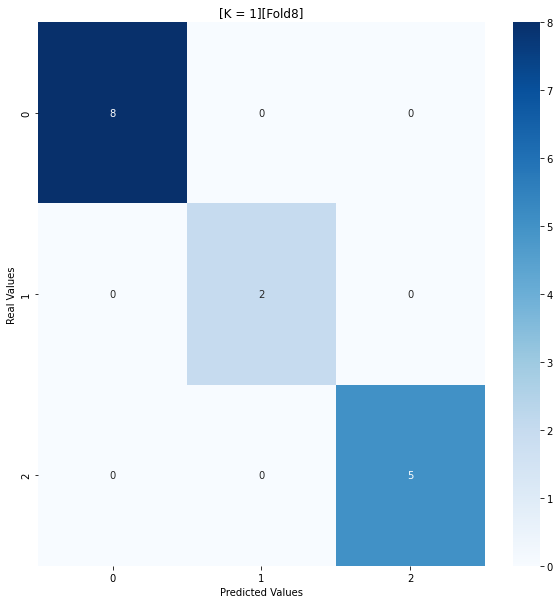

<Figure size 432x288 with 0 Axes>

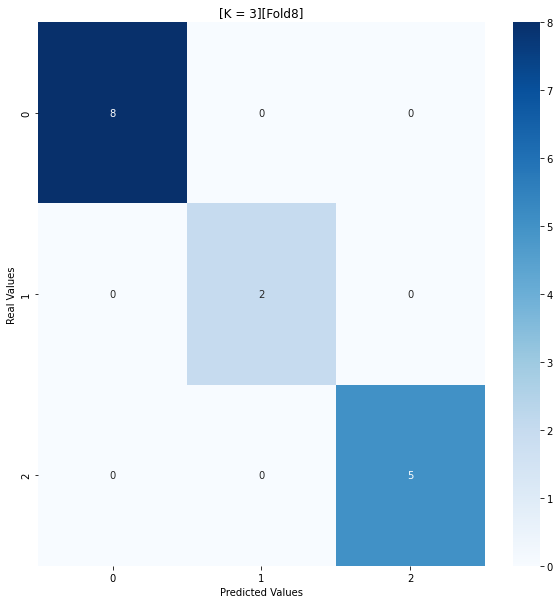

<Figure size 432x288 with 0 Axes>

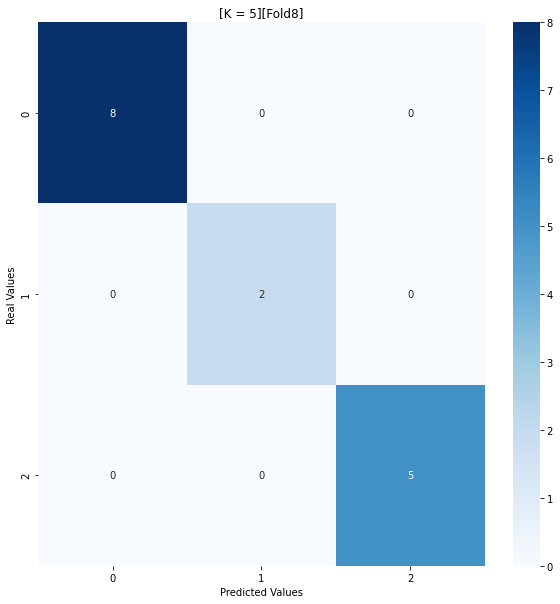

<Figure size 432x288 with 0 Axes>

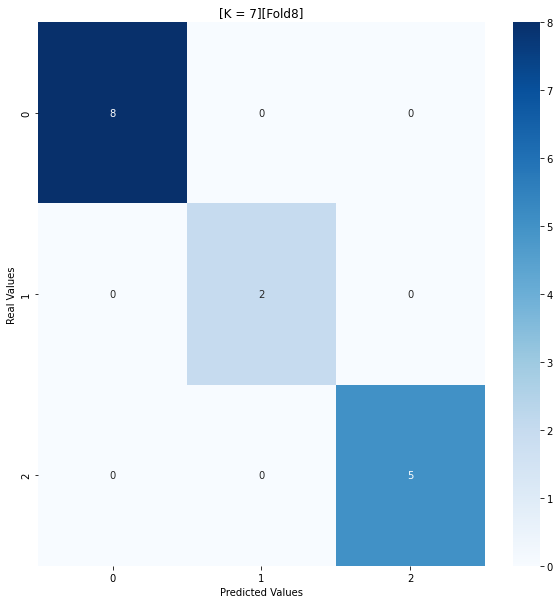

<Figure size 432x288 with 0 Axes>

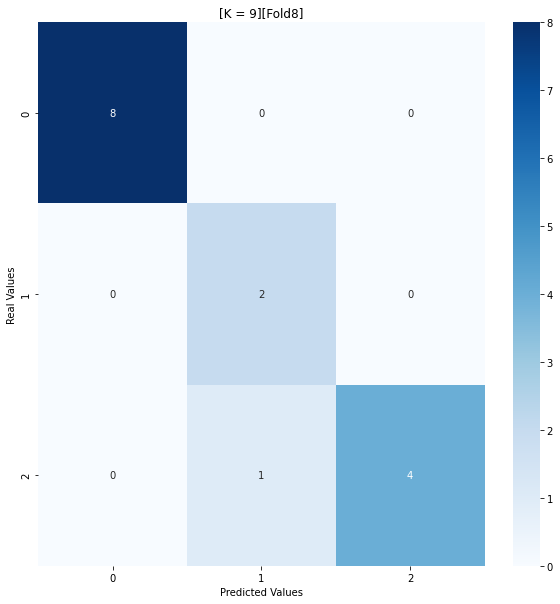

<Figure size 432x288 with 0 Axes>

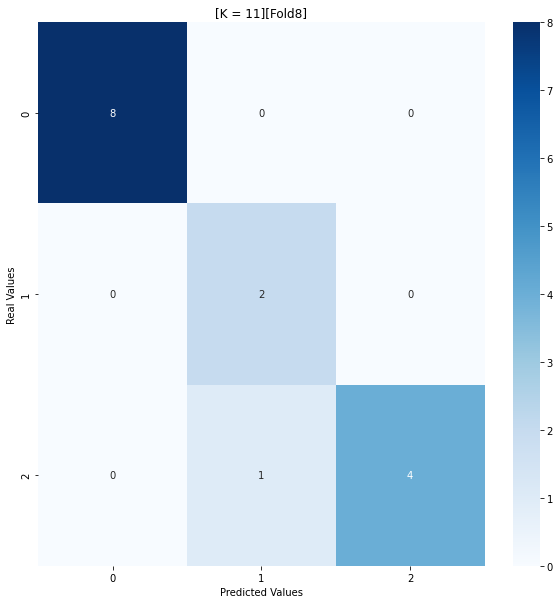

<Figure size 432x288 with 0 Axes>

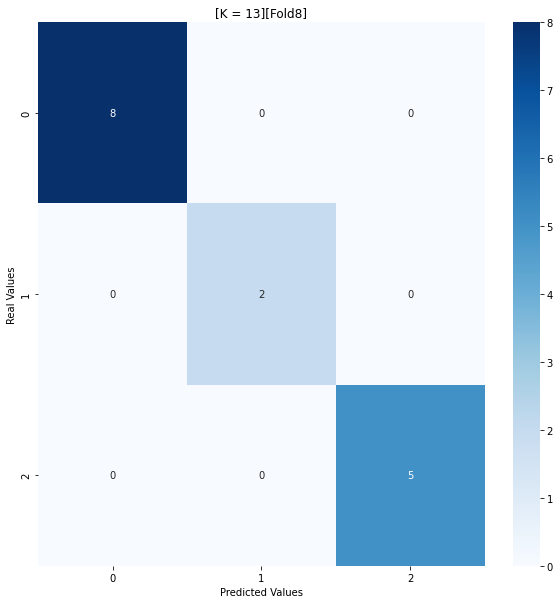

<Figure size 432x288 with 0 Axes>

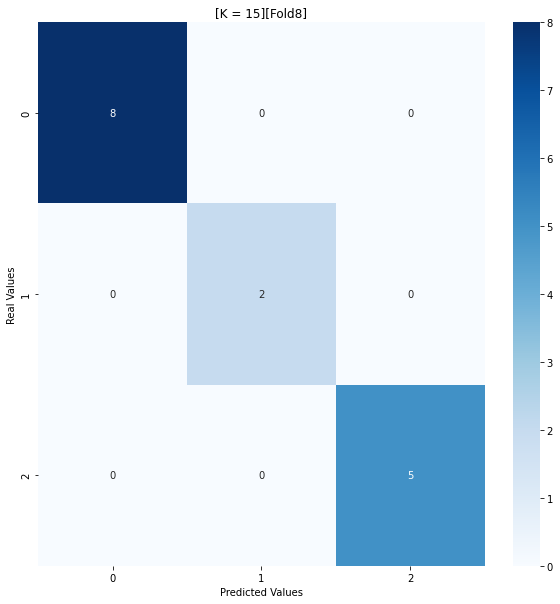

<Figure size 432x288 with 0 Axes>

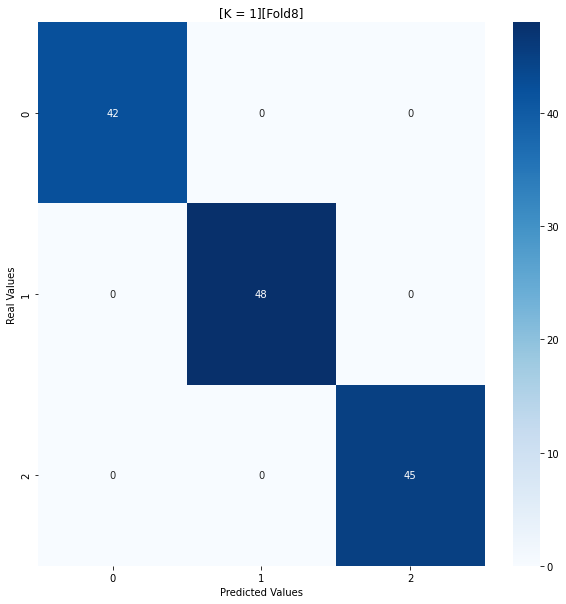

<Figure size 432x288 with 0 Axes>

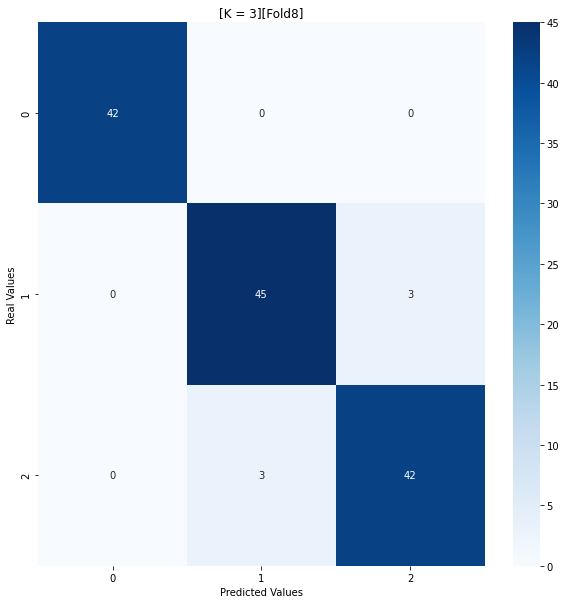

<Figure size 432x288 with 0 Axes>

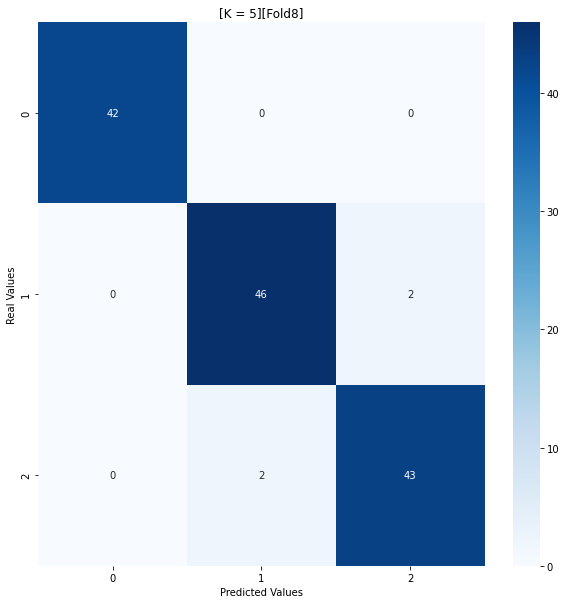

<Figure size 432x288 with 0 Axes>

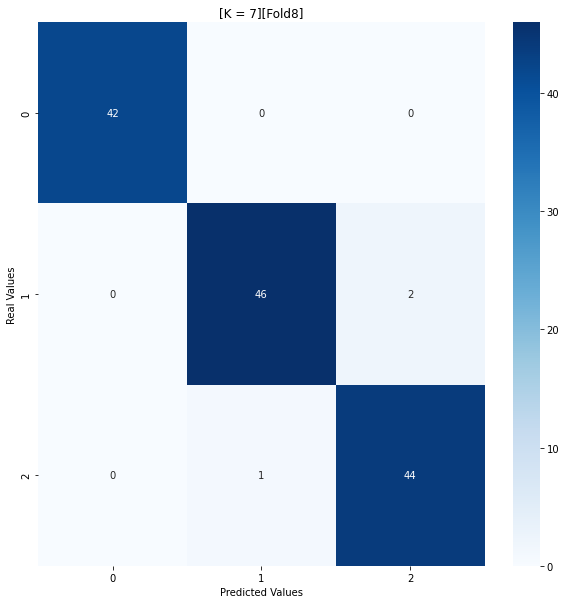

<Figure size 432x288 with 0 Axes>

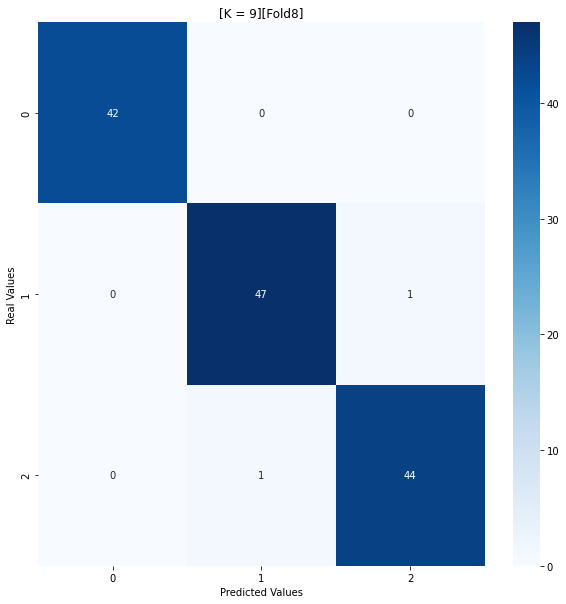

<Figure size 432x288 with 0 Axes>

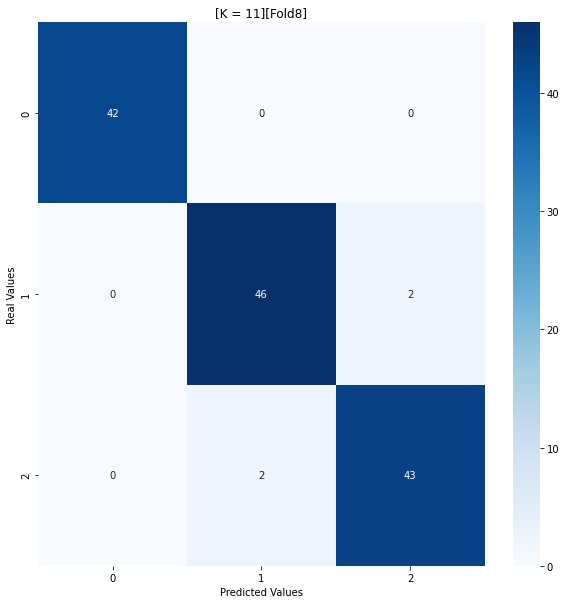

<Figure size 432x288 with 0 Axes>

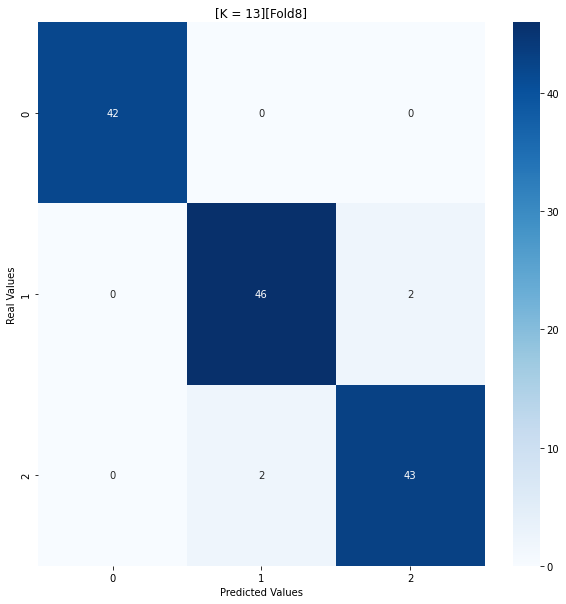

<Figure size 432x288 with 0 Axes>

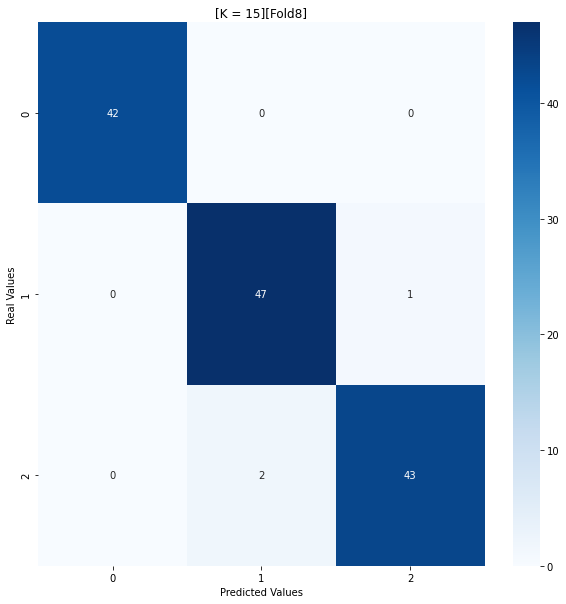

<Figure size 432x288 with 0 Axes>

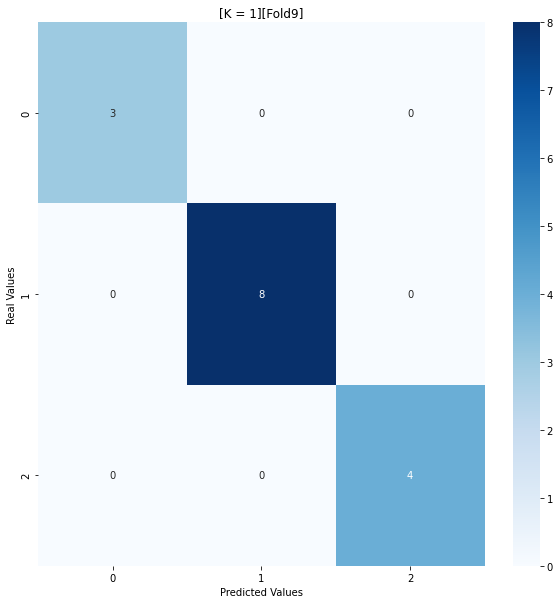

<Figure size 432x288 with 0 Axes>

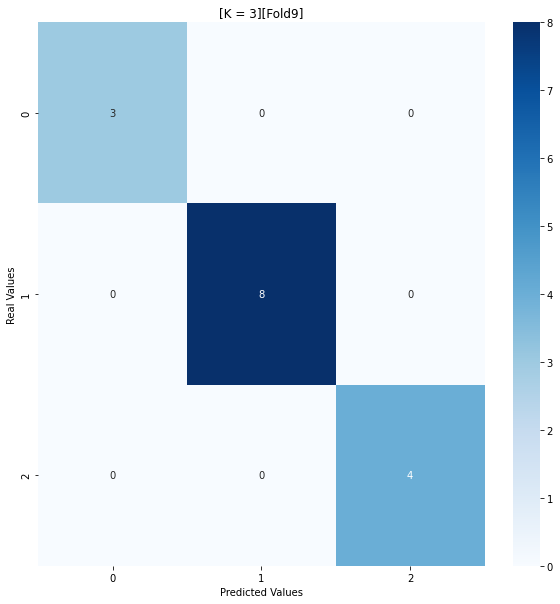

<Figure size 432x288 with 0 Axes>

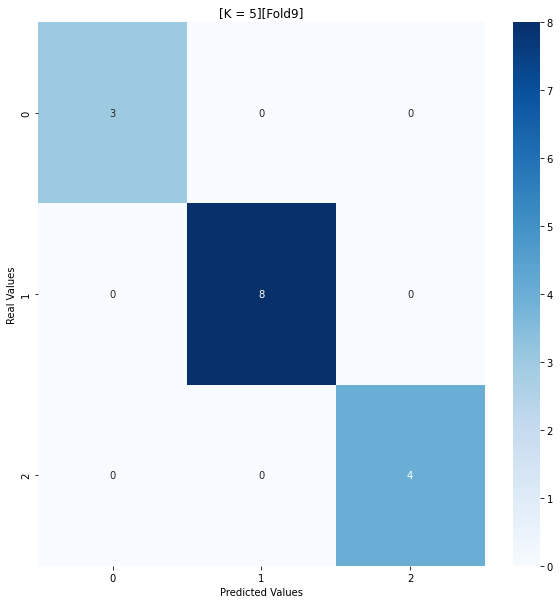

<Figure size 432x288 with 0 Axes>

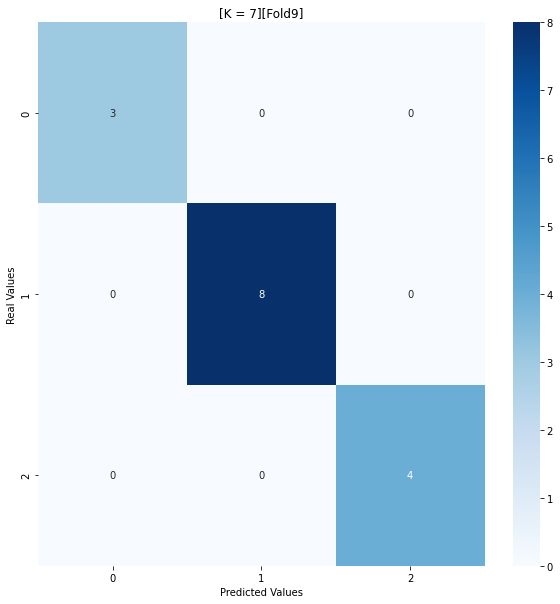

<Figure size 432x288 with 0 Axes>

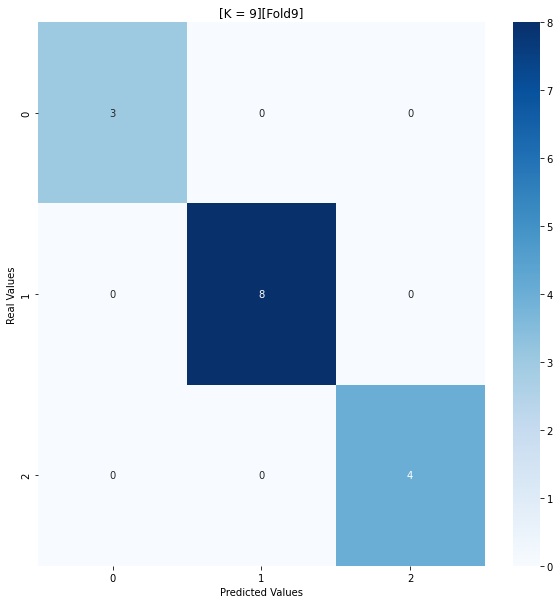

<Figure size 432x288 with 0 Axes>

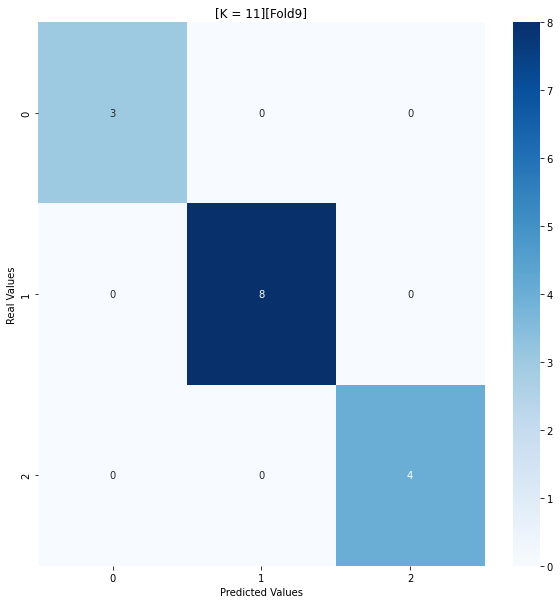

<Figure size 432x288 with 0 Axes>

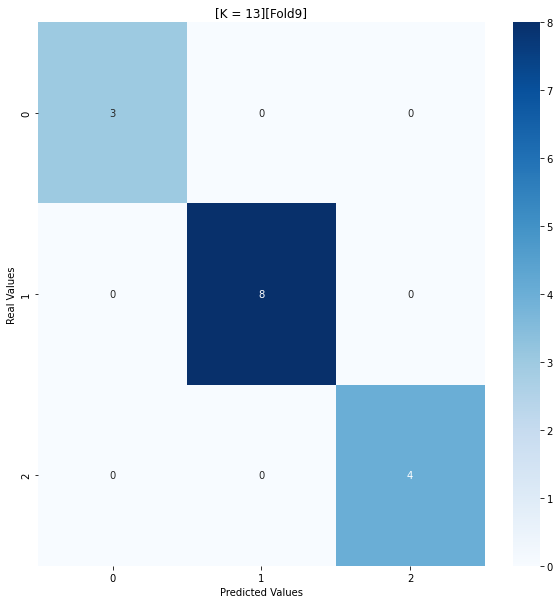

<Figure size 432x288 with 0 Axes>

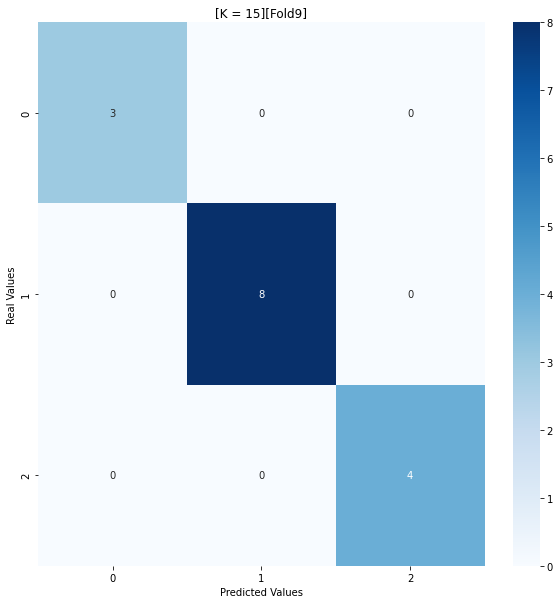

<Figure size 432x288 with 0 Axes>

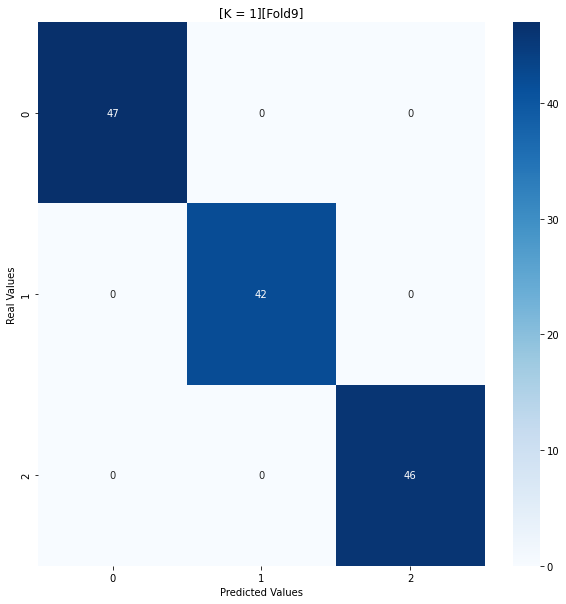

<Figure size 432x288 with 0 Axes>

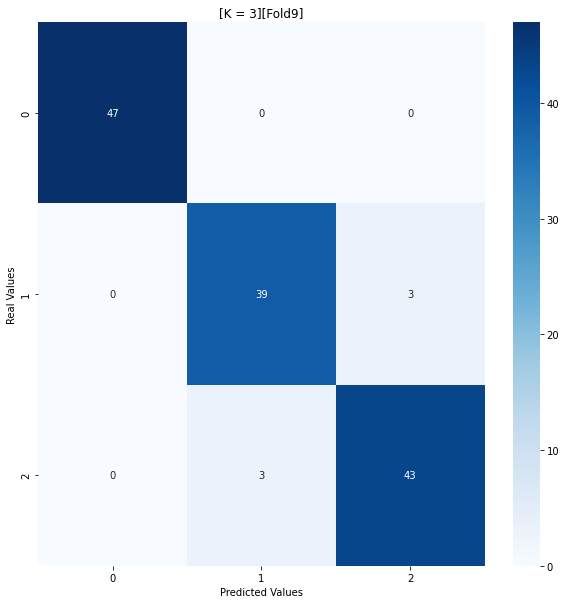

<Figure size 432x288 with 0 Axes>

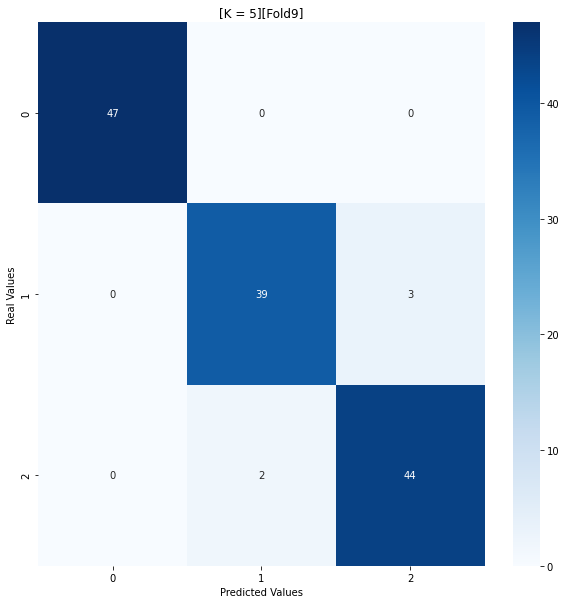

<Figure size 432x288 with 0 Axes>

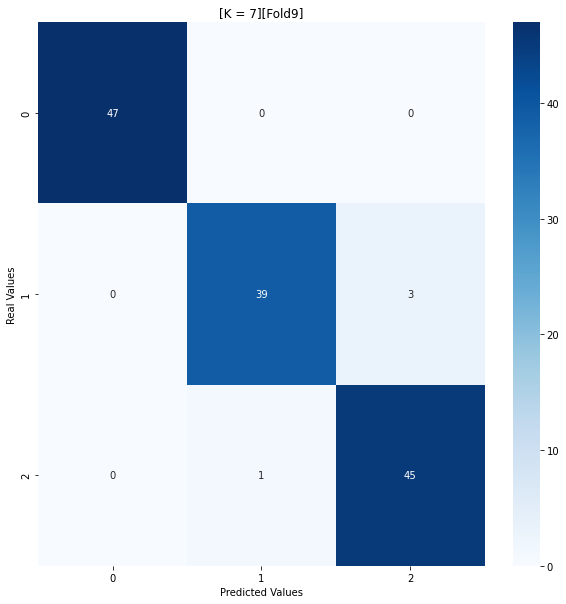

<Figure size 432x288 with 0 Axes>

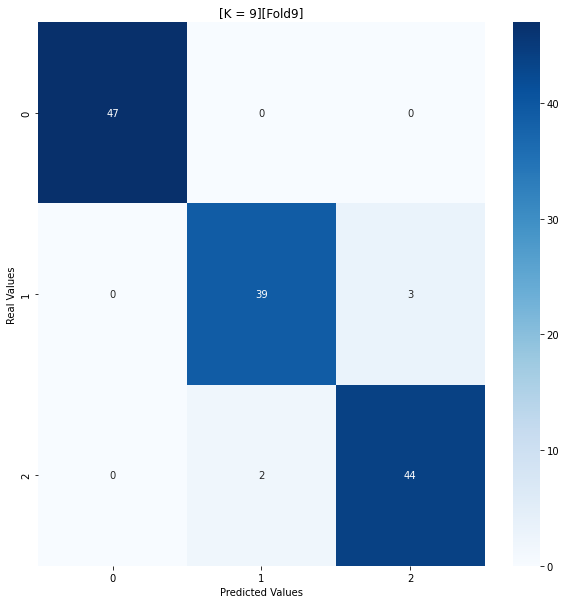

<Figure size 432x288 with 0 Axes>

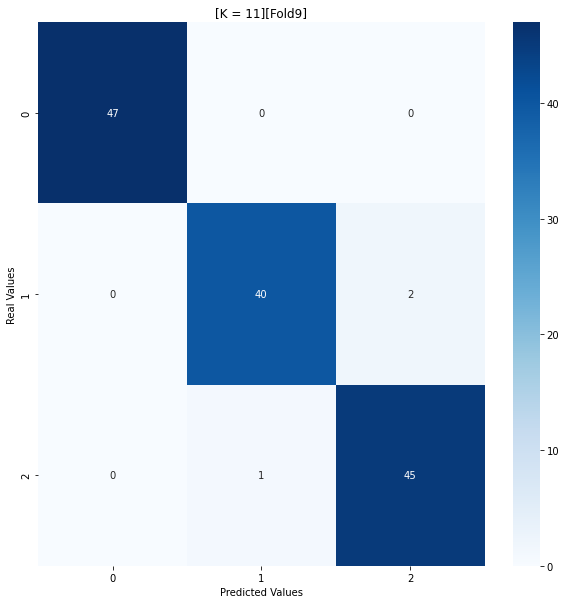

<Figure size 432x288 with 0 Axes>

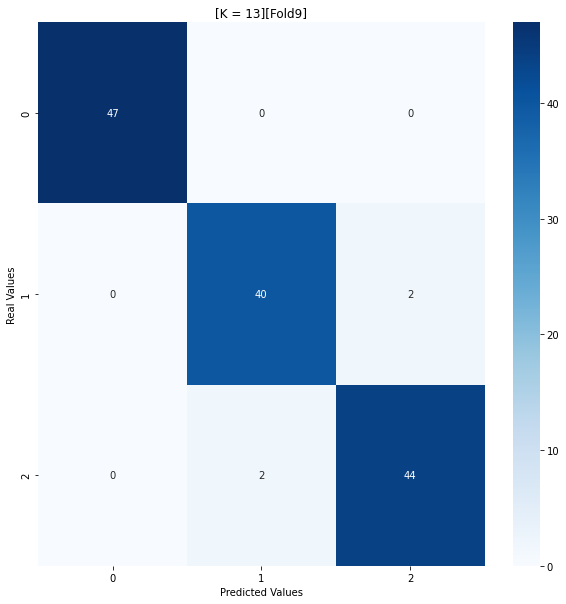

<Figure size 432x288 with 0 Axes>

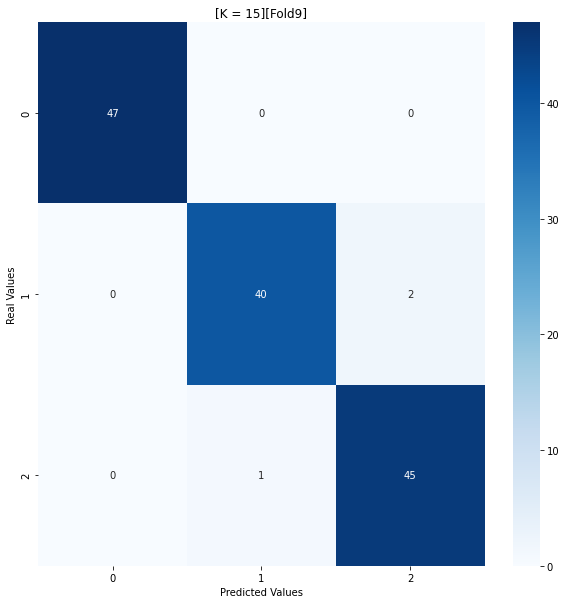

In [32]:
def CV_10_2(X,y):
    train = []
    test = []
    metricas_calc = {}
    metricas_train = {}
    train_folds,test_folds = K_Fold(X, y, 10)
    train.append(train_folds)
    test.append(test_folds)
    i = 0
    for i in range(len(train)):
        all_train = train[i]
        all_test = test[i]
        for j in range(len(all_test)):
            fold = "[Fold" + str(j) + "]"
            train = all_train[j]
            test = all_test[j]
            print(fold)
            if i == 0:
                df_teste,df_fold,fold_name = calc_supp(train[0],train[1],test[0],test[1],fold)
                metricas_calc = df_teste
                df_teste_train,df_fold,fold_name = calc_supp(train[0],train[1],train[0],train[1],fold)
                metricas_train = df_teste_train
                i = 1
            else:
                df_teste,df_fold,fold_name = calc_supp(train[0],train[1],test[0],test[1],fold)
                metricas_calc[fold_name] = df_fold
                df_teste_train,df_fold_train,fold_name = calc_supp(train[0],train[1],train[0],train[1],fold)
                metricas_train[fold_name] = df_fold_train

    display(metricas_calc)
    display(metricas_train)       
CV_10_2(X_i,y_i)

<h3> Analise ao underfitting e ao overfitting </h3>

<p> Antes de se fazer uma análise uma ao underfitting e ao overfitting é necessário compreender cada um deles, ambos têm um peso enorme no campo de machine learning</p>
<p> Estes por norma são determinados quando existe uma separação dos dados em treino e teste.
<p>Overfitting - Ocorre por norma quando os dados de treino tem um resultado muito bom mas quando se prossegue para a utilização dos dados de teste o seu resultado deixa muito a desejar, pois obtêm-se um mau resultado </p>
<p>Underfitting - Este é o inverso do overfitting, ocorre quando o desempenho do modelo não é o ideal logo nos dados de treino, ou seja não encontra uma boa relação entre os dados </p>

<p> No que toca a análise do trabalho, vemos que regra geral tanto para os algoritmos Train Only, TVT 40-30 e Cross Validation 10 obtemos resultados diferentes. </p>
<p> No TVT 40-30 - Vemos que o test obtem resultados inferiores ao treino, significando que obtem-se um caso de Overfit</p>
<p> No CV 10 - Concluimos que o test tem resultados superiores ao treino, obtendo um caso de underfit </p>


<h3> Analise ao Bias-Variance</h3>

<p> Para se fazer uma analise ao bias-variance é necessário compreender do que se trata.</p>
<p> Bias-variance - tem como objetivo determinar a melhor função que  função que melhor ajusta aos dados para obter previsões corretas</p>
<p> Desta forma o Recall define o bias </p>
<p> A precisão refere-se à variancia </p>
<p> E o f1 a função intermedia </p>
<p> Baixa Recall e baixa variancia = Modelo Ideal </p> 
<p> Baixa Recall e alta variancia. = Modelo sofre de overfit </p>
<p> Alto Recall e baixa variancia = Modelo sofre de underfit </p>

<p> Analisando o trabalho efetuado vemos que os valores estão bastante equilibrados </p>

<p> Exercicio 2.2 </p>

In [33]:
def reliefF(x, y):
    fs = ReliefF(n_neighbors=100, n_features_to_keep=4)
    fs.fit_transform(x, y)
    return fs.top_features[:10]

In [34]:
def ex2_2(X_i, y_i):
    # Initialize Variables
    f1s_train = []
    f1s_val = []
    all_train = []
    all_val = []
    columns_all = []
    rows_all = []
    f1_all_train = []
    features_to_include = []
    
    features = reliefF(X_i,y_i)
    print(features)
    features_to_include = []
    f1_score_val = []
    f1_score_test = []
    f1_score_train = []
    all_models = []
    mean_f1 = []
    labels_nr_features = [str(i) + " features" for i in range(1, len(features) + 1)]

    training, validation, testing = Train_Validation_Test(X_i, y_i, 0.3, 0.3)
    
    print(training[0])
    
    for feat in features:
        
        feature = str(feat) + " Features" 
        rows_all.append(feature)
        features_to_include.append(feat)
        X_train = training[0][:, features_to_include]
        X_validate = validation[0][:, features_to_include]
        X_test = testing[0][:, features_to_include]
        f1_val = []
        f1_test = []
        f1_train = []
        for k in range(1,16,2):
            k_value = "K =" + str(k)
            columns_all.append(k_value)
            
            model_train = knn(X_train,training[1], k)
            pred_train = model_train.predict(X_train)
            real_train = training[1]
            metr_train = metricas(real_train,pred_train)
            f1_train.append(metr_train["F1 Score"])
            
            model_val = knn(X_train,training[1], k)
            pred_val = model_val.predict(X_validate)
            real_val = validation[1]
            metr_val = metricas(real_val,pred_val)
            f1_val.append(metr_val["F1 Score"])
            
            model_test = knn(X_train,training[1], k)
            pred_test = model_test.predict(X_test)
            real_test = testing[1]
            metr_test = metricas(real_test,pred_test)
            
            f1_test.append(metr_test["F1 Score"])
            
        f1_score_val.append(f1_val)
        f1_score_test.append(f1_test)
        f1_score_train.append(f1_train)
    f1_final_train = np.array(f1_score_train)
    f1_final_train_v2 = f1_final_train.reshape(8,4)
    f1_final_test = np.array(f1_score_test)
    f1_final_test_v2 = f1_final_test.reshape(8,4)
    f1_final_v1 = np.array(f1_score_val)
    f1_final_v2 = f1_final_v1.reshape(8,4)
    columns_fim = columns_all[:8]
    results_val = pd.DataFrame(f1_final_v2, columns=labels_nr_features, index=columns_fim)
    results_test = pd.DataFrame(f1_final_test_v2, columns=labels_nr_features, index=columns_fim)
    results_train = pd.DataFrame(f1_final_train_v2, columns=labels_nr_features, index=columns_fim)
    print("--- Train Results ---")
    display(results_train)
    print("--- Validation Results ---")
    display(results_val)
    print("--- Test Results ---")
    display(results_test)
    return results_val,results_test,results_train

In [35]:
df_features_val,df_features_test,df_features_train = ex2_2(X_i,y_i)

[3 2 0 1]
[[5.8 2.7 5.1 1.9]
 [5.7 2.8 4.1 1.3]
 [5.2 3.4 1.4 0.2]
 [5.1 3.8 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.2 3.5 1.5 0.2]
 [5.8 4.  1.2 0.2]
 [5.6 2.8 4.9 2. ]
 [7.2 3.2 6.  1.8]
 [4.5 2.3 1.3 0.3]
 [5.5 3.5 1.3 0.2]
 [6.1 3.  4.9 1.8]
 [7.7 3.8 6.7 2.2]
 [5.1 3.3 1.7 0.5]
 [6.3 3.3 6.  2.5]
 [6.  2.2 5.  1.5]
 [5.  2.3 3.3 1. ]
 [5.9 3.2 4.8 1.8]
 [5.4 3.9 1.7 0.4]
 [7.  3.2 4.7 1.4]
 [6.4 2.9 4.3 1.3]
 [5.4 3.  4.5 1.5]
 [4.9 3.6 1.4 0.1]
 [5.7 2.5 5.  2. ]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.6 2.9 3.6 1.3]
 [6.  3.  4.8 1.8]
 [6.8 2.8 4.8 1.4]
 [7.4 2.8 6.1 1.9]
 [4.9 3.1 1.5 0.2]
 [6.3 3.4 5.6 2.4]
 [6.2 2.2 4.5 1.5]
 [5.6 2.7 4.2 1.3]
 [4.9 2.5 4.5 1.7]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 3.9 1.2]
 [6.5 3.  5.2 2. ]
 [4.9 3.1 1.5 0.1]
 [6.1 2.6 5.6 1.4]
 [5.9 3.  5.1 1.8]
 [5.  3.5 1.6 0.6]
 [6.1 3.  4.6 1.4]
 [5.1 3.7 1.5 0.4]
 [7.1 3.  5.9 2.1]
 [6.5 3.  5.5 1.8]
 [5.8 2.7 5.1 1.9]
 [5.1 3.4 1.5 0.2]
 [6.3 2.8 5.1 1.5]
 [6.3 2.3 4.4 1.3]
 [5.9 3.  4.2 1.5]
 [4.6 3.4 1.4 0.3]
 [

1 features  2 features  3 features  4 features
K =1     0.915538    0.933500    0.933500    0.933500
K =3     0.933500    0.933500    0.933500    0.933500
K =5     0.983365    0.966667    0.966667    0.966667
K =7     0.966667    0.966667    0.966667    0.966667
K =9     1.000000    0.966667    0.966667    0.966667
K =11    0.966667    0.966667    0.983280    0.966667
K =13    1.000000    0.966667    0.983280    0.983280
K =15    0.983280    0.949841    0.966667    0.949841

--- Validation Results ---


1 features  2 features  3 features  4 features
K =1     0.844444    0.934180    0.934180    0.934180
K =3     0.934180    0.934180    0.934180    0.934180
K =5     0.956030    0.977922    0.977922    0.977922
K =7     0.977922    0.977922    0.977922    0.977922
K =9     0.977922    0.977922    0.956030    0.956030
K =11    0.977922    0.977922    0.977922    0.977922
K =13    0.977922    0.977922    0.977922    0.977922
K =15    0.977922    0.977922    0.956030    0.956030

--- Test Results ---


1 features  2 features  3 features  4 features
K =1     0.907969    0.977670    0.977670    0.977670
K =3     0.977670    0.977670    0.977670    0.977670
K =5     0.910022    0.931843    0.931843    0.931843
K =7     0.931843    0.977670    0.977670    0.931843
K =9     0.977670    0.955011    0.955011    0.931843
K =11    0.977670    0.977670    0.977670    0.955011
K =13    0.955011    0.931843    0.955011    0.955011
K =15    0.955011    0.931843    0.931843    0.931843

<p> Train Results </p>

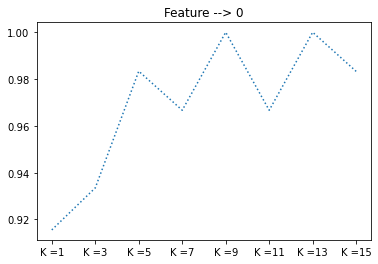

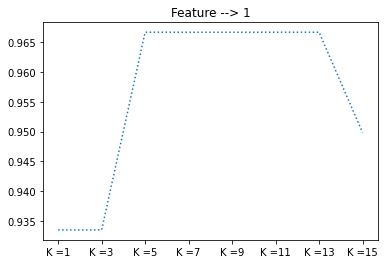

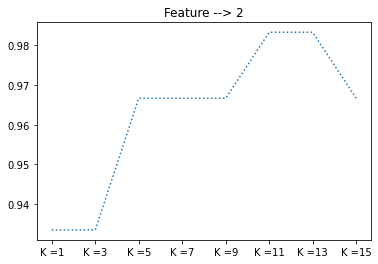

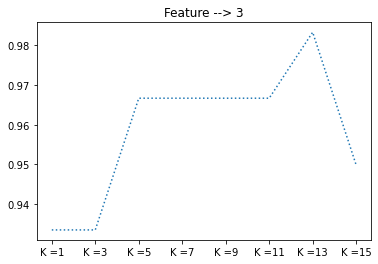

In [36]:
for i in range(len(df_features_train.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(df_features_train.iloc[:,i],linestyle = 'dotted')
    plt.show()

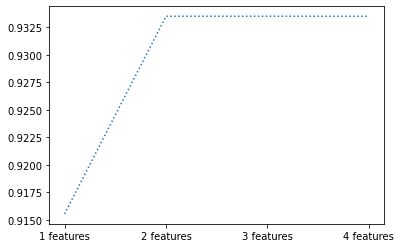

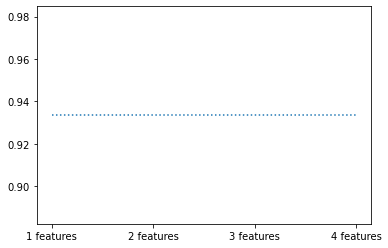

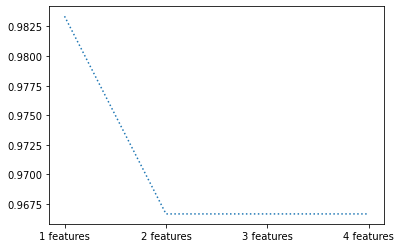

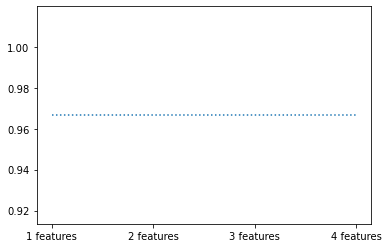

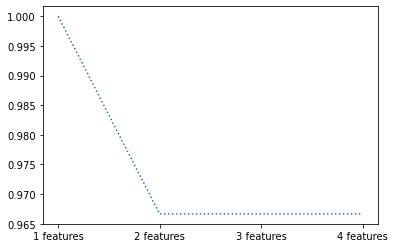

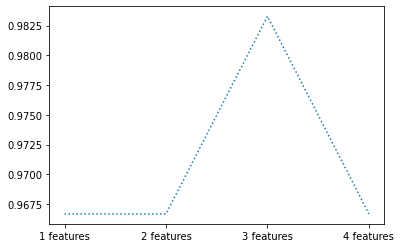

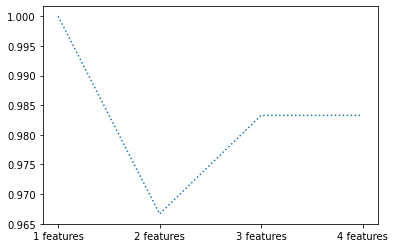

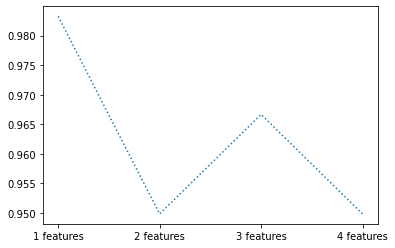

In [37]:
for i in range(len(df_features_train)):
    #plt.title("K --> " + str(i))
    plt.plot(df_features_train.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Validation Results </p>

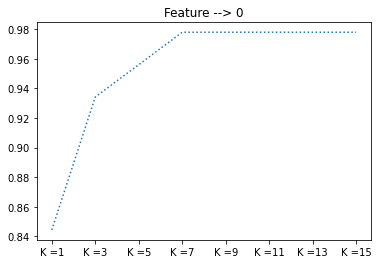

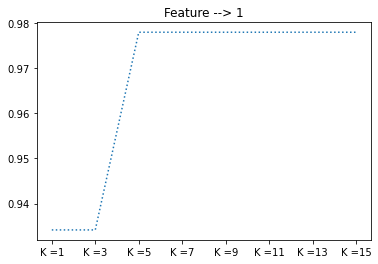

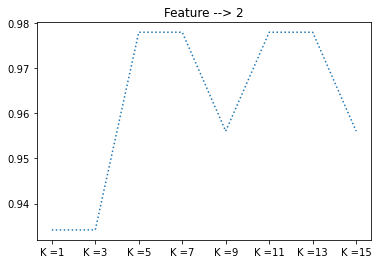

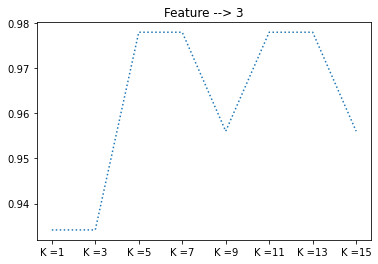

In [38]:
for i in range(len(df_features_val.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(df_features_val.iloc[:,i],linestyle = 'dotted')
    plt.show()

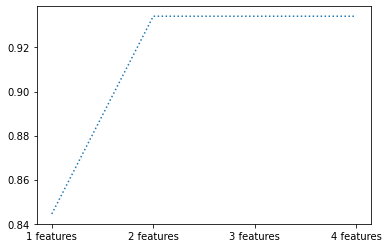

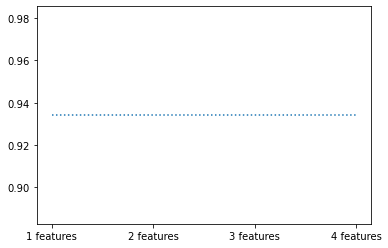

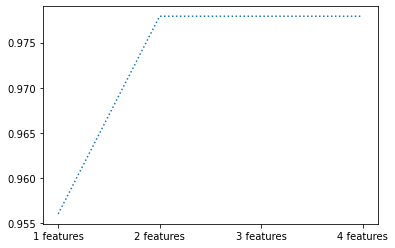

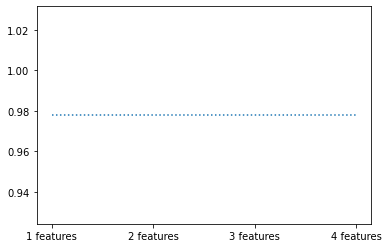

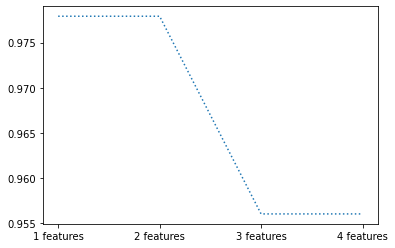

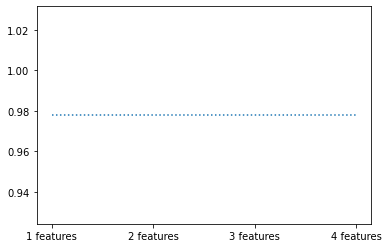

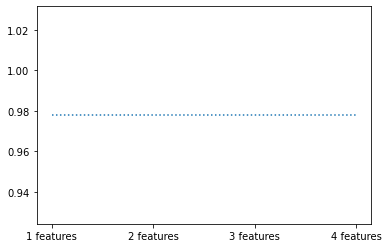

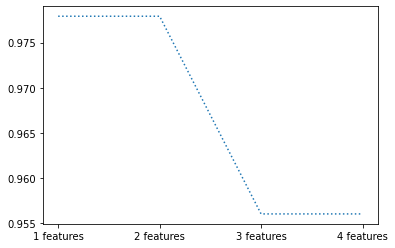

In [39]:
for i in range(len(df_features_val)):
    #plt.title("K --> " + str(i))
    plt.plot(df_features_val.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Test Results </p>

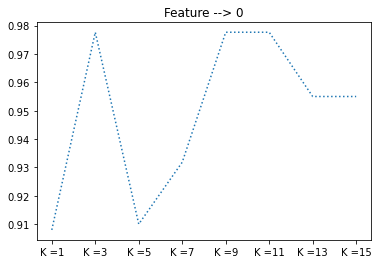

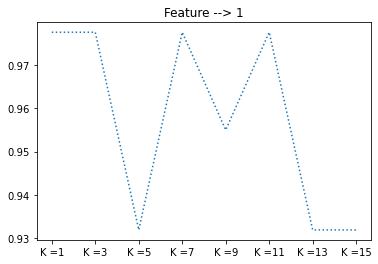

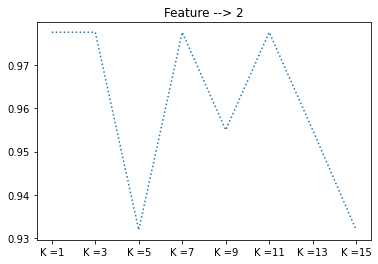

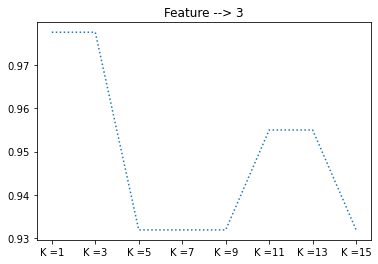

In [40]:
for i in range(len(df_features_test.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(df_features_test.iloc[:,i],linestyle = 'dotted')
    plt.show()

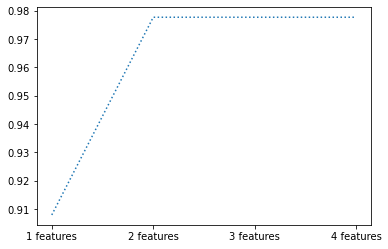

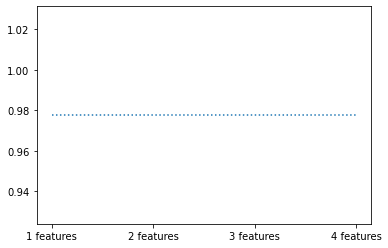

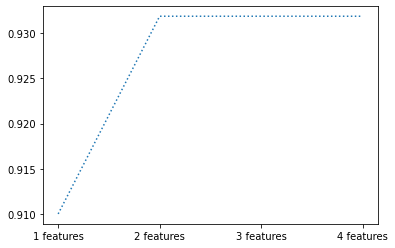

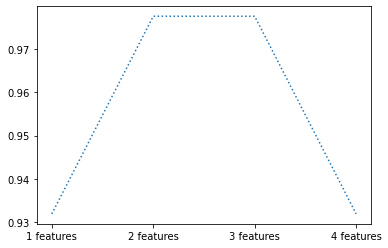

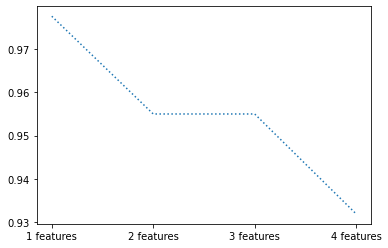

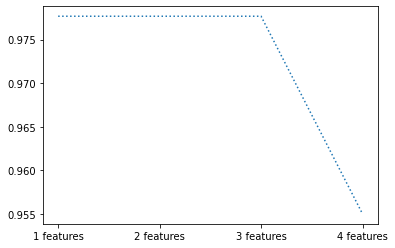

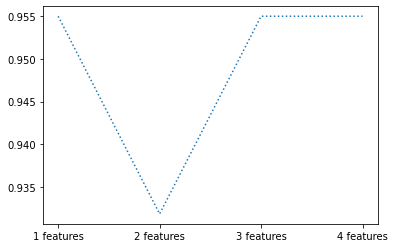

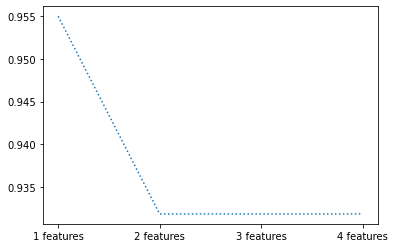

In [41]:
for i in range(len(df_features_test)):
    plt.plot(df_features_test.iloc[i],linestyle = 'dotted')
    plt.show()

<p> No que toca à identificação de que tipo de fit se trata, vemos que o set de treino tem melhores resultados sobre o test pelo que denotamos que se trata de overfit em todos os k.</p>
<p> Uma vez que estamos a falar de uma unica metrica de avaliação que é o f1 não se pode determinar o bias-variance pois falta mais dados para fazer uma melhor analise</p>

<p> Validação vs Teste </p>

In [42]:
training, validation, testing = Train_Validation_Test(X_i, y_i, 0.3, 0.3)

X_train = training[0][:, 3]
X_validate = validation[0][:, 3]
X_test = testing[0][:, 3]

X_train = X_train.reshape(-1,1)
X_validate = X_validate.reshape(-1,1)
X_test = X_test.reshape(-1,1)

kn = 9

Recall  Precision  F1 Score
Train  0.933333   0.936636  0.933333

Recall  Precision  F1 Score
Validation  0.977778   0.979167  0.977865

Recall  Precision  F1 Score
Test  0.977778   0.979487  0.977864

<Figure size 432x288 with 0 Axes>

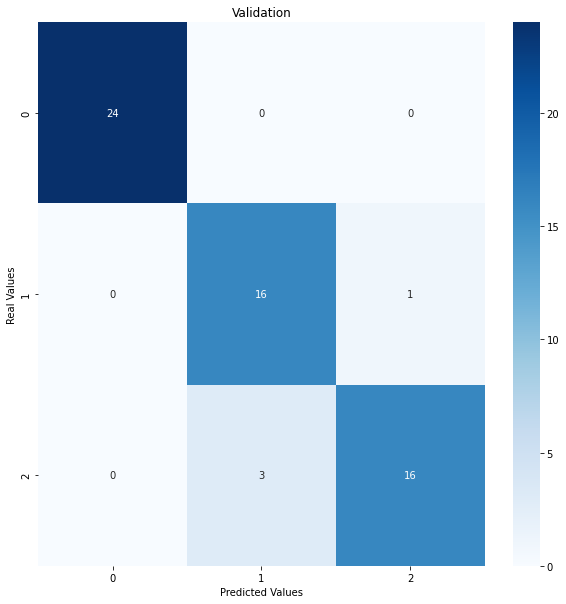

<Figure size 432x288 with 0 Axes>

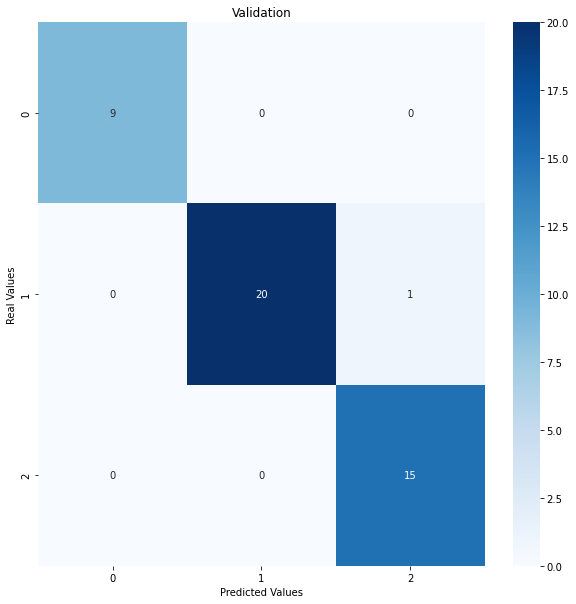

<Figure size 432x288 with 0 Axes>

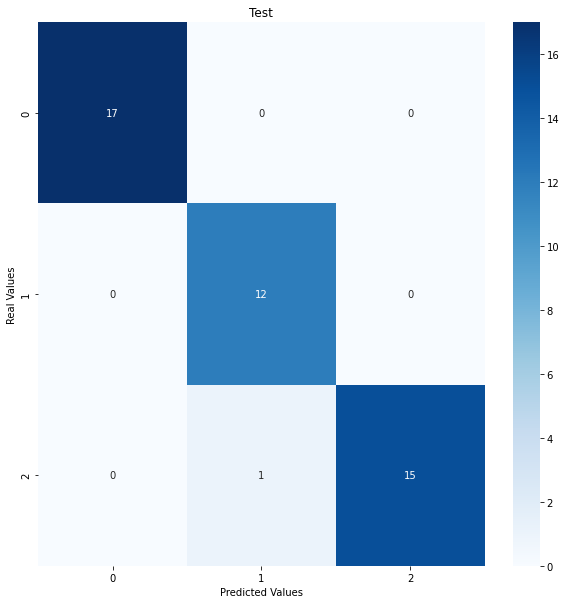

In [43]:
metricas_geral_train = {}
metricas_recall_train =[]
metricas_pre_train = []
metricas_f1_train = []

metricas_geral_val = {}
metricas_recall_val =[]
metricas_pre_val = []
metricas_f1_val = []

metricas_geral_test = {}
metricas_recall_test =[]
metricas_pre_test = []
metricas_f1_test = []

model_train = knn(X_train,training[1], kn)
pred_train = model_train.predict(X_train)
real_train = training[1]
metr_train = metricas(real_train,pred_train)

metricas_recall_train.append(metr_train["Recall"])
metricas_pre_train.append(metr_train["Precision"])
metricas_f1_train.append(metr_train["F1 Score"])
vis_cf(metr_train["Confusion Matrix"],"Validation")

model_val = knn(X_train,training[1], kn)
pred_val = model_val.predict(X_validate)
real_val = validation[1]
metr_val = metricas(real_val,pred_val)

metricas_recall_val.append(metr_val["Recall"])
metricas_pre_val.append(metr_val["Precision"])
metricas_f1_val.append(metr_val["F1 Score"])
vis_cf(metr_val["Confusion Matrix"],"Validation")
            
model_test = knn(X_train,training[1], kn)
pred_test = model_test.predict(X_test)
real_test = testing[1]
metr_test = metricas(real_test,pred_test)

metricas_recall_test.append(metr_test["Recall"])
metricas_pre_test.append(metr_test["Precision"])
metricas_f1_test.append(metr_test["F1 Score"])
vis_cf(metr_test["Confusion Matrix"],"Test")


metricas_geral_train["Recall"]=metricas_recall_train
metricas_geral_train["Precision"]=metricas_pre_train
metricas_geral_train["F1 Score"]=metricas_f1_train
metricas_end_train= pd.DataFrame(metricas_geral_train)
metricas_end_train = metricas_end_train.rename(index={0: 'Train'})
display(metricas_end_train)

metricas_geral_val["Recall"]=metricas_recall_val
metricas_geral_val["Precision"]=metricas_pre_val
metricas_geral_val["F1 Score"]=metricas_f1_val
metricas_end_val= pd.DataFrame(metricas_geral_val)
metricas_end_val = metricas_end_val.rename(index={0: 'Validation'})
display(metricas_end_val)
        
metricas_geral_test["Recall"]=metricas_recall_test
metricas_geral_test["Precision"]=metricas_pre_test
metricas_geral_test["F1 Score"]=metricas_f1_test
metricas_end_test= pd.DataFrame(metricas_geral_test)
metricas_end_test = metricas_end_test.rename(index={0: 'Test'})
display(metricas_end_test)

<p> Ao analisar o trabalho feito vemos que o test tem resultados inferiores ao set de treino o que significa estamos sobre o efeito de overfit, no entanto os valores são superiores a 0.9 o que representa que o modelo está a obter no geral bons resultados </p>

<p> Relativamente a bias como é baixo denota-se um bom resultado </p>


<p> 2.3 - Foward Feature Selection </p>
<p> https://gist.github.com/vishu160196/a679dac5c4d218bcc1f09f8907d55c7b </p>

In [44]:
def ex2_3(X_i, y_i,features_selected):
    # Initialize Variables
    f1s_train = []
    f1s_val = []
    all_train = []
    all_val = []
    columns_all = []
    rows_all = []
    f1_all_train = []
    features_to_include = []
    
    f1_score_val = []
    f1_score_test = []
    f1_score_train = []
    all_models = []
    mean_f1 = []
    labels_nr_features = [str(i) + " features" for i in range(1, len(features_selected) + 1)]

    training, validation, testing = Train_Validation_Test(X_i, y_i, 0.3, 0.3)
    print(training[0])
    for feat in features_selected:
        feature = str(feat) + " Features" 
        rows_all.append(feature)
        features_to_include.append(feat)
        X_train = training[0][:, features_to_include]
        X_validate = validation[0][:, features_to_include]
        X_test = testing[0][:, features_to_include]
        f1_val = []
        f1_test = []
        f1_train = []
        for k in range(1,16,2):
            k_value = "K =" + str(k)
            columns_all.append(k_value)
            
            model_train = knn(X_train,training[1], k)
            pred_train = model_train.predict(X_train)
            real_train = training[1]
            metr_train = metricas(real_train,pred_train)
            f1_train.append(metr_train["F1 Score"])
            
            model_val = knn(X_train,training[1], k)
            pred_val = model_val.predict(X_validate)
            real_val = validation[1]
            metr_val = metricas(real_val,pred_val)
            f1_val.append(metr_val["F1 Score"])
            
            model_test = knn(X_train,training[1], k)
            pred_test = model_test.predict(X_test)
            real_test = testing[1]
            metr_test = metricas(real_test,pred_test)
            
            f1_test.append(metr_test["F1 Score"])
            
        f1_score_val.append(f1_val)
        f1_score_test.append(f1_test)
        f1_score_train.append(f1_train)
    f1_final_train = np.array(f1_score_train)
    f1_final_train_v2 = f1_final_train.reshape(8,4)
    f1_final_test = np.array(f1_score_test)
    f1_final_test_v2 = f1_final_test.reshape(8,4)
    f1_final_v1 = np.array(f1_score_val)
    f1_final_v2 = f1_final_v1.reshape(8,4)
    columns_fim = columns_all[:8]
    results_val = pd.DataFrame(f1_final_v2, columns=labels_nr_features, index=columns_fim)
    results_test = pd.DataFrame(f1_final_test_v2, columns=labels_nr_features, index=columns_fim)
    results_train = pd.DataFrame(f1_final_train_v2, columns=labels_nr_features, index=columns_fim)
    print("--- Train Results ---")
    display(results_train)
    print("--- Validation Results ---")
    display(results_val)
    print("--- Test Results ---")
    display(results_test)
    return results_val,results_test,results_train

In [45]:
def evaluate_metric(model, x_cv, y_cv):
    return f1_score(y_cv, model.predict(x_cv), average='micro')

In [46]:
def forward_feature_selection(x_train, x_cv, y_train, y_cv, n):
    feature_set = []
    for num_features in range(n):
        metric_list = [] # Choose appropriate metric based on business problem
        model = SGDClassifier() # You can choose any model you like, this technique is model agnostic
        for feature in x_train.columns:
            if feature not in feature_set:
                f_set = feature_set.copy()
                f_set.append(feature)
                model.fit(x_train[f_set], y_train)
                
                metric_list.append((evaluate_metric(model, x_cv[f_set], y_cv), feature))

        metric_list.sort(key=lambda x : x[0], reverse = True) # In case metric follows "the more, the merrier"
        feature_set.append(metric_list[0][1])
    return feature_set



feature_names = iris.feature_names
X_data = pd.DataFrame(iris.data, columns=feature_names)

x_train, x_cv, y_train, y_cv=train_test_split(X_data, y_i, test_size=0.2, stratify=y_i)

f=forward_feature_selection(x_train, x_cv, y_train, y_cv, 4)

features_selected = list(map(lambda x: feature_names.index(x), f))

results_val,results_test,results_train = ex2_3(X_i,y_i,features_selected)

[[4.5 2.3 1.3 0.3]
 [6.  2.2 4.  1. ]
 [5.  3.2 1.2 0.2]
 [4.3 3.  1.1 0.1]
 [5.7 2.6 3.5 1. ]
 [6.3 2.8 5.1 1.5]
 [6.1 2.8 4.7 1.2]
 [5.2 2.7 3.9 1.4]
 [6.3 3.3 4.7 1.6]
 [4.9 3.1 1.5 0.1]
 [4.9 2.5 4.5 1.7]
 [6.4 2.7 5.3 1.9]
 [6.3 3.3 6.  2.5]
 [7.  3.2 4.7 1.4]
 [6.8 3.  5.5 2.1]
 [5.2 4.1 1.5 0.1]
 [6.5 2.8 4.6 1.5]
 [5.  3.4 1.6 0.4]
 [6.7 3.  5.2 2.3]
 [7.4 2.8 6.1 1.9]
 [5.5 2.6 4.4 1.2]
 [5.  3.  1.6 0.2]
 [5.2 3.4 1.4 0.2]
 [7.7 3.  6.1 2.3]
 [6.4 3.2 4.5 1.5]
 [7.7 3.8 6.7 2.2]
 [5.6 2.7 4.2 1.3]
 [4.9 3.  1.4 0.2]
 [4.9 2.4 3.3 1. ]
 [5.6 2.9 3.6 1.3]
 [7.9 3.8 6.4 2. ]
 [6.7 3.3 5.7 2.1]
 [5.1 3.8 1.6 0.2]
 [5.6 2.5 3.9 1.1]
 [7.1 3.  5.9 2.1]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.4 3.2 1.3 0.2]
 [5.1 3.3 1.7 0.5]
 [6.3 2.5 4.9 1.5]
 [6.7 3.  5.  1.7]
 [6.6 3.  4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [7.7 2.8 6.7 2. ]
 [6.1 2.6 5.6 1.4]
 [5.5 2.4 3.8 1.1]
 [6.7 3.1 5.6 2.4]
 [6.  2.7 5.1 1.6]
 [4.8 3.1 1.6 0.2]
 [5.4 3.9 1.3 0.4]
 [5.9 3.2 4.8 1.8]
 [6.5 3.  5.

1 features  2 features  3 features  4 features
K =1     0.933405    0.949891    0.949891    0.949891
K =3     0.933333    0.949891    0.932296    0.949891
K =5     0.983297    0.949504    0.949504    0.949504
K =7     0.949504    0.949504    0.949504    0.949504
K =9     1.000000    0.932968    0.949504    0.916485
K =11    0.916485    0.932968    0.949504    0.932968
K =13    1.000000    0.932968    0.916485    0.916485
K =15    0.932968    0.932968    0.932968    0.949504

--- Validation Results ---


1 features  2 features  3 features  4 features
K =1     0.822222    0.865098    0.865098    0.865098
K =3     0.911111    0.865098    0.816578    0.865098
K =5     0.911111    0.888346    0.933529    0.933529
K =7     0.933529    0.977843    0.933529    0.933529
K =9     0.955730    0.888346    0.955730    0.955730
K =11    0.955730    0.955730    0.933529    0.933529
K =13    0.955730    0.865098    0.911111    0.955730
K =15    0.955730    0.911111    0.865098    0.888346

--- Test Results ---


1 features  2 features  3 features  4 features
K =1     0.910826    0.977706    0.977706    0.977706
K =3     1.000000    0.977706    0.908148    0.977706
K =5     1.000000    0.977706    0.977706    0.977706
K =7     0.977706    0.977706    0.977706    0.977706
K =9     0.955556    0.977706    1.000000    1.000000
K =11    0.977706    0.977706    0.977706    0.977706
K =13    0.932020    0.932020    0.977706    1.000000
K =15    0.977706    0.977706    0.977706    0.932020

<p> Train Results </p>

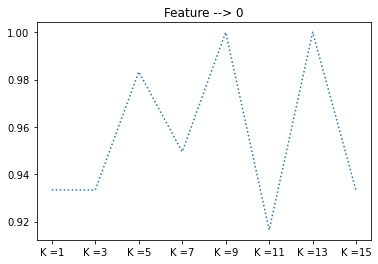

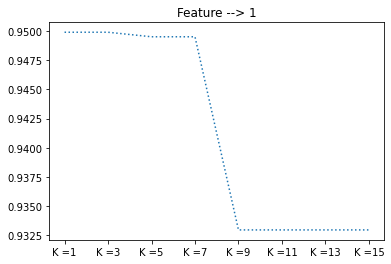

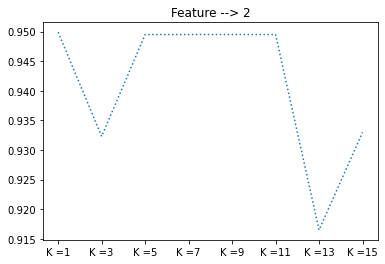

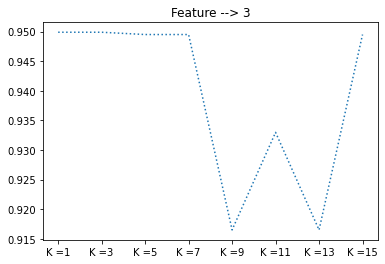

In [47]:
for i in range(len(results_train.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(results_train.iloc[:,i],linestyle = 'dotted')
    plt.show()

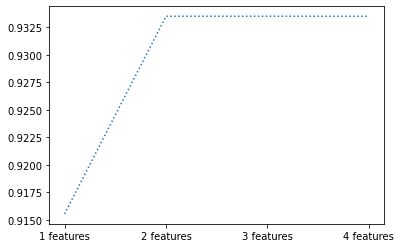

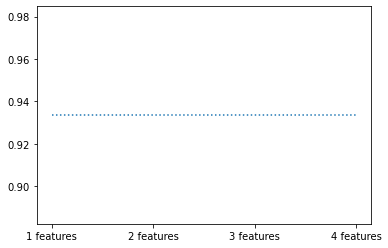

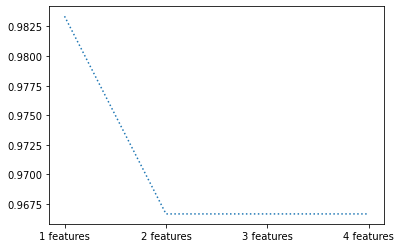

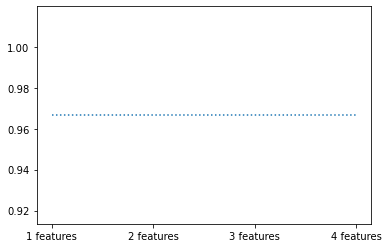

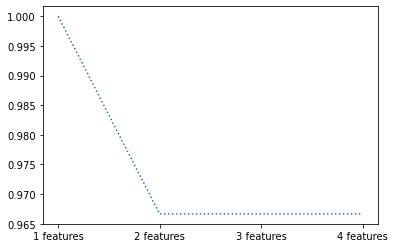

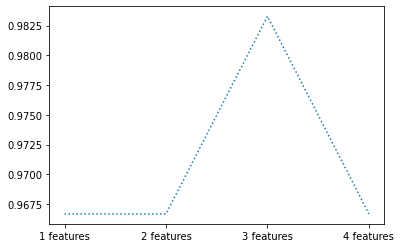

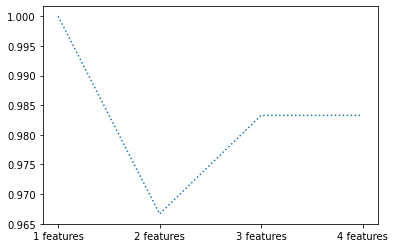

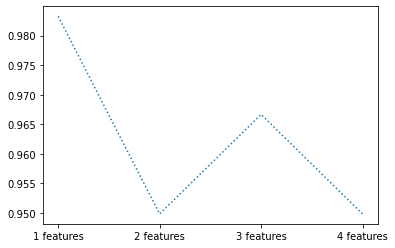

In [48]:
for i in range(len(df_features_train)):
    #plt.title("K --> " + str(i))
    plt.plot(df_features_train.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Validation results </p>

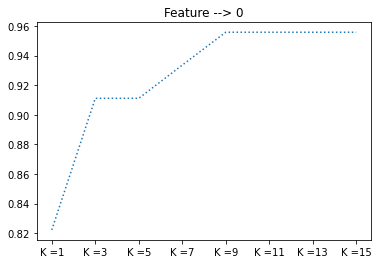

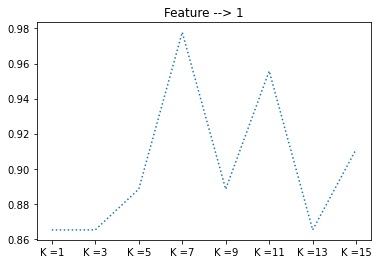

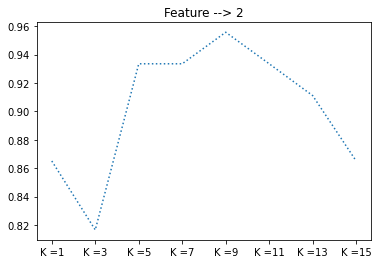

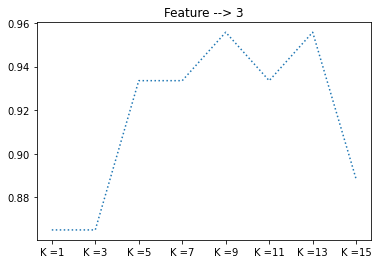

In [49]:
for i in range(len(results_val.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(results_val.iloc[:,i],linestyle = 'dotted')
    plt.show()

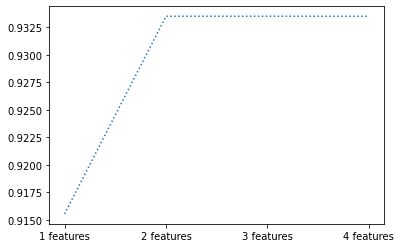

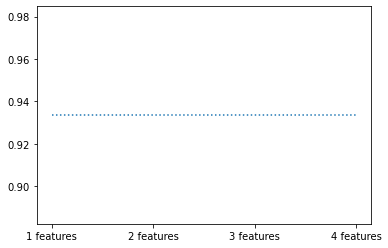

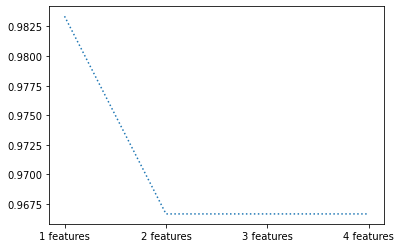

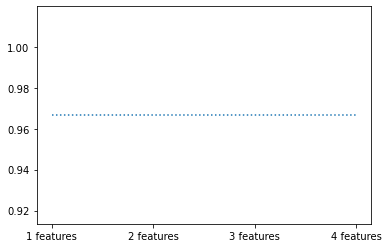

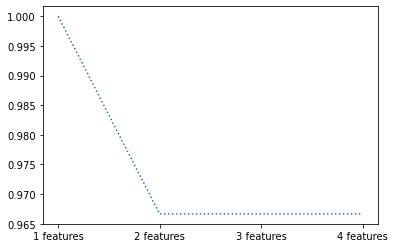

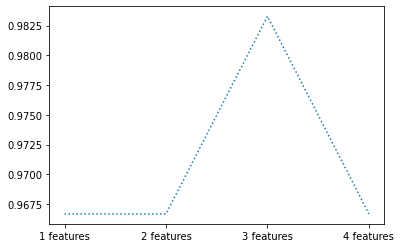

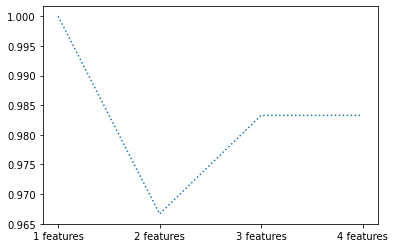

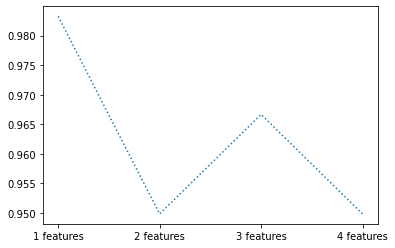

In [50]:
for i in range(len(df_features_train)):
    #plt.title("K --> " + str(i))
    plt.plot(df_features_train.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Test results </p>

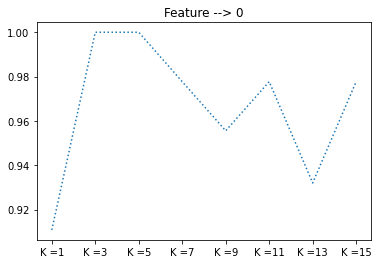

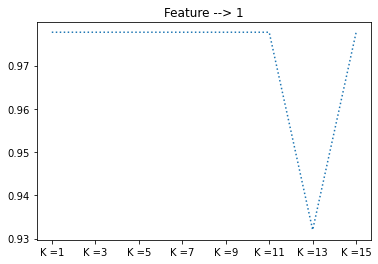

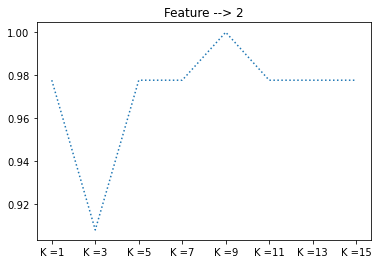

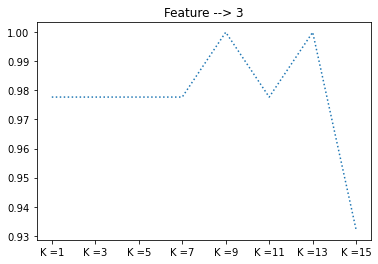

In [51]:
for i in range(len(results_test.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(results_test.iloc[:,i],linestyle = 'dotted')
    plt.show()

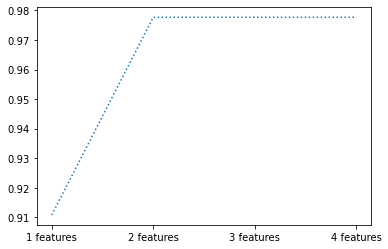

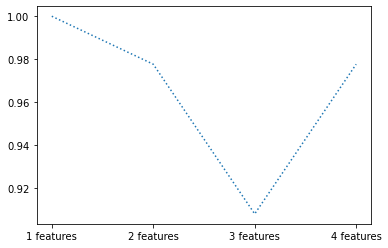

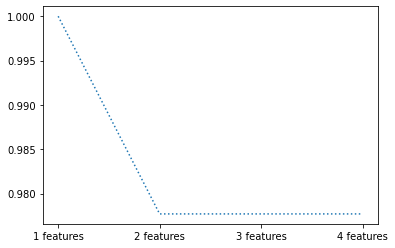

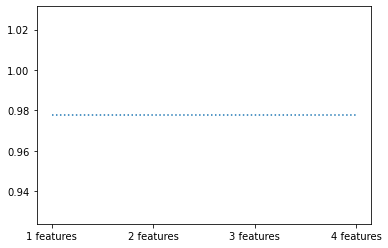

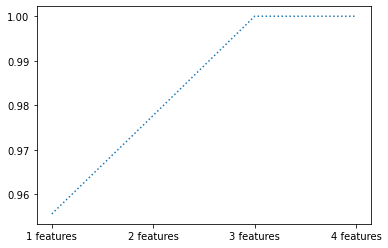

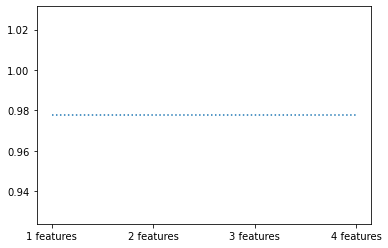

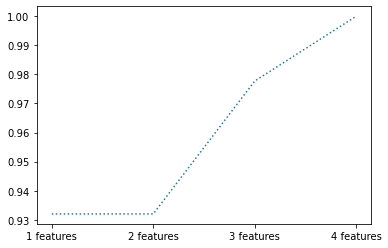

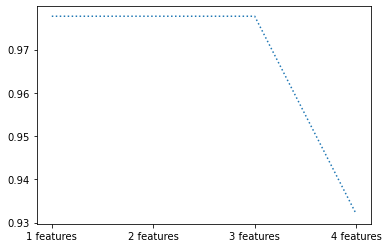

In [52]:
for i in range(len(results_test)):
    #plt.title("K --> " + str(i))
    plt.plot(results_test.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Restrigindo o iris dataset </p>
<p> Setosa -> Total </p>
<p> Versicolor -> 30 samples </p>
<p> Virginica -> 10 samples </p>
<p> https://www.pycodemates.com/2022/05/iris-dataset-classification-with-python.html </p>

In [184]:
def ex2_3_iris(X_data, y_data,features_selected):
    # Initialize Variables
    f1s_train = []
    f1s_val = []
    all_train = []
    all_val = []
    columns_all = []
    rows_all = []
    f1_all_train = []
    features_to_include = []
    
    f1_score_val = []
    f1_score_test = []
    f1_score_train = []
    all_models = []
    mean_f1 = []
    labels_nr_features = [str(i) + " features" for i in range(1, len(features_selected) + 1)]

    training, validation, testing = Train_Validation_Test(X_i, y_i, 0.3, 0.3)
    print(training[0])
    for feat in features_selected:
        feature = str(feat) + " Features" 
        rows_all.append(feature)
        features_to_include.append(feat)
        X_train = training[0][:, features_to_include]
        X_validate = validation[0][:, features_to_include]
        X_test = testing[0][:, features_to_include]
        f1_val = []
        f1_test = []
        f1_train = []
        for k in range(1,16,2):
            k_value = "K =" + str(k)
            columns_all.append(k_value)
            
            model_train = knn(X_train,training[1], k)
            pred_train = model_train.predict(X_train)
            real_train = training[1]
            metr_train = metricas(real_train,pred_train)
            f1_train.append(metr_train["F1 Score"])
            
            model_val = knn(X_train,training[1], k)
            pred_val = model_val.predict(X_validate)
            real_val = validation[1]
            metr_val = metricas(real_val,pred_val)
            f1_val.append(metr_val["F1 Score"])
            
            model_test = knn(X_train,training[1], k)
            pred_test = model_test.predict(X_test)
            real_test = testing[1]
            metr_test = metricas(real_test,pred_test)
            
            f1_test.append(metr_test["F1 Score"])
            
        f1_score_val.append(f1_val)
        f1_score_test.append(f1_test)
        f1_score_train.append(f1_train)
    f1_final_train = np.array(f1_score_train)
    f1_final_train_v2 = f1_final_train.reshape(8,4)
    f1_final_test = np.array(f1_score_test)
    f1_final_test_v2 = f1_final_test.reshape(8,4)
    f1_final_v1 = np.array(f1_score_val)
    f1_final_v2 = f1_final_v1.reshape(8,4)
    columns_fim = columns_all[:8]
    results_val = pd.DataFrame(f1_final_v2, columns=labels_nr_features, index=columns_fim)
    results_test = pd.DataFrame(f1_final_test_v2, columns=labels_nr_features, index=columns_fim)
    results_train = pd.DataFrame(f1_final_train_v2, columns=labels_nr_features, index=columns_fim)
    print("--- Train Results ---")
    display(results_train)
    print("--- Validation Results ---")
    display(results_val)
    print("--- Test Results ---")
    display(results_test)
    return results_val,results_test,results_train

In [185]:
iris = datasets.load_iris() #Loading the dataset
iris.keys()
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')
        
iris['species'] = species
iris.groupby('species').size()
iris.describe()
iris['species'] = species

setosa = iris[iris.species == "setosa"]
versicolor = iris[iris.species=='versicolor']
virginica = iris[iris.species=='virginica']


In [186]:
all_iris = []
all_setosa = []
all_ver = []
all_vir = []
all_geral =[]
setosa_fim = setosa.iloc[:50]
versicolor_fim = versicolor.iloc[:30]
virginica_fim = virginica.iloc[:10]
setosa_teste = pd.DataFrame(setosa_fim)
versicolor_teste = pd.DataFrame(versicolor_fim)
virginica_teste = pd.DataFrame(virginica_fim)

all_iris = [setosa_teste,versicolor_teste,virginica_teste]
result = pd.concat(all_iris)
result.drop(['species'], axis=1,inplace = True)
result_sem_target = result.drop(['target'], axis=1)
result["target"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
105    2.0
106    2.0
107    2.0
108    2.0
109    2.0
Name: target, Length: 90, dtype: float64

In [187]:
X_data = pd.DataFrame(result_sem_target, columns=feature_names)
y_data = result["target"]

x_train, x_cv, y_train, y_cv=train_test_split(X_data, y_data, test_size=0.2, stratify=y_data)

f=forward_feature_selection(x_train, x_cv, y_train, y_cv, 4)

features_selected = list(map(lambda x: feature_names.index(x), f))

results_val,results_test,results_train = ex2_3_iris(X_data,y_data,features_selected)

[[5.1 3.4 1.5 0.2]
 [6.7 3.  5.  1.7]
 [4.5 2.3 1.3 0.3]
 [5.7 4.4 1.5 0.4]
 [5.7 2.6 3.5 1. ]
 [6.3 2.5 5.  1.9]
 [7.2 3.6 6.1 2.5]
 [5.1 3.8 1.9 0.4]
 [7.1 3.  5.9 2.1]
 [6.5 3.  5.5 1.8]
 [7.2 3.2 6.  1.8]
 [5.8 4.  1.2 0.2]
 [4.4 3.2 1.3 0.2]
 [4.8 3.4 1.9 0.2]
 [5.2 3.5 1.5 0.2]
 [7.7 3.  6.1 2.3]
 [6.5 3.  5.8 2.2]
 [5.  3.5 1.6 0.6]
 [6.7 3.1 4.4 1.4]
 [5.8 2.7 4.1 1. ]
 [6.3 3.3 4.7 1.6]
 [5.6 2.5 3.9 1.1]
 [5.  2.  3.5 1. ]
 [6.1 3.  4.6 1.4]
 [6.9 3.1 4.9 1.5]
 [6.5 3.2 5.1 2. ]
 [4.6 3.1 1.5 0.2]
 [6.8 3.  5.5 2.1]
 [6.  3.  4.8 1.8]
 [6.2 3.4 5.4 2.3]
 [5.6 3.  4.5 1.5]
 [5.1 3.3 1.7 0.5]
 [4.9 3.1 1.5 0.2]
 [4.9 3.  1.4 0.2]
 [6.1 2.8 4.7 1.2]
 [5.8 2.6 4.  1.2]
 [4.9 3.1 1.5 0.1]
 [7.4 2.8 6.1 1.9]
 [6.5 2.8 4.6 1.5]
 [5.2 3.4 1.4 0.2]
 [6.4 2.8 5.6 2.1]
 [5.5 2.4 3.7 1. ]
 [6.5 3.  5.2 2. ]
 [6.  2.2 4.  1. ]
 [4.3 3.  1.1 0.1]
 [4.4 2.9 1.4 0.2]
 [5.  3.3 1.4 0.2]
 [5.5 2.5 4.  1.3]
 [7.2 3.  5.8 1.6]
 [6.9 3.1 5.1 2.3]
 [6.  2.7 5.1 1.6]
 [4.8 3.  1.4 0.1]
 [5.8 2.7 3.

1 features  2 features  3 features  4 features
K =1     0.966667    0.949867    0.933421    0.933421
K =3     0.950066    0.933421    0.950066    0.950066
K =5     1.000000    0.949867    0.933421    0.933421
K =7     0.933421    0.916777    0.933421    0.933421
K =9     1.000000    0.966667    0.966667    0.983289
K =11    0.950066    0.933421    0.950066    0.950066
K =13    1.000000    0.966667    0.966667    0.966667
K =15    0.950066    0.966667    0.966667    0.950066

--- Validation Results ---


1 features  2 features  3 features  4 features
K =1     0.868034    0.889598    0.955556    0.955556
K =3     0.912023    0.955556    0.912023    0.912023
K =5     0.846251    0.845438    0.890179    0.890179
K =7     0.843054    0.912023    0.889598    0.933773
K =9     0.933773    0.956019    0.956019    0.956019
K =11    0.934108    0.934108    0.934108    0.956019
K =13    0.889621    0.934108    0.934108    0.956019
K =15    0.912023    0.934108    0.956019    0.977924

--- Test Results ---


1 features  2 features  3 features  4 features
K =1     0.955556    0.955138    0.977695    0.977695
K =3     0.977695    0.977695    0.977695    0.977695
K =5     0.908718    0.955138    0.955138    0.955138
K =7     0.955138    0.933456    0.955138    0.933456
K =9     0.908718    0.955138    0.932194    0.932194
K =11    0.932194    0.932194    0.932194    0.910276
K =13    0.932194    0.977695    0.932194    0.932194
K =15    0.932194    0.932194    0.932194    0.910276

In [ ]:
<p> O treino obteve melhores resultados que a validation e o test mas porém apresentam valores bastante elevados, pelo que não se nota overfit no entanto tem  tendencia para tal</p>
<p> Relativamente

<p> Train Results</p>

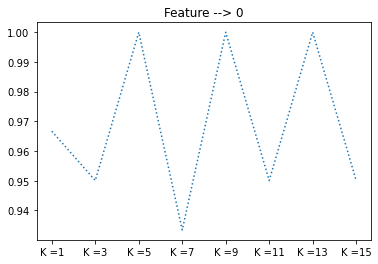

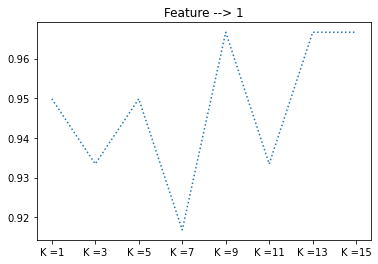

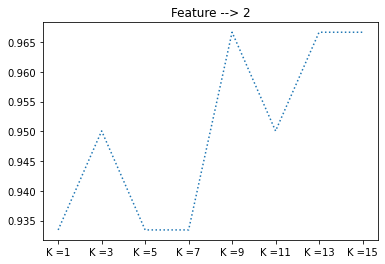

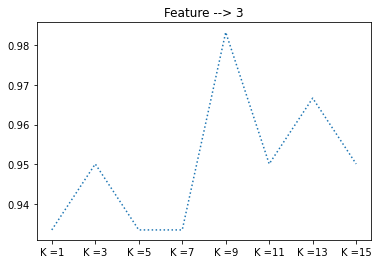

In [188]:
for i in range(len(results_train.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(results_train.iloc[:,i],linestyle = 'dotted')
    plt.show()

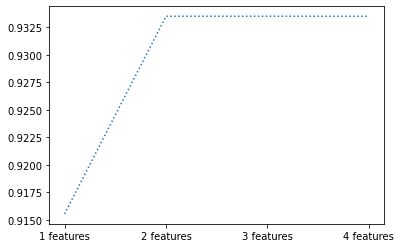

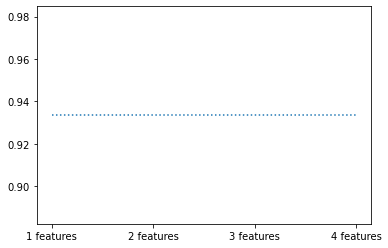

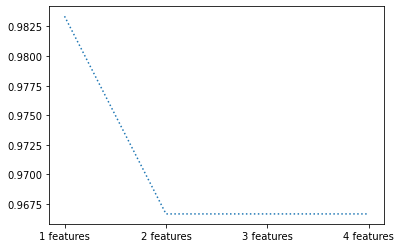

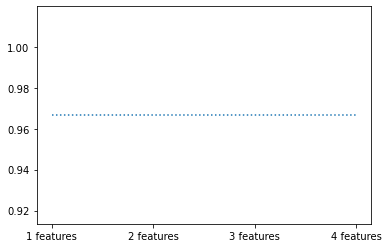

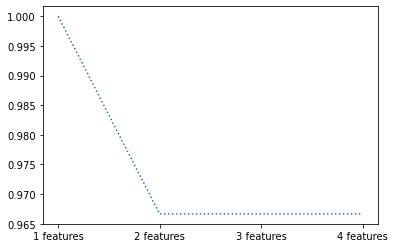

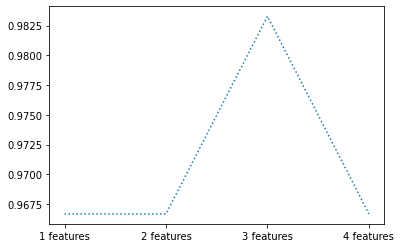

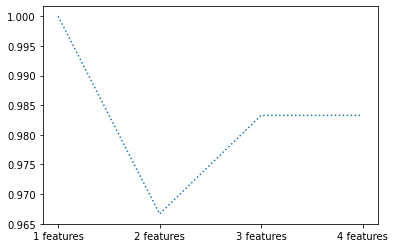

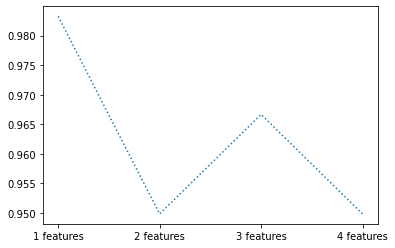

In [190]:
for i in range(len(df_features_train)):
    #plt.title("K --> " + str(i))
    plt.plot(df_features_train.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Validation Results </p>

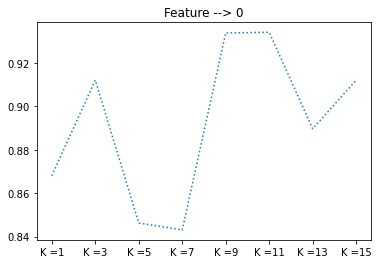

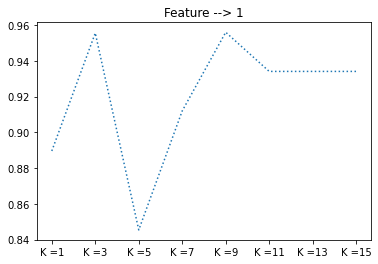

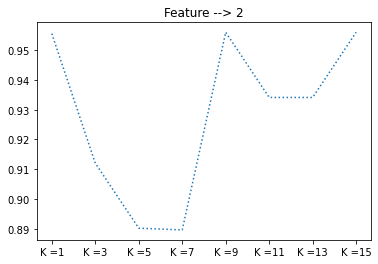

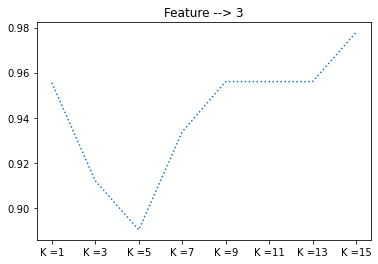

In [191]:
for i in range(len(results_val.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(results_val.iloc[:,i],linestyle = 'dotted')
    plt.show()

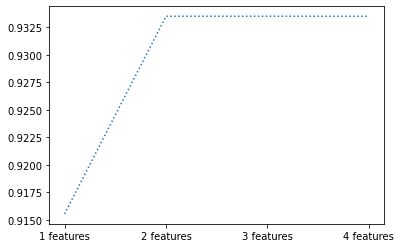

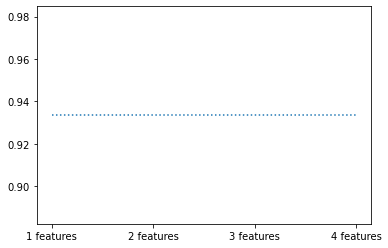

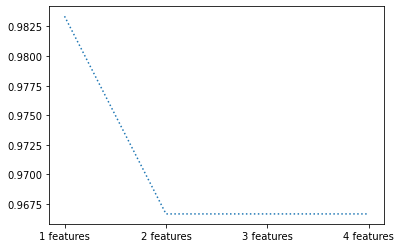

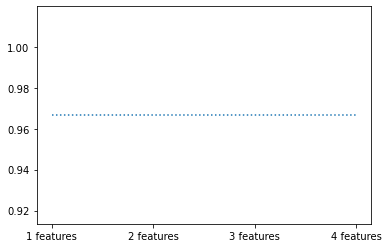

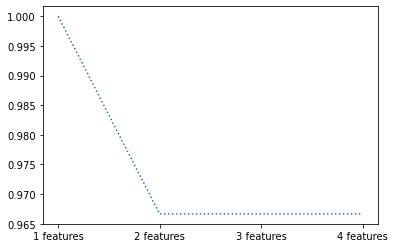

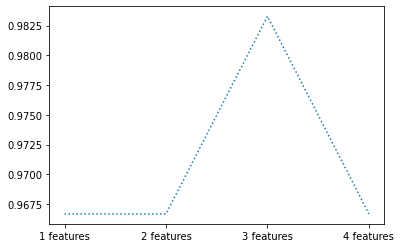

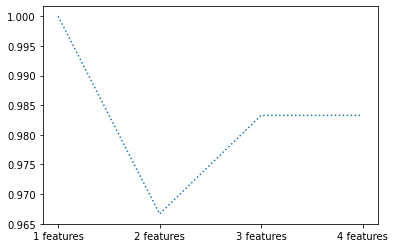

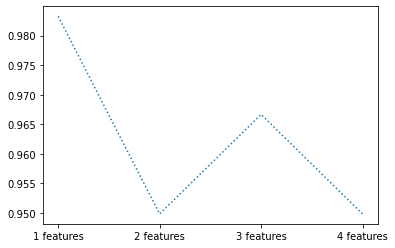

In [192]:
for i in range(len(df_features_train)):
    #plt.title("K --> " + str(i))
    plt.plot(df_features_train.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Test Results </p>


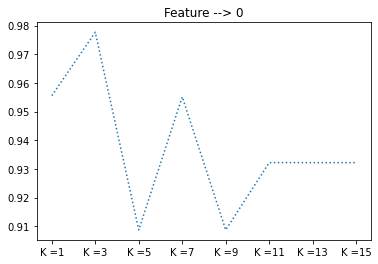

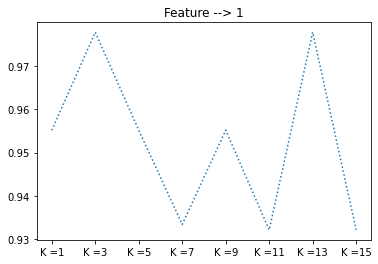

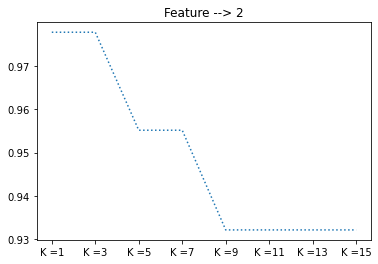

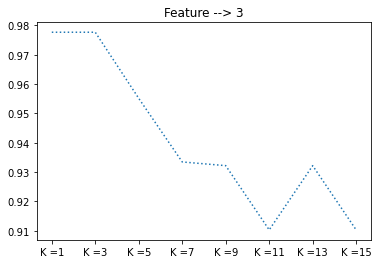

In [193]:
for i in range(len(results_test.columns)):
    plt.title("Feature --> " + str(i))
    plt.plot(results_test.iloc[:,i],linestyle = 'dotted')
    plt.show()

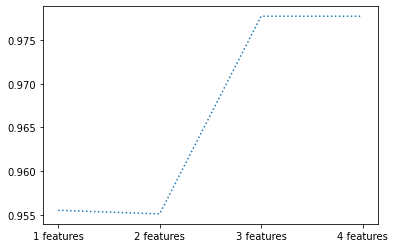

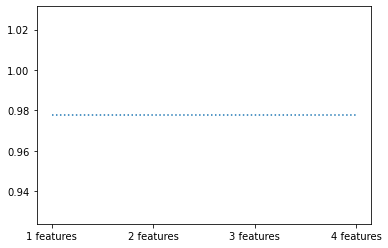

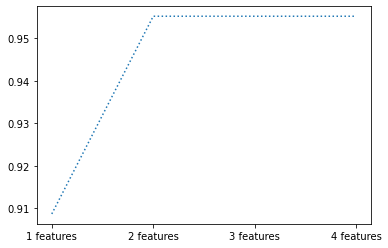

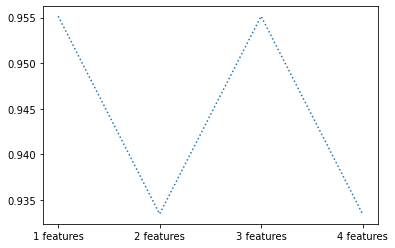

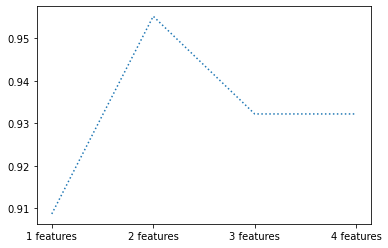

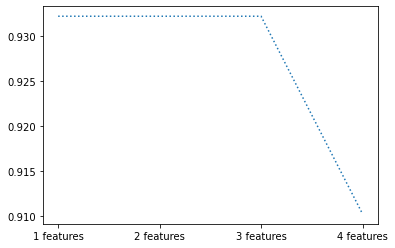

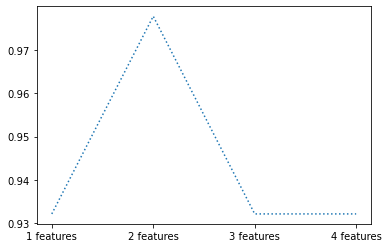

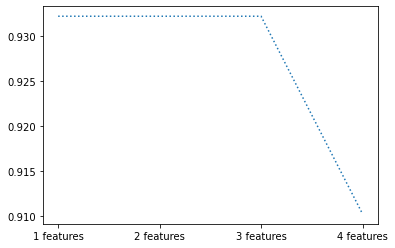

In [194]:
for i in range(len(results_test)):
    #plt.title("K --> " + str(i))
    plt.plot(results_test.iloc[i],linestyle = 'dotted')
    plt.show()

<p> 3 - Usando o dataset atividades humanas </p>

<p> 3.3.1 - Train-Only </p>  

Metrics  Value
0     Recall    1.0
1  Precision    1.0
2   F1 Score    1.0

<Figure size 432x288 with 0 Axes>

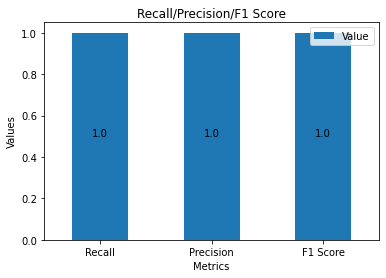

<Figure size 432x288 with 0 Axes>

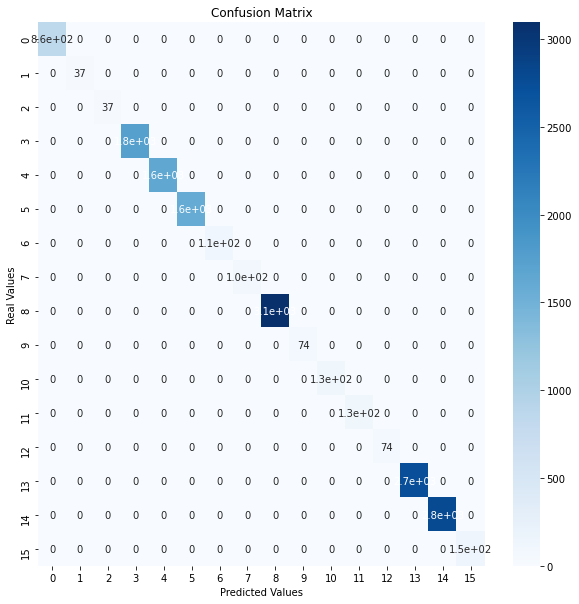

In [125]:
train_test(X,y)

<p> 3.2.1 - TT - 70 - 30 </p>

Metrics     Value
0     Recall  0.710246
1  Precision  0.703957
2   F1 Score  0.705981

Metrics  Value
0     Recall    1.0
1  Precision    1.0
2   F1 Score    1.0

<Figure size 432x288 with 0 Axes>

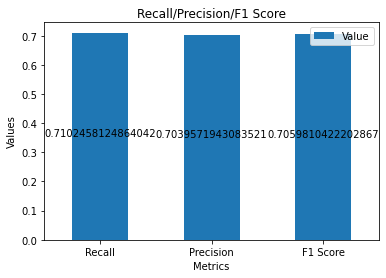

<Figure size 432x288 with 0 Axes>

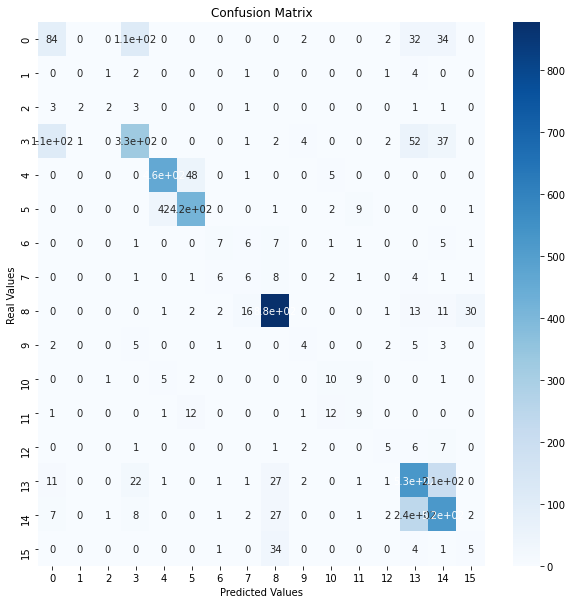

<Figure size 432x288 with 0 Axes>

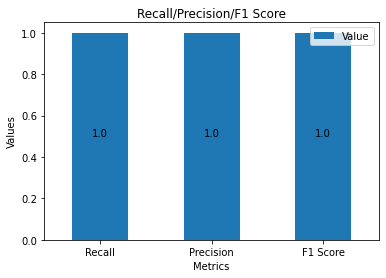

<Figure size 432x288 with 0 Axes>

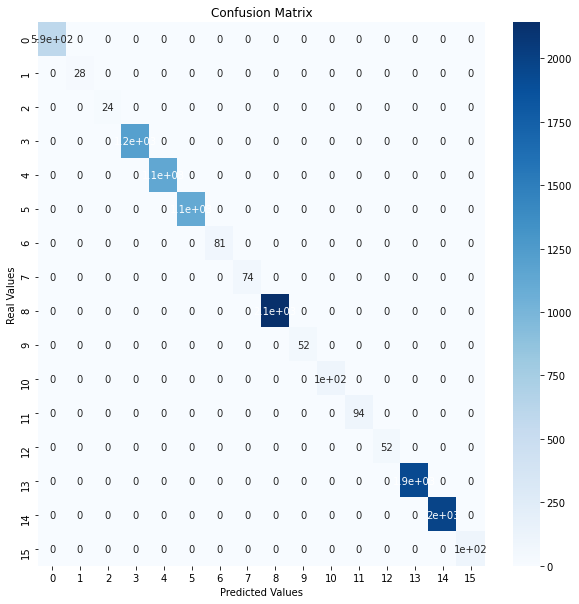

In [126]:
TT_70_30(X,y)

<p> 3.2.1 - CV-10 </p>

Folds    Recall  Precision  F1 Score
0  [Fold0]  0.735160   0.727030  0.730132
1  [Fold1]  0.724070   0.719051  0.718141
2  [Fold2]  0.726501   0.715371  0.718590
3  [Fold3]  0.734334   0.734972  0.733004
4  [Fold4]  0.734987   0.728825  0.730521
5  [Fold5]  0.714752   0.704418  0.706808
6  [Fold6]  0.736945   0.725419  0.729477
7  [Fold7]  0.716057   0.708855  0.710986
8  [Fold8]  0.750653   0.747287  0.747552
9  [Fold9]  0.724543   0.715447  0.718055

Folds  Recall  Precision  F1 Score
0  [Fold0]     1.0        1.0       1.0
1  [Fold1]     1.0        1.0       1.0
2  [Fold2]     1.0        1.0       1.0
3  [Fold3]     1.0        1.0       1.0
4  [Fold4]     1.0        1.0       1.0
5  [Fold5]     1.0        1.0       1.0
6  [Fold6]     1.0        1.0       1.0
7  [Fold7]     1.0        1.0       1.0
8  [Fold8]     1.0        1.0       1.0
9  [Fold9]     1.0        1.0       1.0

<Figure size 432x288 with 0 Axes>

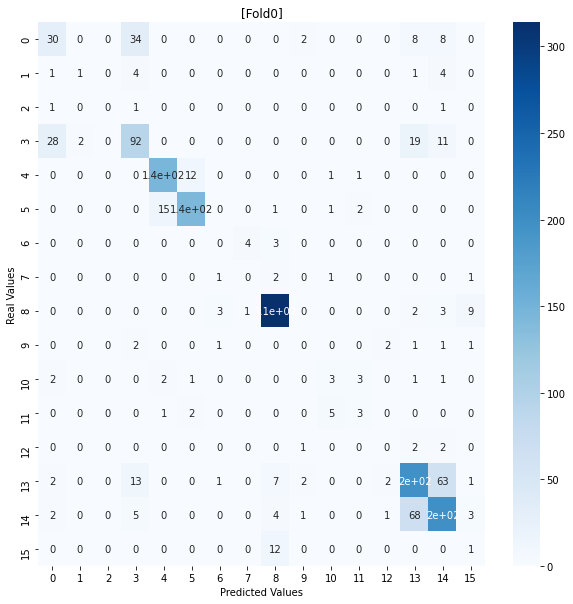

<Figure size 432x288 with 0 Axes>

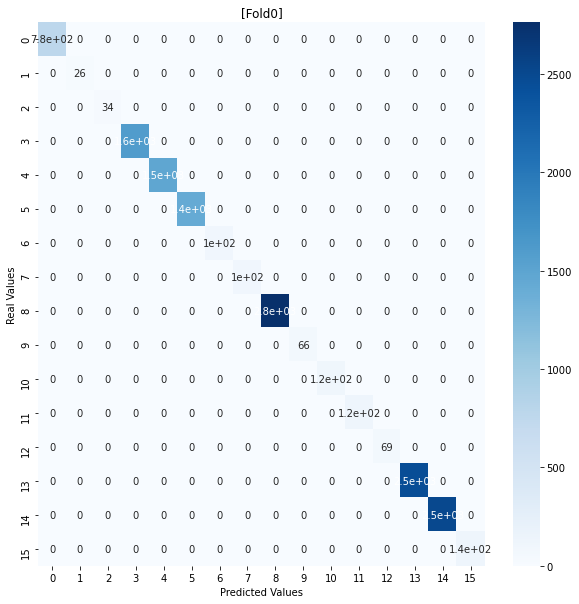

<Figure size 432x288 with 0 Axes>

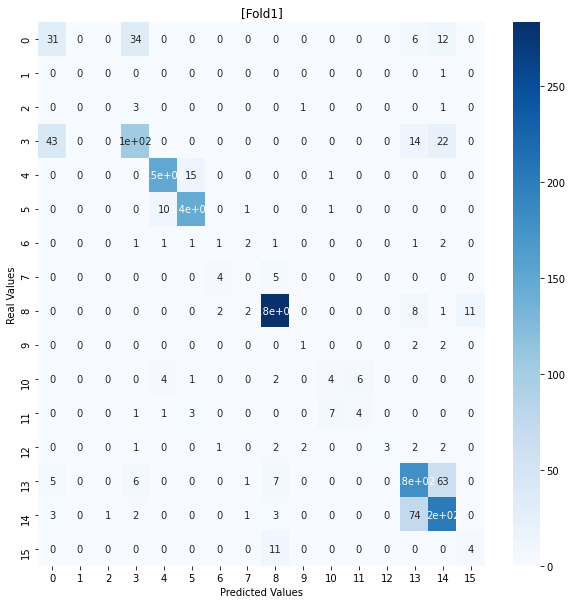

<Figure size 432x288 with 0 Axes>

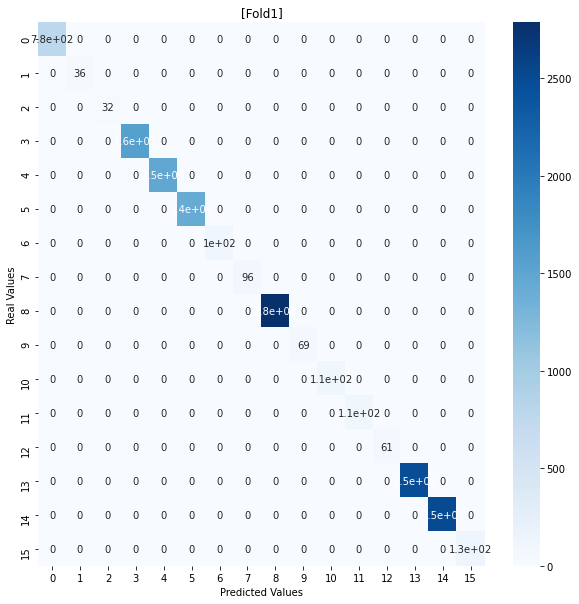

<Figure size 432x288 with 0 Axes>

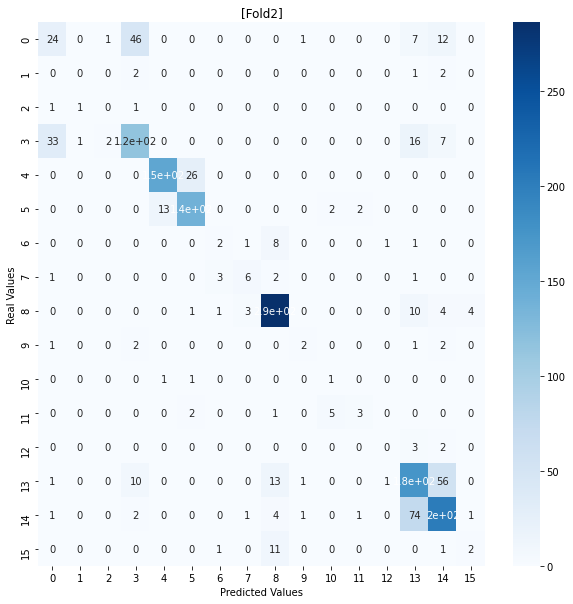

<Figure size 432x288 with 0 Axes>

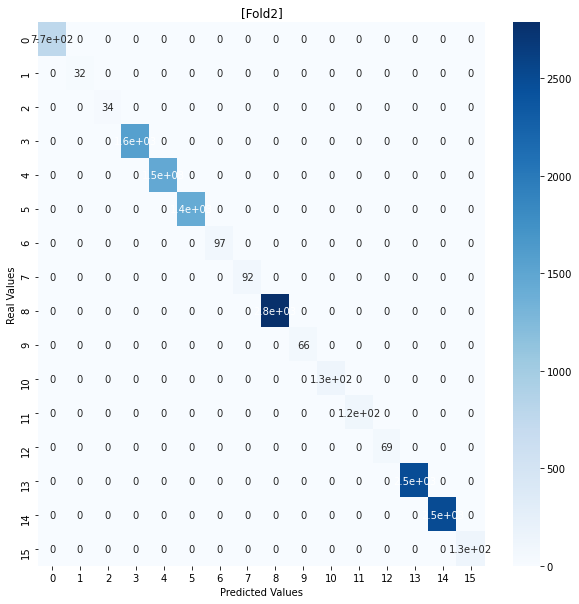

<Figure size 432x288 with 0 Axes>

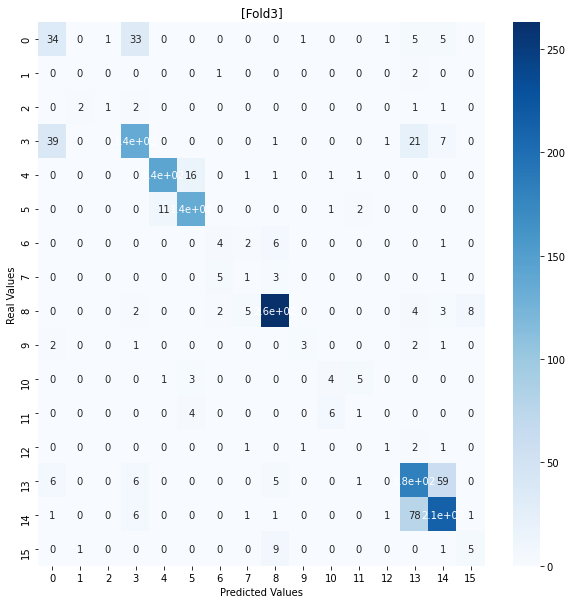

<Figure size 432x288 with 0 Axes>

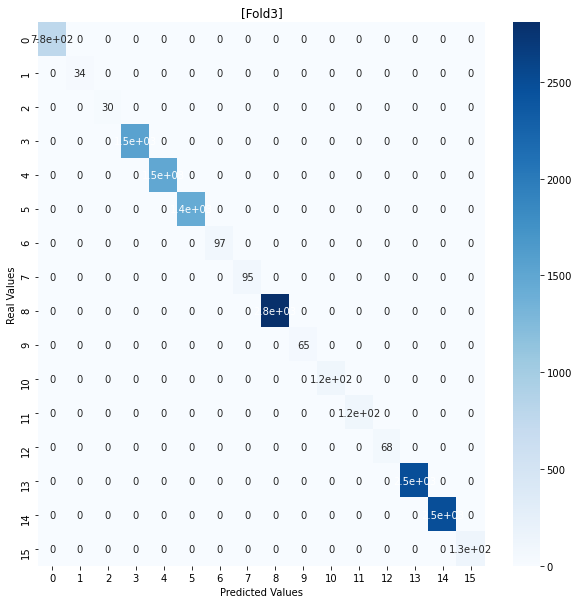

<Figure size 432x288 with 0 Axes>

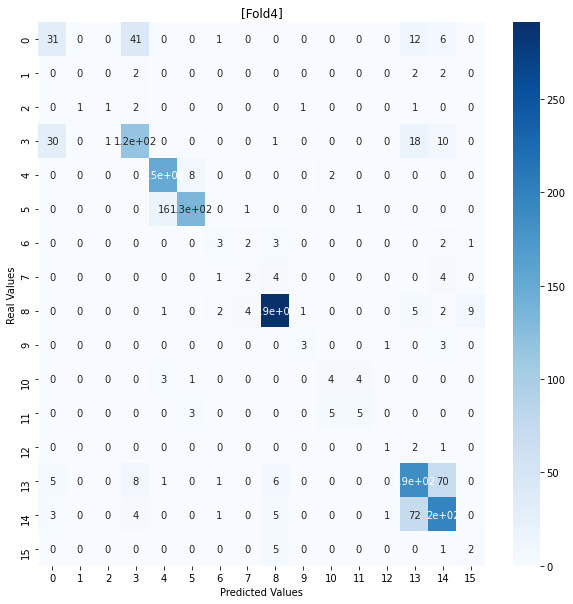

<Figure size 432x288 with 0 Axes>

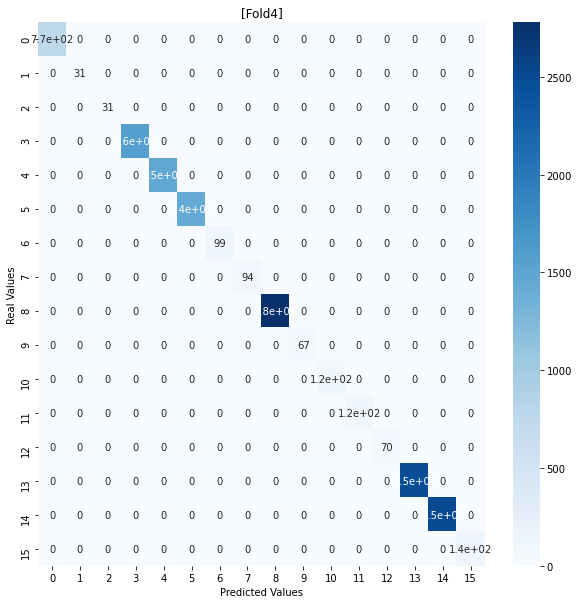

<Figure size 432x288 with 0 Axes>

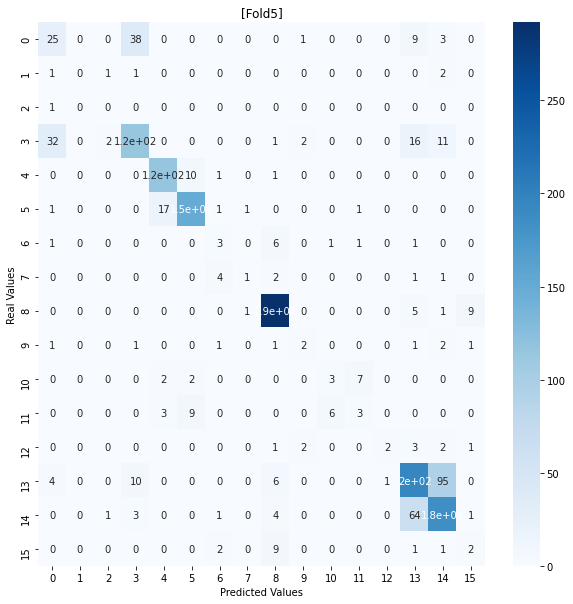

<Figure size 432x288 with 0 Axes>

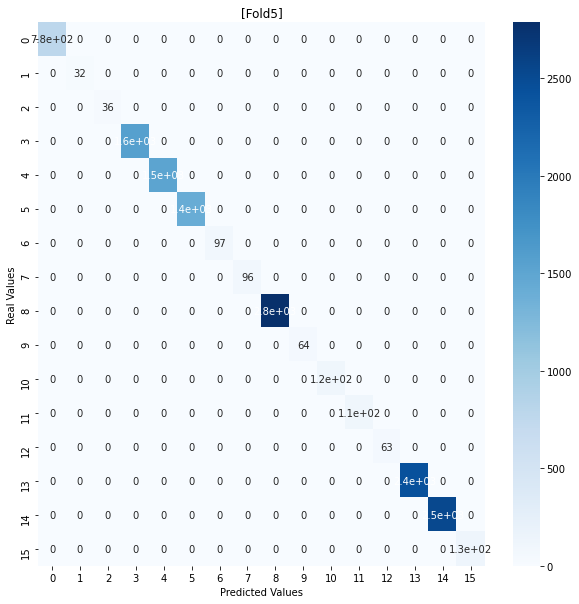

<Figure size 432x288 with 0 Axes>

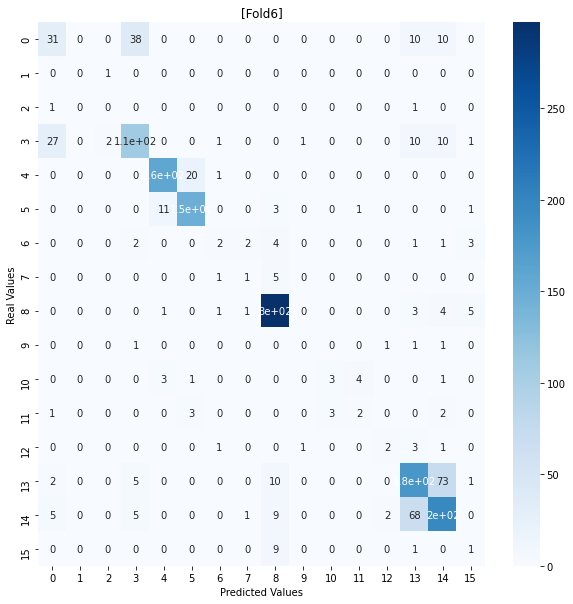

<Figure size 432x288 with 0 Axes>

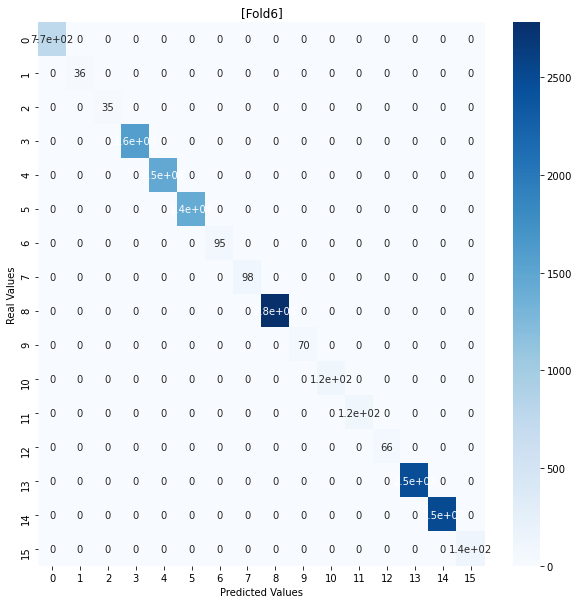

<Figure size 432x288 with 0 Axes>

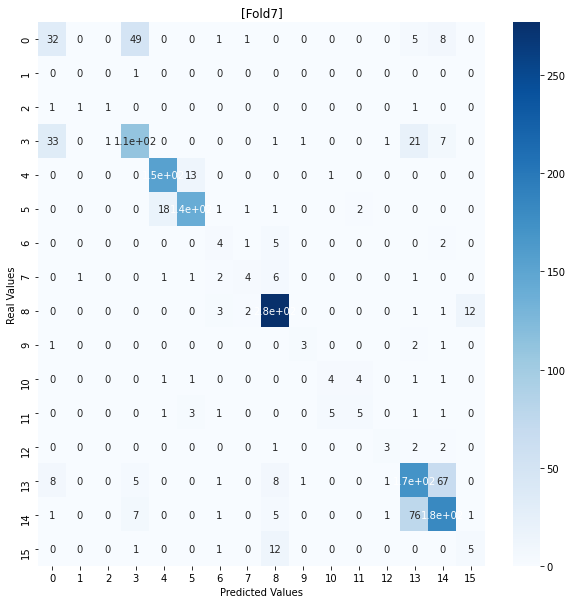

<Figure size 432x288 with 0 Axes>

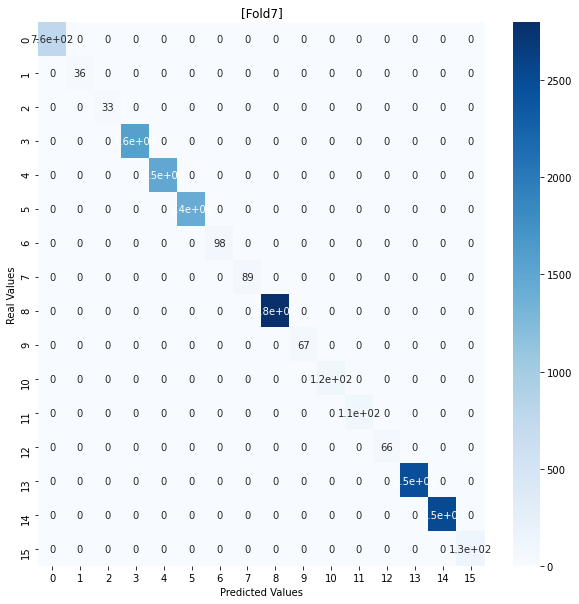

<Figure size 432x288 with 0 Axes>

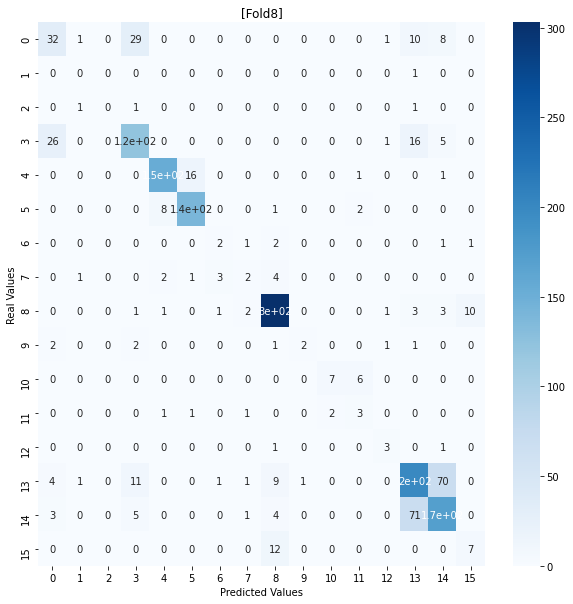

<Figure size 432x288 with 0 Axes>

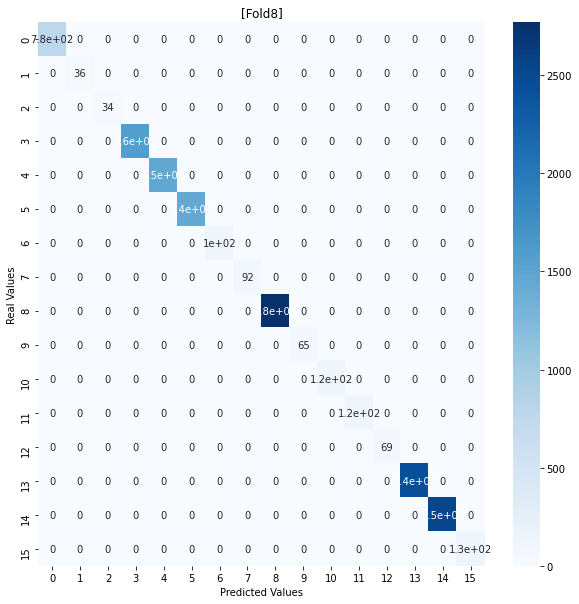

<Figure size 432x288 with 0 Axes>

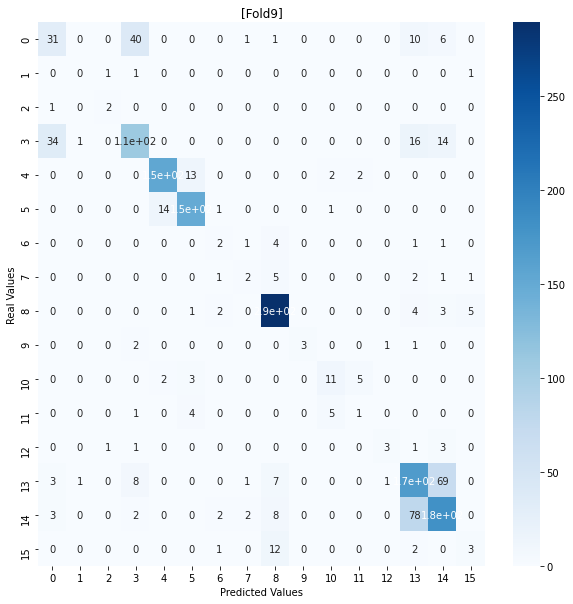

<Figure size 432x288 with 0 Axes>

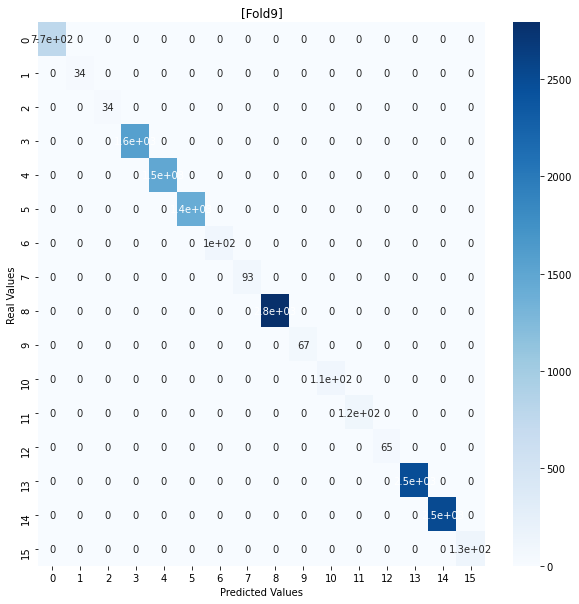

In [127]:
CV_10(X,y)

<p> 3.2.2 - Train Only - K varia </p>

K value    Recall  Precision  F1 Score
0   [K = 1]  1.000000   1.000000  1.000000
1   [K = 3]  0.866662   0.863474  0.862904
2   [K = 5]  0.826132   0.818933  0.815466
3   [K = 7]  0.805247   0.792848  0.789765
4   [K = 9]  0.793695   0.782359  0.775899
5  [K = 11]  0.786320   0.776649  0.766610
6  [K = 13]  0.777509   0.765590  0.756149
7  [K = 15]  0.768829   0.756250  0.745635

<Figure size 432x288 with 0 Axes>

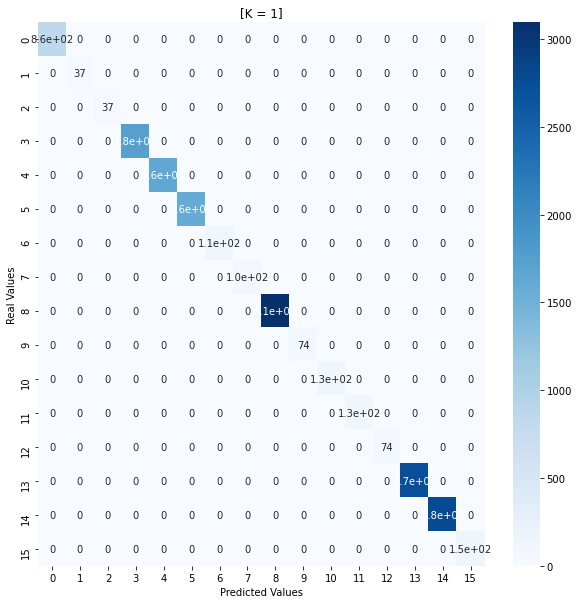

<Figure size 432x288 with 0 Axes>

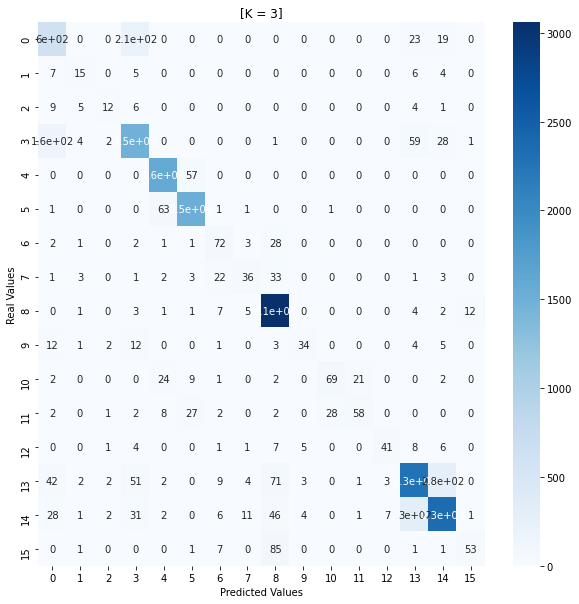

<Figure size 432x288 with 0 Axes>

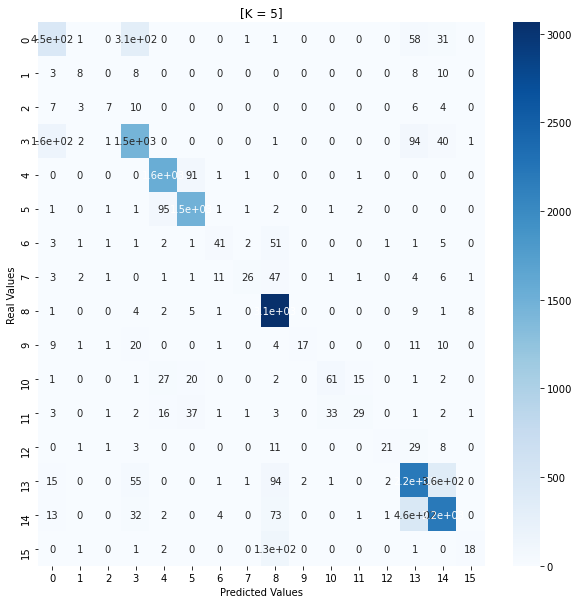

<Figure size 432x288 with 0 Axes>

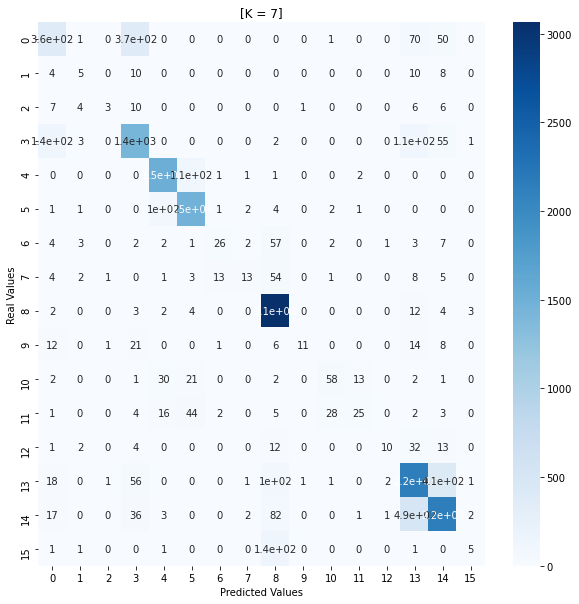

<Figure size 432x288 with 0 Axes>

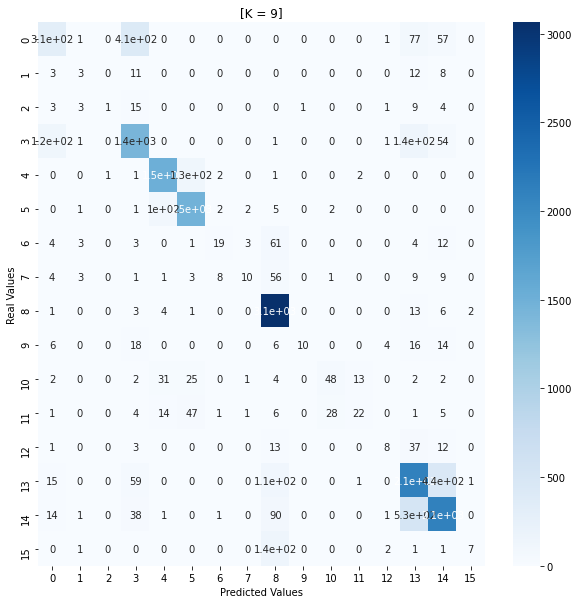

<Figure size 432x288 with 0 Axes>

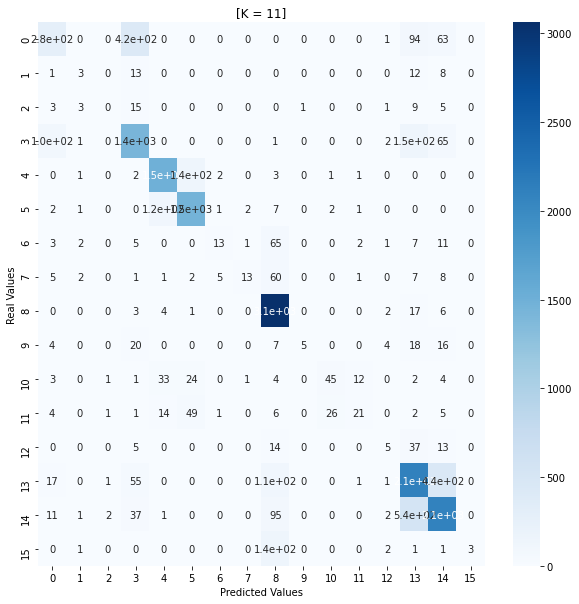

<Figure size 432x288 with 0 Axes>

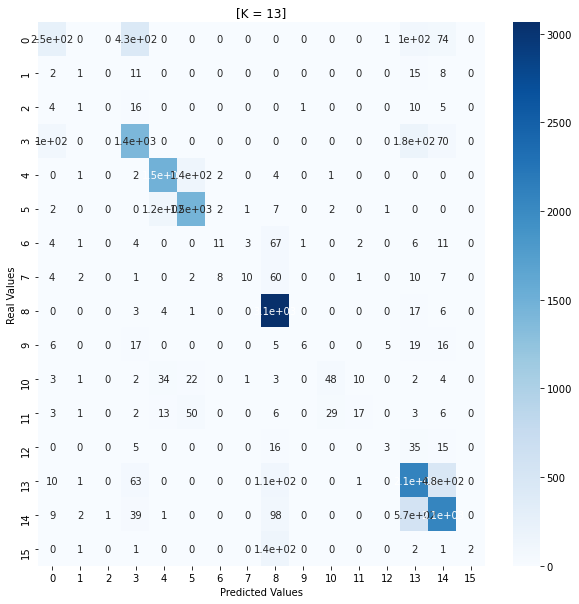

<Figure size 432x288 with 0 Axes>

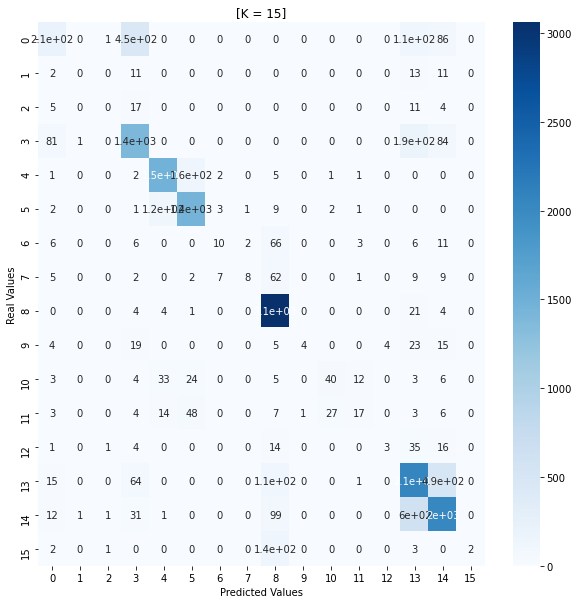

In [128]:
train_test_2(X,y)

<p> 3.2.2 - TVT-40-30-30 - K varia</p>

K value    Recall  Precision  F1 Score
0   [K = 1]  0.693713   0.687769  0.689327
1   [K = 3]  0.702415   0.684692  0.691992
2   [K = 5]  0.711986   0.695289  0.695364
3   [K = 7]  0.712204   0.680685  0.692882
4   [K = 9]  0.710463   0.677085  0.689153
5  [K = 11]  0.711116   0.680664  0.689530
6  [K = 13]  0.707200   0.677161  0.684754
7  [K = 15]  0.703502   0.670640  0.679369

Recall  Precision  F1 Score
0  0.692191   0.682358  0.685270
1  0.696106   0.679907  0.685620
2  0.693278   0.666187  0.675502
3  0.692843   0.661688  0.672178
4  0.693713   0.658887  0.670283
5  0.693931   0.659542  0.669199
6  0.684359   0.643583  0.657485
7  0.683054   0.642254  0.655733

<Figure size 432x288 with 0 Axes>

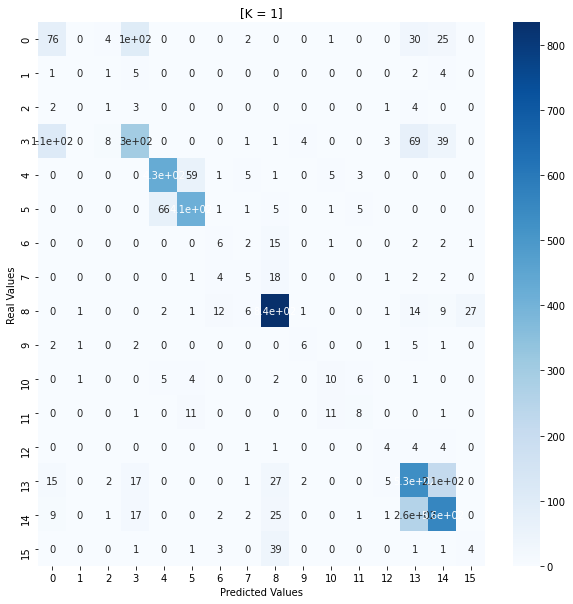

<Figure size 432x288 with 0 Axes>

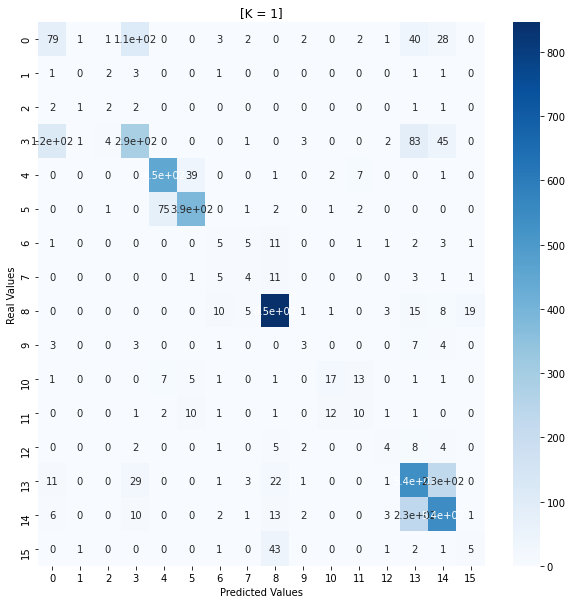

<Figure size 432x288 with 0 Axes>

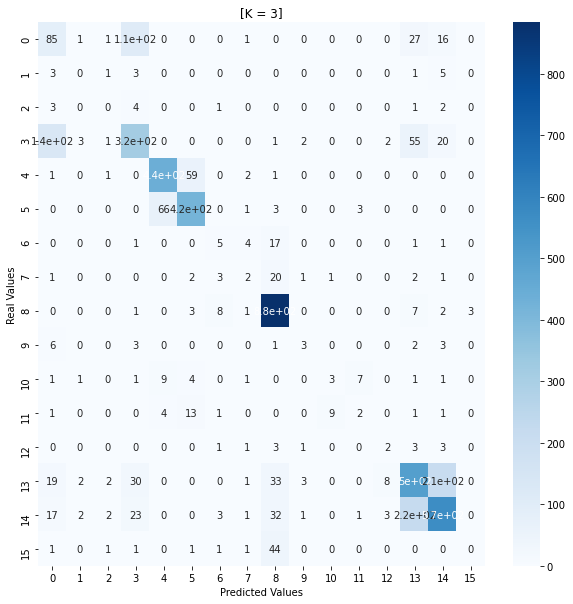

<Figure size 432x288 with 0 Axes>

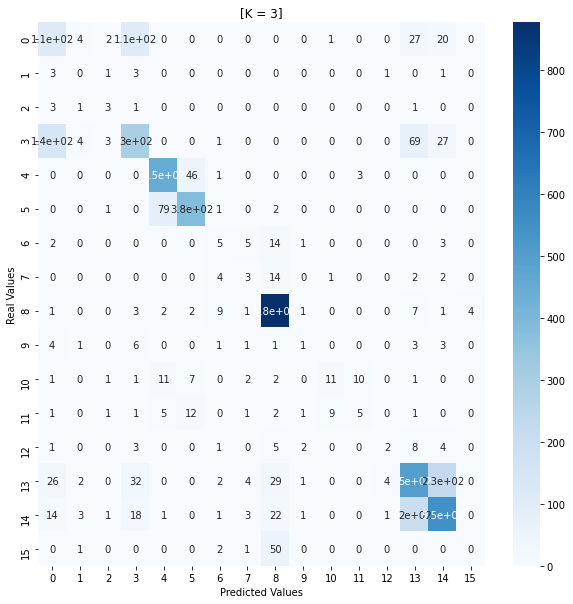

<Figure size 432x288 with 0 Axes>

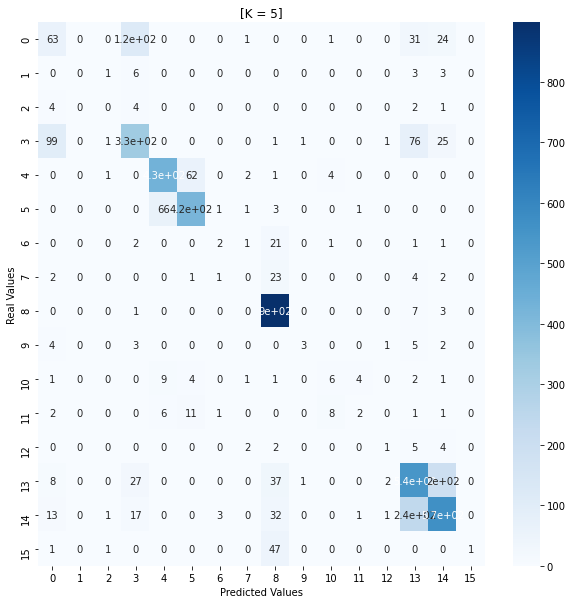

<Figure size 432x288 with 0 Axes>

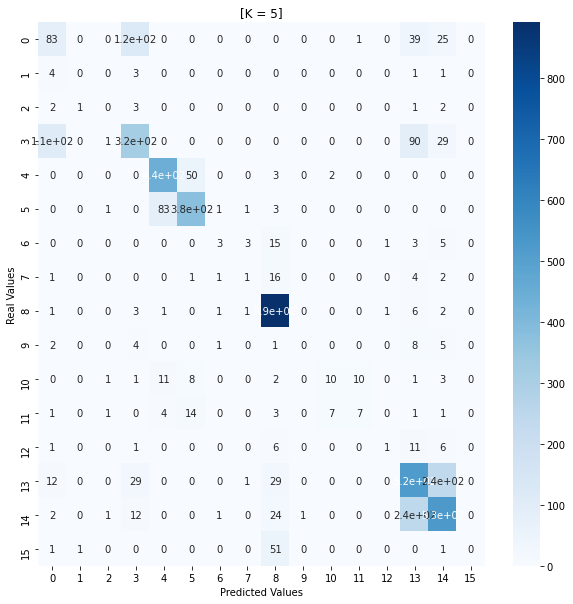

<Figure size 432x288 with 0 Axes>

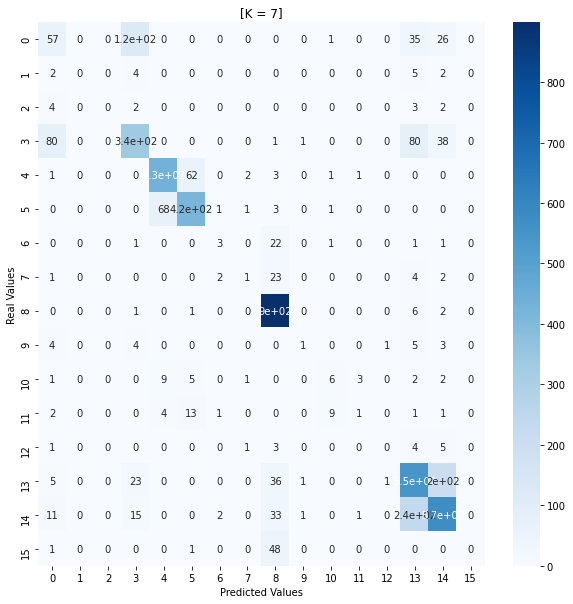

<Figure size 432x288 with 0 Axes>

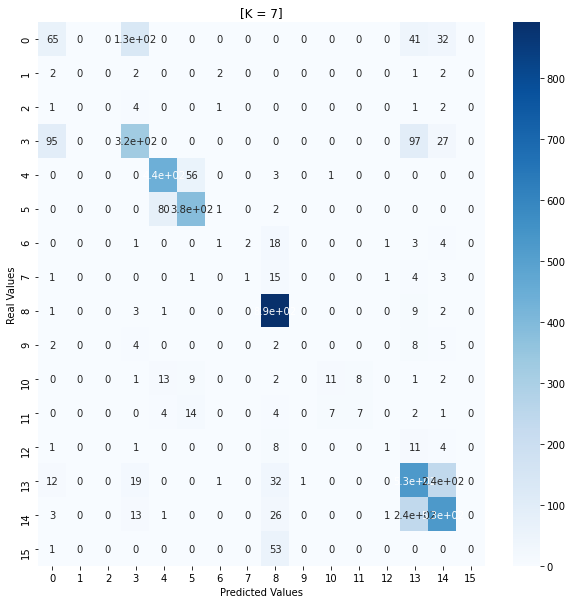

<Figure size 432x288 with 0 Axes>

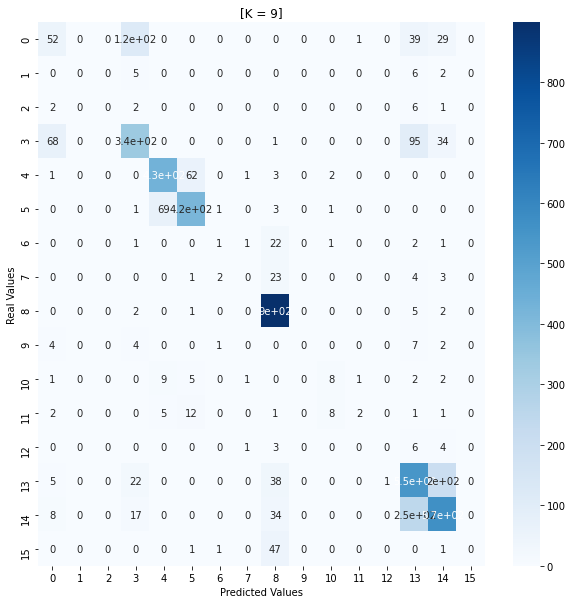

<Figure size 432x288 with 0 Axes>

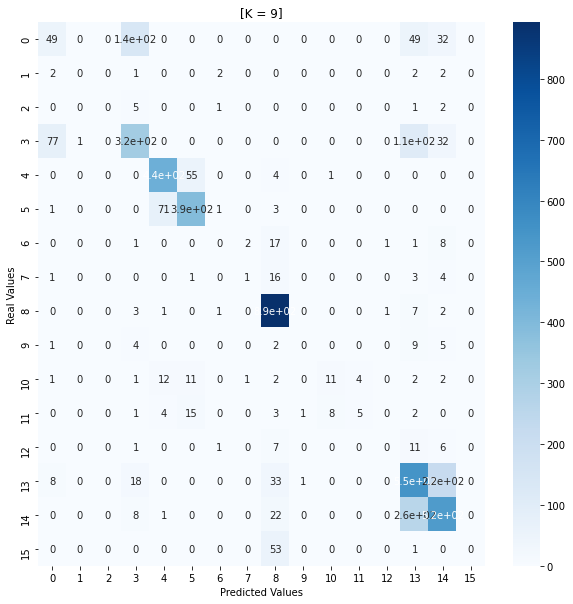

<Figure size 432x288 with 0 Axes>

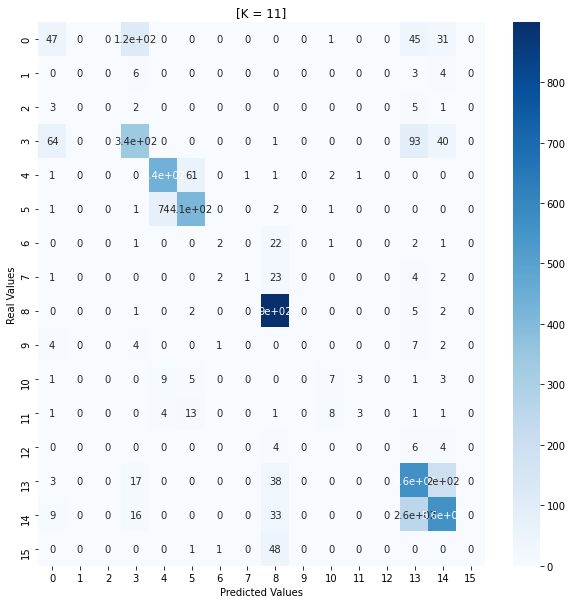

<Figure size 432x288 with 0 Axes>

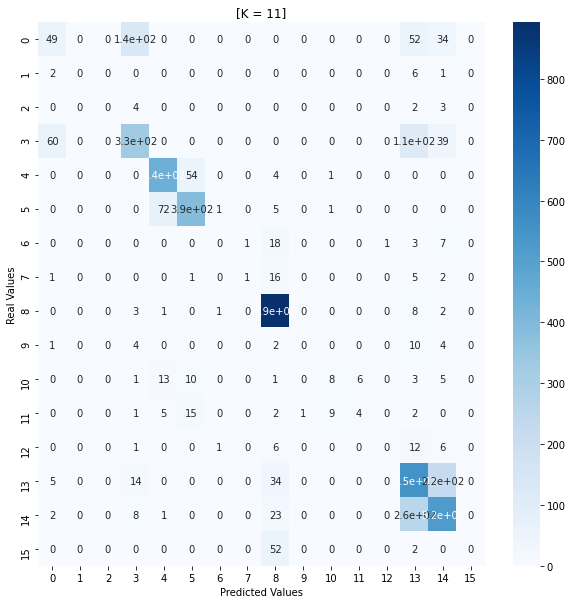

<Figure size 432x288 with 0 Axes>

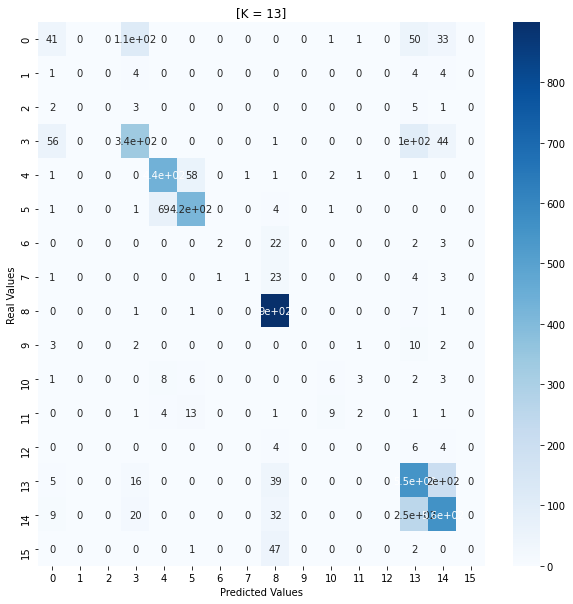

<Figure size 432x288 with 0 Axes>

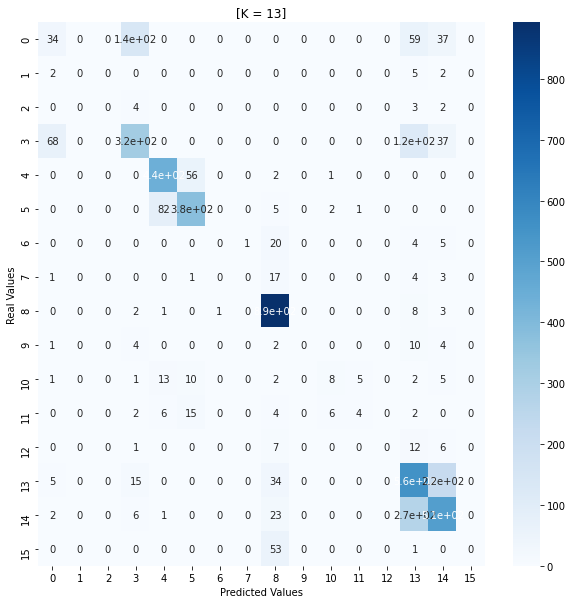

<Figure size 432x288 with 0 Axes>

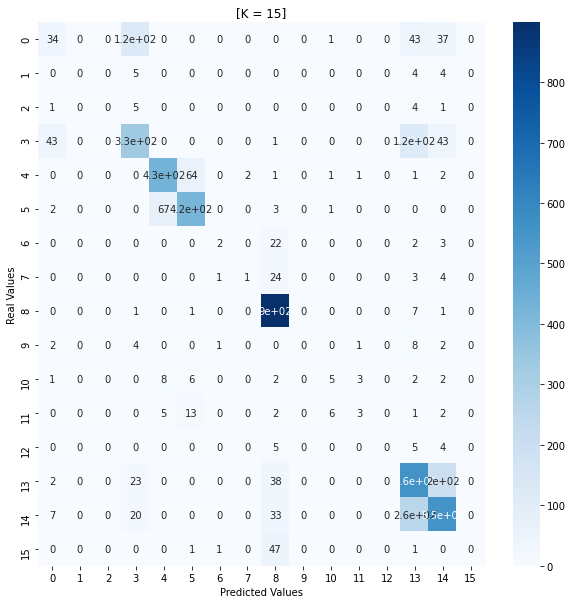

<Figure size 432x288 with 0 Axes>

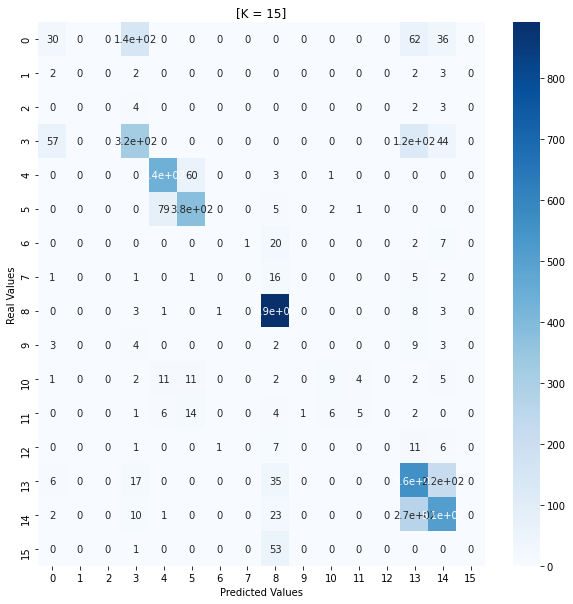

In [129]:
TVT_40_30_30(X,y)

<p> 3.2.2 - CV-10 - K varia </p>

In [ ]:
CV_10_2(X,y)

[Fold0]
[Fold1]
[Fold2]
[Fold3]


<p> Neste caso vemos que o treino obtem melhores resultados gerais que o teste e assim denota-se overfit </p>

<p> 3.2.3 - Usar o ReliefF </p>

In [131]:
def reliefF_humans(x, y):
    fs = ReliefF(n_neighbors=100, n_features_to_keep=10)
    fs.fit_transform(x, y)
    return fs.top_features[:10]

In [132]:
def ex3(X, Y):
    # Initialize Variables
    f1s_train = []
    f1s_val = []
    all_train = []
    all_val = []
    columns_all = []
    rows_all = []
    f1_all_train = []
    features_to_include = []
    
    features = reliefF_humans(X,Y)
    print(features)
    features_to_include = []
    f1_score_val = []
    f1_score_test = []
    f1_score_train = []
    all_models = []
    mean_f1 = []
    labels_nr_features = [str(i) + " features" for i in range(1, len(features) + 1)]

    training, validation, testing = Train_Validation_Test(X, Y, 0.3, 0.3)
    
    print(validation[0])
    for feat in range(0,10):
        feature = str(feat) + " Features" 
        rows_all.append(feature)
        features_to_include.append(feat)
        X_train = training[0][:, features_to_include]
        X_validate = validation[0][:, features_to_include]
        X_test = testing[0][:, features_to_include]
        f1_val = []
        f1_test = []
        f1_train = []
        for k in range(1,16,2):
            k_value = "K =" + str(k)
            columns_all.append(k_value)
            
            model_train = knn(X_train,training[1], k)
            pred_train = model_train.predict(X_train)
            real_train = training[1]
            metr_train = metricas(real_train,pred_train)
            f1_train.append(metr_train["F1 Score"])
            
            model_val = knn(X_train,training[1], k)
            pred_val = model_val.predict(X_validate)
            real_val = validation[1]
            metr_val = metricas(real_val,pred_val)
            f1_val.append(metr_val["F1 Score"])
            
            model_test = knn(X_train,training[1], k)
            pred_test = model_test.predict(X_test)
            real_test = testing[1]
            metr_test = metricas(real_test,pred_test)
            
            f1_test.append(metr_test["F1 Score"])
            
        f1_score_val.append(f1_val)
        f1_score_test.append(f1_test)
        f1_score_train.append(f1_train)
    f1_final_train = np.array(f1_score_train)
    display(f1_final_train.shape)
    f1_final_train_v2 = f1_final_train.reshape(8,10)
    f1_final_test = np.array(f1_score_test)
    display(f1_final_test.shape)
    f1_final_test_v2 = f1_final_test.reshape(8,10)
    f1_final_v1 = np.array(f1_score_val)
    display(f1_final_v1.shape)
    f1_final_v2 = f1_final_v1.reshape(8,10)
    columns_fim = columns_all[:8]
    results_val = pd.DataFrame(f1_final_v2, columns=labels_nr_features, index=columns_fim)
    results_test = pd.DataFrame(f1_final_test_v2, columns=labels_nr_features, index=columns_fim)
    results_train = pd.DataFrame(f1_final_train_v2, columns=labels_nr_features, index=columns_fim)
    print("--- Train Results ---")
    display(results_train)
    print("--- Validation Results ---")
    display(results_val)
    print("--- Test Results ---")
    display(results_test)
    return results_val,results_test,results_train

In [133]:
df_features_val,df_features_test,df_features_train = ex3(X,y)

[29 27 28 86 32 94 95 47 96 48]
[[-0.17042551  0.46721441 -0.11309773 ... -0.29045693 -0.29045693
  -0.30631661]
 [-0.09657574  0.50477947 -0.34803439 ... -0.67039011 -0.67039011
  -0.69462374]
 [ 1.15998402 -1.07273953  2.02621616 ... -0.67188151 -0.67188151
  -0.69597924]
 ...
 [ 0.43019044  0.4728809  -0.800519   ... -0.67191672 -0.67191672
  -0.69604772]
 [-1.02333632 -0.89016642  2.3486298  ... -0.59845781 -0.59845781
  -0.59345526]
 [-0.27668925  0.50135546 -0.21513122 ... -0.67171948 -0.67171948
  -0.69584189]]


(10, 8)

(10, 8)

(10, 8)

--- Train Results ---


1 features  2 features  3 features  4 features  5 features  6 features  \
K =1     0.999837    0.566317    0.506762    0.465508    0.438756    0.423170   
K =3     0.629298    0.590640    0.571571    0.556752    0.548379    0.537337   
K =5     0.621312    0.595757    0.586068    0.579937    1.000000    0.745803   
K =7     0.577762    0.567513    1.000000    0.755503    0.683403    0.653394   
K =9     1.000000    0.756522    0.682941    0.646464    0.620948    0.599571   
K =11    0.732678    0.706910    0.691608    0.682417    0.672341    0.669391   
K =13    0.713902    0.706027    0.698645    0.694473    1.000000    0.816890   
K =15    0.705722    0.703870    1.000000    0.818149    0.764883    0.737196   

       7 features  8 features  9 features  10 features  
K =1     0.418828    0.410497    1.000000     0.686723  
K =3     1.000000    0.732311    0.674405     0.638908  
K =5     0.671170    0.639288    0.616419     0.593764  
K =7     0.630192    0.610029    0.600648     0.585808  
K =9     0.583732    0.574432    1.000000     0.785820  
K =11    1.000000    0.807741    0.756247     0.735893  
K =13    0.767277    0.741643    0.725069     0.712094  
K =15    0.723140    0.711687    0.703107     0.696623

--- Validation Results ---


1 features  2 features  3 features  4 features  5 features  6 features  \
K =1     0.296638    0.282759    0.314678    0.322678    0.328977    0.328980   
K =3     0.485104    0.486547    0.483221    0.485853    0.480203    0.481349   
K =5     0.544152    0.536476    0.534504    0.529316    0.547293    0.534060   
K =7     0.532956    0.525983    0.583548    0.569805    0.567800    0.568374   
K =9     0.583260    0.572115    0.560931    0.562328    0.556511    0.543519   
K =11    0.627523    0.628178    0.630309    0.635860    0.635716    0.636274   
K =13    0.666201    0.667427    0.669749    0.667175    0.661889    0.666434   
K =15    0.673598    0.673009    0.659768    0.660503    0.673906    0.670445   

       7 features  8 features  9 features  10 features  
K =1     0.329932    0.330069    0.473554     0.470756  
K =3     0.536526    0.535028    0.537948     0.541033  
K =5     0.539827    0.542717    0.535513     0.533017  
K =7     0.563764    0.560508    0.553124     0.544988  
K =9     0.538082    0.530583    0.625718     0.620559  
K =11    0.648286    0.652621    0.662326     0.664504  
K =13    0.681555    0.678209    0.674288     0.673700  
K =15    0.674543    0.672070    0.672365     0.672834

--- Test Results ---


1 features  2 features  3 features  4 features  5 features  6 features  \
K =1     0.279958    0.285089    0.318312    0.322654    0.332951    0.327121   
K =3     0.476707    0.472573    0.476776    0.472345    0.474989    0.468499   
K =5     0.540318    0.539159    0.527261    0.528158    0.565698    0.557091   
K =7     0.530410    0.524832    0.594131    0.584486    0.583494    0.579861   
K =9     0.594974    0.576539    0.573749    0.566201    0.557158    0.546258   
K =11    0.641181    0.641818    0.642534    0.644360    0.646124    0.644367   
K =13    0.673064    0.674943    0.673171    0.675295    0.668192    0.668215   
K =15    0.679123    0.675379    0.665288    0.669962    0.670200    0.678153   

       7 features  8 features  9 features  10 features  
K =1     0.335797    0.342393    0.471519     0.455097  
K =3     0.540243    0.540419    0.547078     0.541663  
K =5     0.561301    0.554188    0.544349     0.540497  
K =7     0.568679    0.565716    0.553571     0.549584  
K =9     0.540702    0.536441    0.621266     0.628526  
K =11    0.662553    0.658708    0.664377     0.668554  
K =13    0.674529    0.680351    0.681519     0.675036  
K =15    0.682900    0.680769    0.682088     0.677089

<p> Train Results </p>

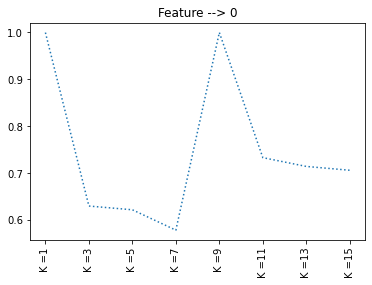

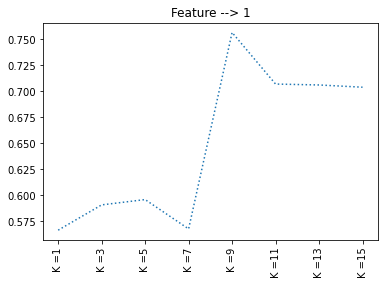

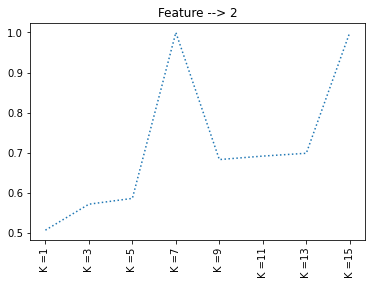

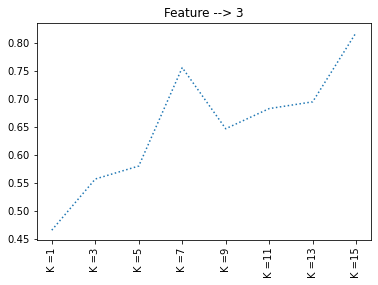

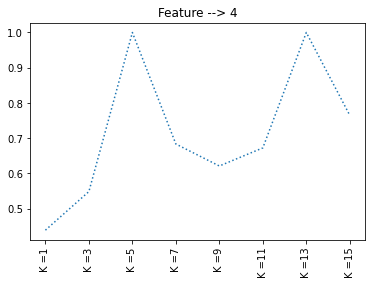

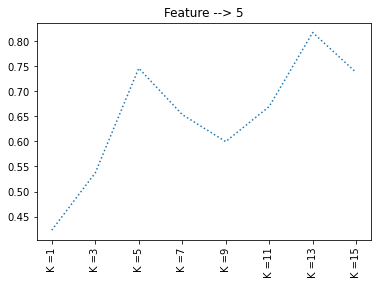

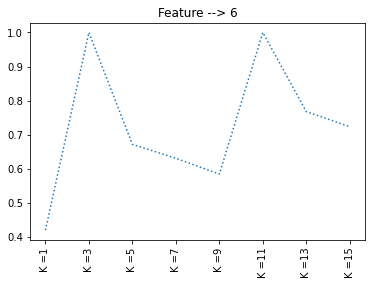

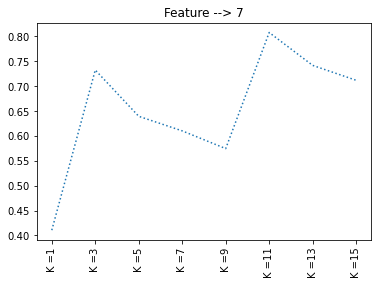

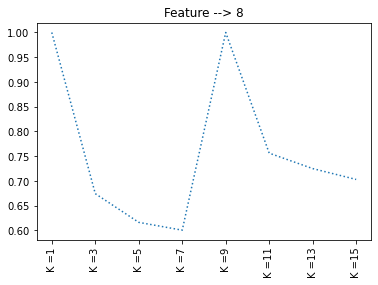

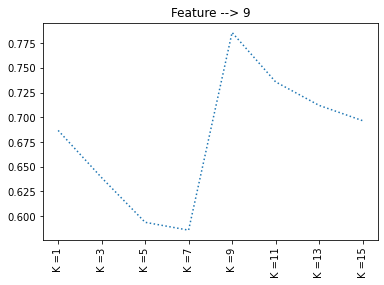

------------------------------------------


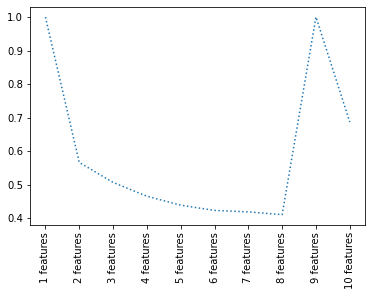

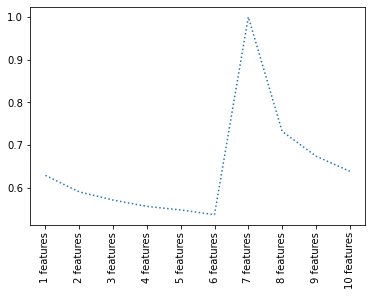

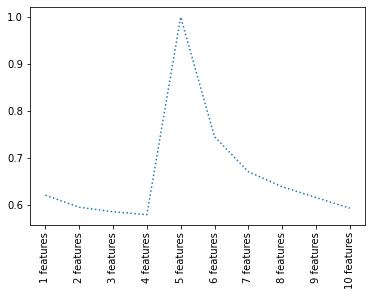

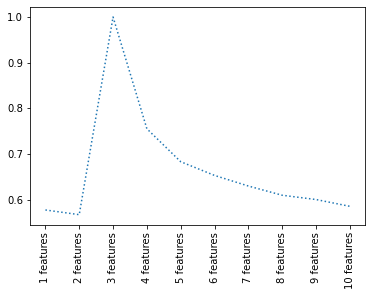

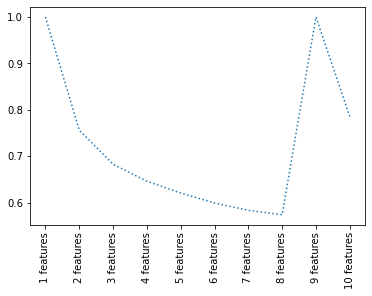

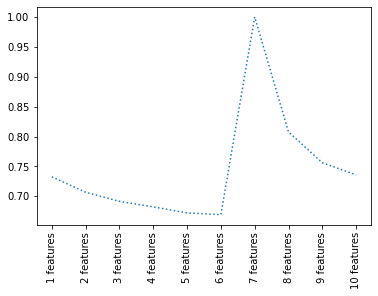

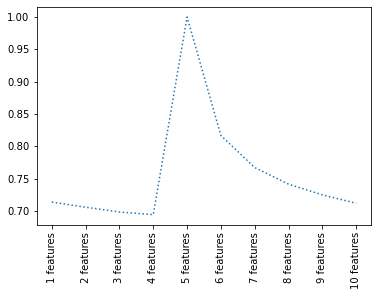

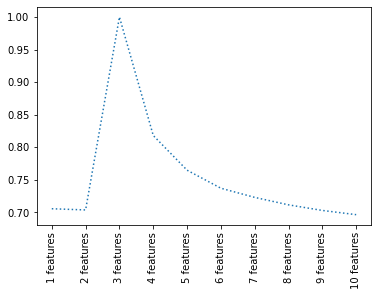

In [134]:
for i in range(len(df_features_train.columns)):
    plt.title("Feature --> " + str(i))
    plt.xticks(rotation=90)
    plt.plot(df_features_train.iloc[:,i],linestyle = 'dotted')
    plt.show()
print("------------------------------------------")
for i in range(len(df_features_train)):
    #plt.title("K --> " + str(i))
    plt.xticks(rotation=90)
    plt.plot(df_features_train.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Validation Results </p>

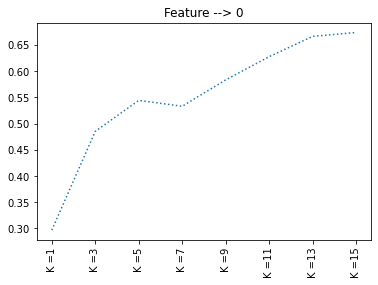

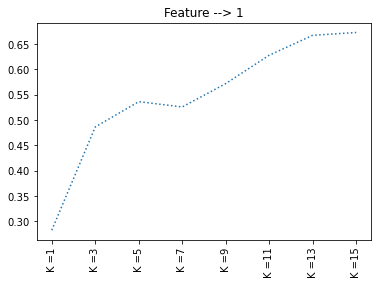

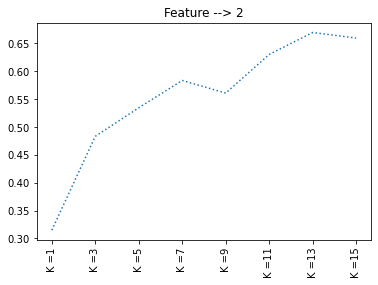

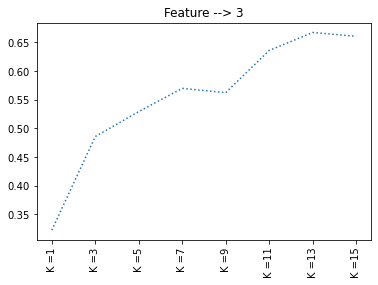

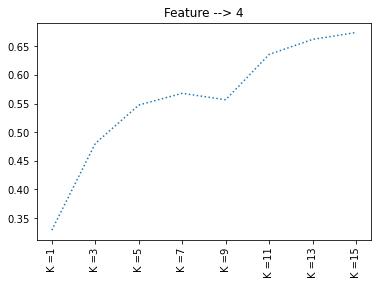

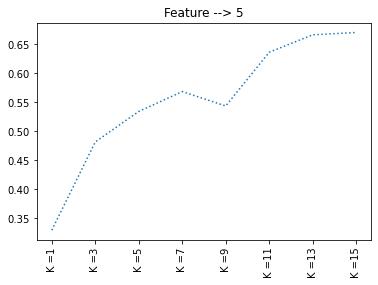

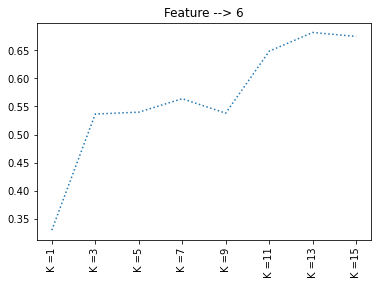

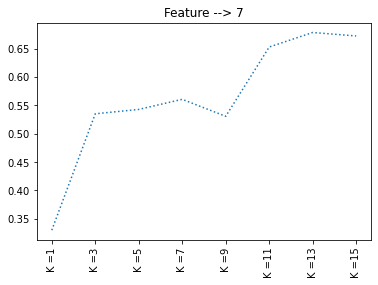

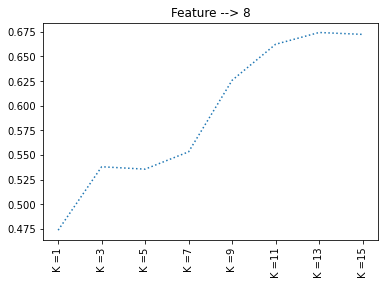

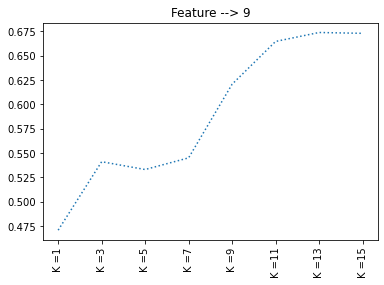

------------------------------------------


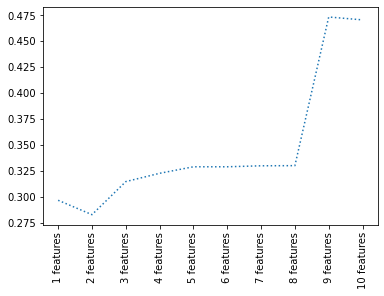

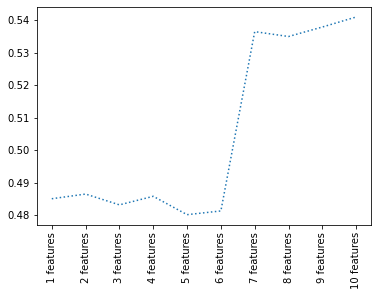

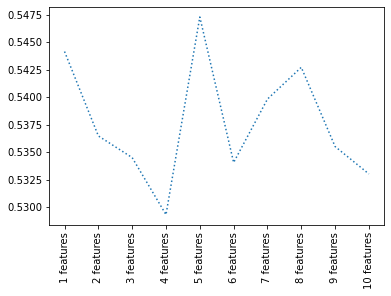

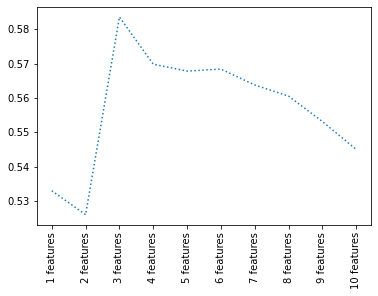

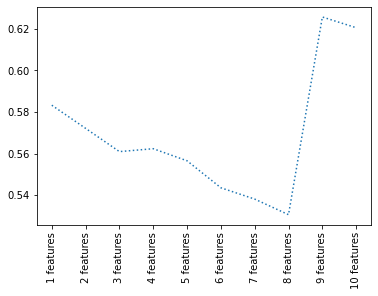

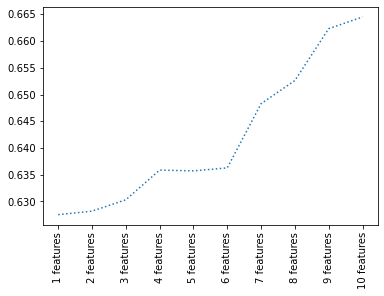

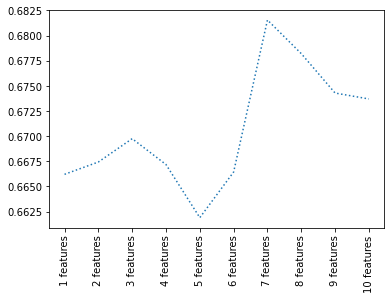

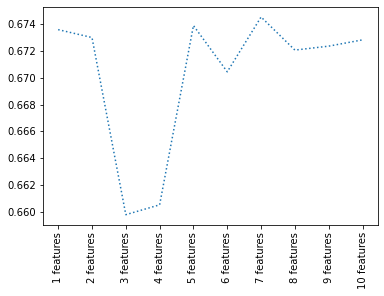

In [135]:
for i in range(len(df_features_val.columns)):
    plt.title("Feature --> " + str(i))
    plt.xticks(rotation=90)
    plt.plot(df_features_val.iloc[:,i],linestyle = 'dotted')
    plt.show()
print("------------------------------------------")
for i in range(len(df_features_val)):
    #plt.title("K --> " + str(i))
    plt.xticks(rotation=90)
    plt.plot(df_features_val.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Test Results </p>

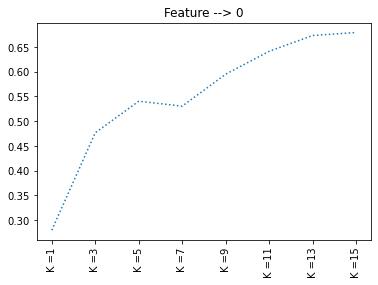

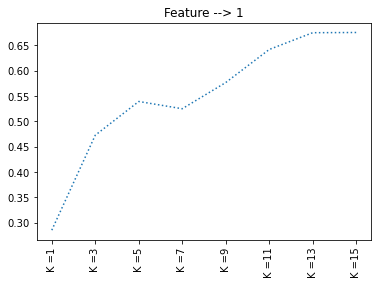

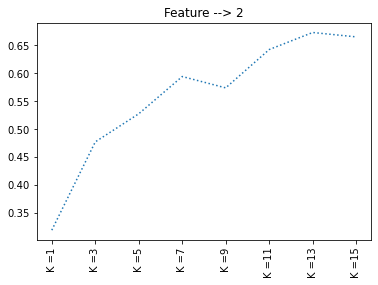

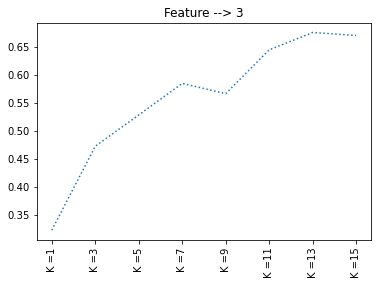

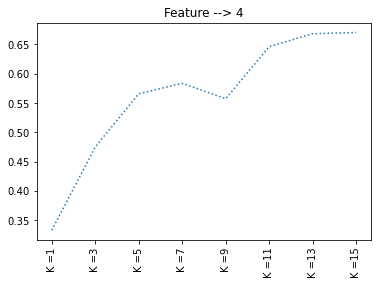

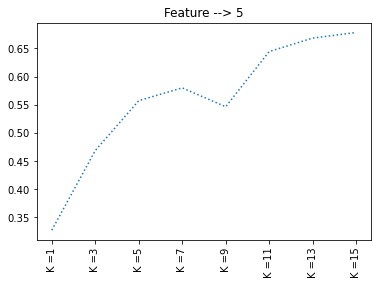

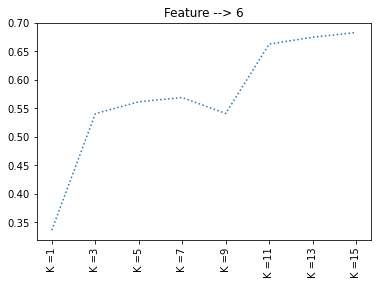

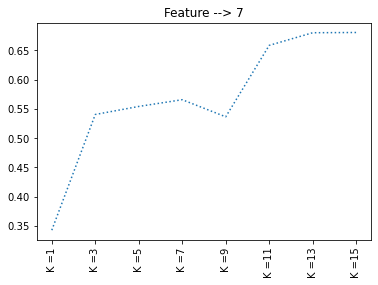

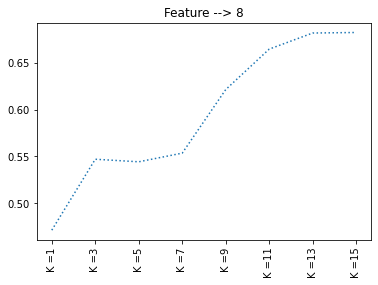

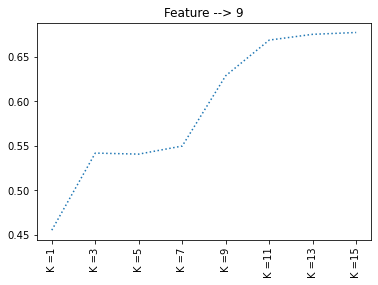

------------------------------------------


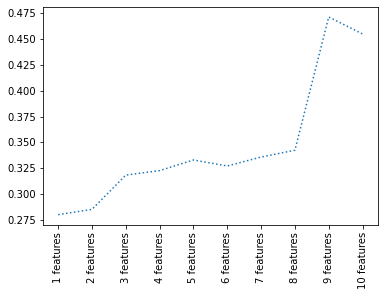

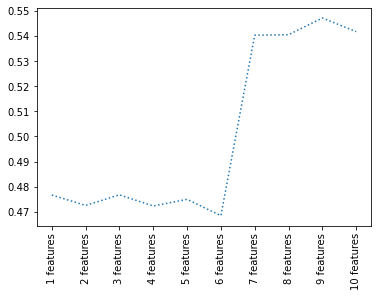

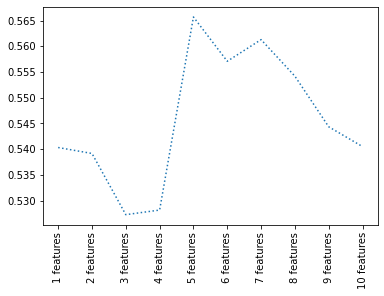

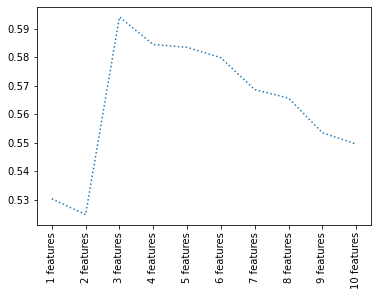

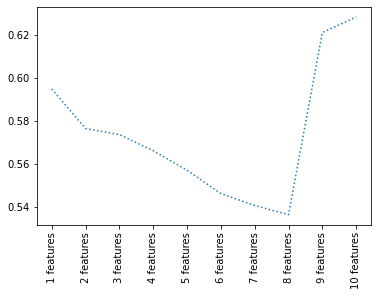

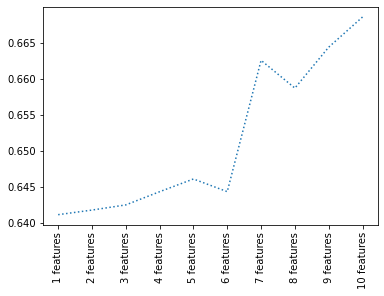

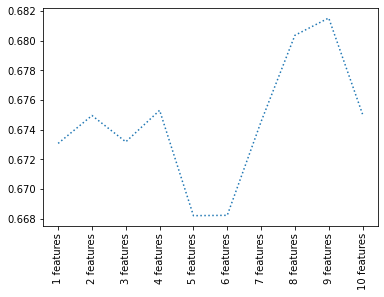

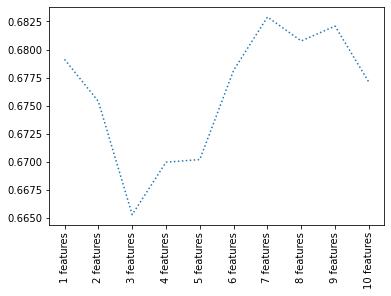

In [136]:
for i in range(len(df_features_test.columns)):
    plt.title("Feature --> " + str(i))
    plt.xticks(rotation=90)
    plt.plot(df_features_test.iloc[:,i],linestyle = 'dotted')
    plt.show()
print("------------------------------------------")
for i in range(len(df_features_test)):
    plt.xticks(rotation=90)
    plt.plot(df_features_test.iloc[i],linestyle = 'dotted')
    plt.show()

<p> Conclui-se que apesar dos pessimos resultados fora alguns que conseguiram alcançaram o 1 de f1-score nota-se que os as soluçoes estão todas a baixo dos 0.9 o que revela não ser um resultado ideal para o modelo.</p>
<p> No que toca ao bias invariance como apenas usamos o f1 para determinar, não se consegue concluir nada pois falta o recall e a precision </p>
<p> Existe tambem uma grande variedade de resultados entre os diferentes k's e features </p>

#### 4 - Rede neuronal feedforward (MLP) - 3 Camadas - Número variável de neurónios - ativação logística

In [84]:
# Função a ser chamada nas próximas alíneas
def ex4(title,x,y,learningRate='constant',momentum=0.9):
    numNeuronios = [i for i in range(4,16)]
    
    # TVT 40-30-30
    training, validation, testing = Train_Validation_Test(x, y, 0.3, 0.3)
    
    scores = []
    models = []
    
    trainingY, validationY, testingY = training[1], validation[1], testing[1]
    
    for neuronios in numNeuronios:
        # sgd (stochastic gradient descent) supports mini-batch learning. 
        model = MLPClassifier(solver='sgd', hidden_layer_sizes=(neuronios,), activation='logistic', learning_rate=learningRate, learning_rate_init=0.1, momentum=momentum)
        model.fit(training[0], trainingY)
        
        prediction = model.predict(validation[0])
        metrics = metricas(validationY,prediction)
        
        scores.append(metrics["F1 Score"])
        models.append(model)
        
        #print(metrics["F1 Score"])
    
    bestScore = max(scores)
    bestInd = scores.index(bestScore)
    
    plt.figure()
    plt.title(title)
    plt.plot(numNeuronios, scores)
    plt.scatter(numNeuronios[bestInd], bestScore, color='r')
    plt.xlabel("Número de neurónios")
    plt.ylabel("F1-Score")
    
    bestModel = models[bestInd]
    
    pred_test = bestModel.predict(testing[0])
    metricas_test = metricas(pred_test,testingY)
    
    pred_train = bestModel.predict(training[0])
    metricas_train = metricas(pred_train,trainingY)
    
    pred_val = bestModel.predict(validation[0])
    metricas_val = metricas(pred_val,validationY)
    
    metricas_geral_train = {}
    metricas_geral_val = {}
    metricas_geral_test = {}
    
    metricas_geral_train["Recall"]=metricas_train["Recall"]
    metricas_geral_train["Precision"]=metricas_train["Precision"]
    metricas_geral_train["F1 Score"]=metricas_train["F1 Score"]
    metricas_end_train= pd.DataFrame(metricas_geral_train, index=[0])
    metricas_end_train = metricas_end_train.rename(index={0: 'Train'})
    display(metricas_end_train)

    metricas_geral_val["Recall"]=metricas_val["Recall"]
    metricas_geral_val["Precision"]=metricas_val["Precision"]
    metricas_geral_val["F1 Score"]=metricas_val["F1 Score"]
    metricas_end_val= pd.DataFrame(metricas_geral_val, index=[0])
    metricas_end_val = metricas_end_val.rename(index={0: 'Validation'})
    display(metricas_end_val)

    metricas_geral_test["Recall"]=metricas_test["Recall"]
    metricas_geral_test["Precision"]=metricas_test["Precision"]
    metricas_geral_test["F1 Score"]=metricas_test["F1 Score"]
    metricas_end_test= pd.DataFrame(metricas_geral_test, index=[0])
    metricas_end_test = metricas_end_test.rename(index={0: 'Test'})
    display(metricas_end_test)

    vis_geral(metricas_test)

###### 4.1 - Com velocidade de aprendizagem fixo

Recall  Precision  F1 Score
Train  0.80842    0.84033  0.821059

Recall  Precision  F1 Score
Validation  0.69132   0.728467  0.707493

Recall  Precision  F1 Score
Test  0.68784   0.723339  0.703341

Metrics     Value
0     Recall  0.687840
1  Precision  0.723339
2   F1 Score  0.703341

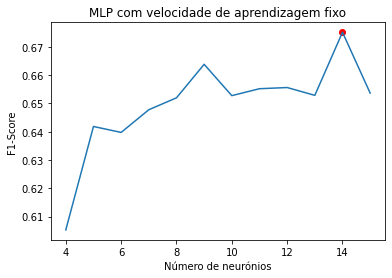

<Figure size 432x288 with 0 Axes>

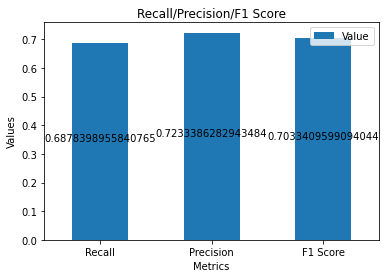

<Figure size 432x288 with 0 Axes>

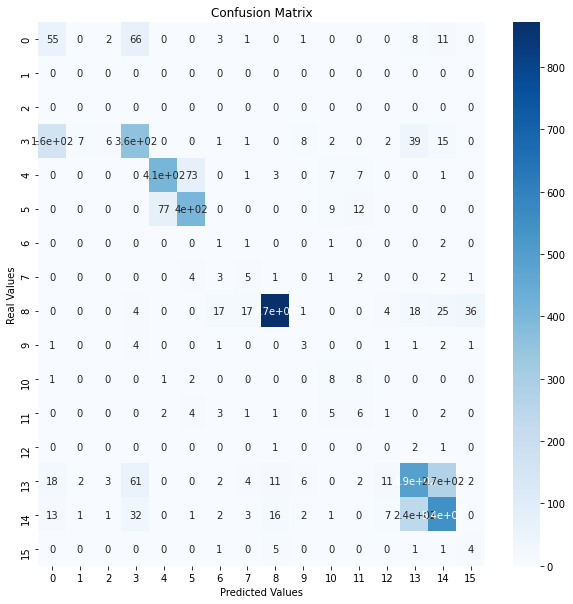

In [89]:
ex4("MLP com velocidade de aprendizagem fixo",X,y)

###### 4.2 - Com velocidade de aprendizagem variável

Recall  Precision  F1 Score
Train  0.591873   0.719374   0.63903

Recall  Precision  F1 Score
Validation  0.589297   0.713537  0.635523

Recall  Precision  F1 Score
Test  0.597564   0.719943   0.64217

Metrics     Value
0     Recall  0.597564
1  Precision  0.719943
2   F1 Score  0.642170

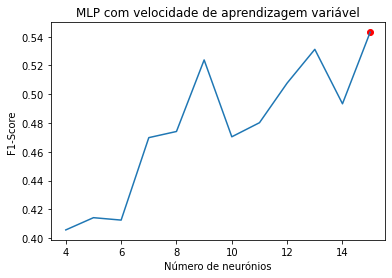

<Figure size 432x288 with 0 Axes>

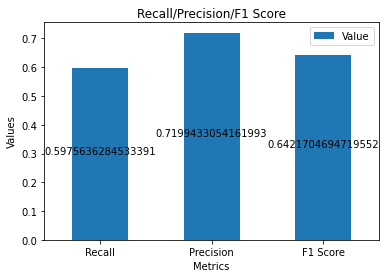

<Figure size 432x288 with 0 Axes>

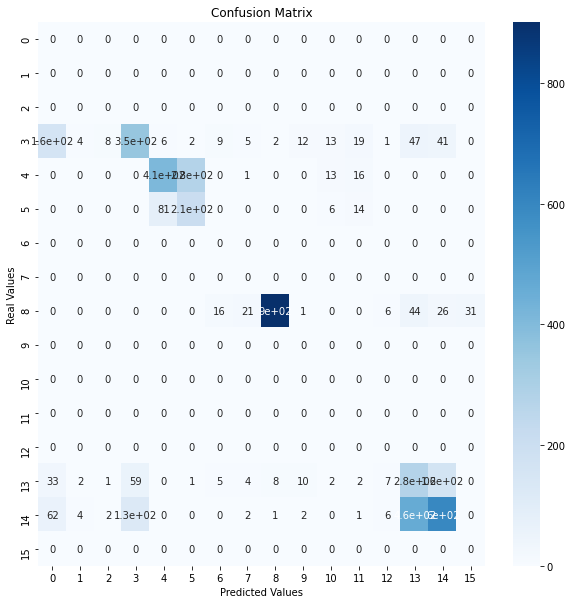

In [91]:
# Instead of constant the learning rate is invscaling, that gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’.
ex4("MLP com velocidade de aprendizagem variável",X,y,'invscaling')

###### 4.3 - Com coeficiente de momentum

Recall  Precision  F1 Score
Train  0.73564   0.791979  0.759365

Recall  Precision  F1 Score
Validation  0.685012    0.74801  0.711307

Recall  Precision  F1 Score
Test  0.688275   0.745768  0.713404

Metrics     Value
0     Recall  0.688275
1  Precision  0.745768
2   F1 Score  0.713404

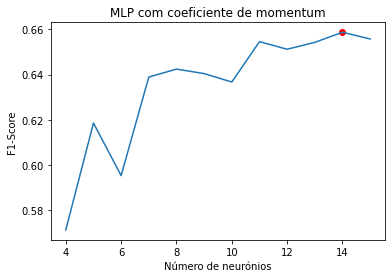

<Figure size 432x288 with 0 Axes>

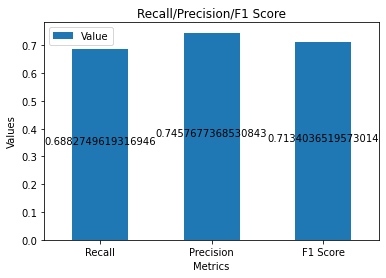

<Figure size 432x288 with 0 Axes>

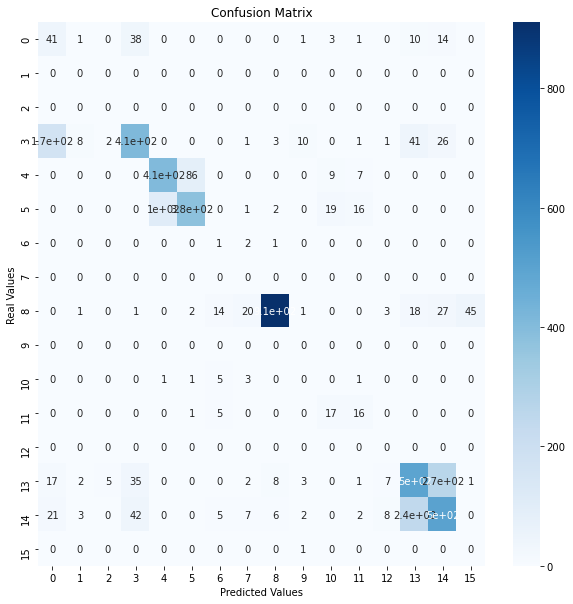

In [90]:
ex4("MLP com coeficiente de momentum",X, y,momentum=0.4)

###### 4.4 - Discuta os resultados

No 4.1 e no 4.3 ocorreu Overfitting pois o dataset de test tem resultados inferiores ao dataset de treino.
Já o 4.2 ocorre Underfitting pois o dataset de treino tem resultados inferiores ao dataset de test.
A rede neuronal que possui o melhor f1_score das três implementadas, foi a rede neuronal com coeficiente de momentum. 
Comparando com os resultados dos pontos anteriores, as redes neuronais possuem um pior desempenho comparado a maioria dos modelos anteriores. Porém, as mesmas tiveram um melhor desempenho em alguns pontos da alinea 3, nomeadamente as redes com o train test (3.2.1), train validation test com k a variar (3.2.2) e algoritmo FFS. (3.2.3).